In [2]:
import emcee
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks,argrelmin
from scipy.stats import median_absolute_deviation
import eleanor
import urllib
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve import TessTargetPixelFile
import eleanor
from astropy.io import ascii,fits
from astropy.table import Table,join,Column
import astropy.units as u
import bokeh
import sys
from scipy.signal import savgol_filter
from requests.exceptions import HTTPError
import matplotlib.gridspec as gridspec
#plt.rcParams['font.size']=12
import glob
from PyPDF2 import PdfFileMerger,PdfFileReader
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic
import pandas as pd
from astroquery.gaia import Gaia
from uncertainties.umath import *
from uncertainties import ufloat
from uncertainties import unumpy
import statsmodels.distributions.empirical_distribution as emp
from astroquery.gaia import Gaia
from astroquery.mast import Catalogs
from astropy.coordinates import SkyCoord
from collections import Counter
plt.rcParams['font.size']= 18
import sigfig as sf
from IPython.display import display, Math


# Data Visualization #

In [5]:
finalresults = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/joinedfinalresults_ultimate_cdips.dat')
joined_finalresultstbl = finalresults
#corrunc_pers=ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/vetperiods_corrunc_good.dat')
finalperiods = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/final_verified_periods_68conf.dat')
ssmems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_papertbls_singlestars.dat')
ssmems = ssmems[ssmems['proba'] > 0.68]

In [3]:

for i in range(len(joined_finalresultstbl)):
    if joined_finalresultstbl['period_unc'][i] == 0:
        nameindx = np.where(finalresults['source_id'][i] == corrunc_pers['source_id'])[0]
        joined_finalresultstbl['period'][i] = corrunc_pers[nameindx]['period'] #* 24 * 3600
        joined_finalresultstbl['period_unc'][i] = corrunc_pers[nameindx]['period_unc'] #* 24 * 3600
        #print(joined_finalresultstbl['period_unc'][i]/joined_finalresultstbl['period'][i])

In [4]:
#joined_finalresultstbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/joinedfinalresults_ultimate.dat',format='ascii')

In [441]:
joined_finalresultstbl = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/joinedfinalresults_ultimate_cdips.dat')
#joined_finalresultstbl['bayes_sini']

In [160]:
np.mean(joined_finalresultstbl['bayes_sini_lo_err']/joined_finalresultstbl['bayes_sini'])

0.08092803700140927

In [161]:
np.mean(joined_finalresultstbl['e_vsini']/joined_finalresultstbl['vsini'])

0.04969545528200908

In [162]:
np.mean(joined_finalresultstbl['r_hi_err']/joined_finalresultstbl['exofast_r'])

0.02257810278661624

In [163]:
np.mean(joined_finalresultstbl['period_unc']/joined_finalresultstbl['period'])

0.018890622963320964

In [558]:
np.sum(1-joined_finalresultstbl['bayes_sini']**2)/len(joined_finalresultstbl)

0.2851228400208494

In [566]:
mean_sini_err=(joined_finalresultstbl['bayes_sini_hi_err']+joined_finalresultstbl['bayes_sini_lo_err'])/2
mean_sini_err

<Column name='bayes_sini_hi_err' dtype='float64' length=39>
  0.0340170085042521
  0.0530265132566283
0.025012506253126537
0.042521260630315166
0.047023511755877906
 0.05152576288144073
  0.0350175087543772
0.052526263131565776
 0.05352676338169088
 0.06553276638319161
 0.05502751375687842
0.048024012006003036
                 ...
 0.05802901450725362
 0.04852426213106553
0.050525262631315626
 0.15807903951975988
 0.09104552276138067
 0.07453726863431709
 0.07903951975987994
 0.07553776888444219
0.054527263631815925
 0.09854927463731866
  0.0765382691345673
 0.07553776888444219

In [442]:
siniarr = joined_finalresultstbl['bayes_sini']
#for i in range(len(siniarr)):
#    if siniarr[i] > 1:
#        siniarr[i] = 1

In [443]:
np.sum(1-siniarr**2)/len(joined_finalresultstbl)

0.2895853690332971

In [452]:
joined_finalresultstbl['bayes_sini']

<Column name='bayes_sini' dtype='float64' length=33>
0.38219109554777386
 0.3971985992996498
 0.4532266133066533
 0.5332666333166582
 0.5442721360680339
 0.5592796398199099
 0.5992996498249125
 0.6903451725862931
 0.7123561780890445
 0.7403701850925463
 0.7653826913456728
 0.7683841920960479
                ...
 0.9364682341170585
 0.9364682341170585
  0.944472236118059
 1.0145072536268134
 1.0205102551275638
 1.0295147573786894
   1.03951975987994
 1.0515257628814407
  1.059529764882441
  1.070535267633817
 1.0825412706353177
 1.1285642821410704

In [588]:
u_sini=unumpy.uarray(siniarr,mean_sini_err)
u_sini

<Column name='bayes_sini' dtype='object' length=39>
0.384+/-0.034
  0.45+/-0.05
0.468+/-0.025
  0.53+/-0.04
  0.54+/-0.05
  0.55+/-0.05
0.559+/-0.035
  0.62+/-0.05
  0.69+/-0.05
  0.72+/-0.07
  0.75+/-0.06
  0.75+/-0.05
          ...
  0.96+/-0.06
  0.97+/-0.05
  0.99+/-0.05
  1.00+/-0.16
  1.00+/-0.09
  1.00+/-0.07
  1.00+/-0.08
  1.00+/-0.08
  1.00+/-0.05
  1.00+/-0.10
  1.00+/-0.08
  1.00+/-0.08

In [589]:
np.sum(1-unumpy.pow(u_sini,2))/39

0.30395481472345565+/-0.019472319112143085

In [453]:
tefftbl = []
for i in range(len(joined_finalresultstbl)):
    teffi = np.str(np.int(joined_finalresultstbl['exofast_teff'][i]))
    teffiunc = np.str(np.int(joined_finalresultstbl['teff_hi_err'][i]))
    tefftbl += [teffi + ' plusminus ' + teffiunc]
tefftbl = np.array(tefftbl)

In [454]:
tefftbl

array(['4290 plusminus 210', '6340 plusminus 160', '5780 plusminus 160',
       '4360 plusminus 120', '5980 plusminus 140', '6020 plusminus 150',
       '5890 plusminus 130', '5590 plusminus 140', '4500 plusminus 99',
       '6070 plusminus 160', '5980 plusminus 170', '5910 plusminus 120',
       '5800 plusminus 140', '5870 plusminus 190', '6200 plusminus 140',
       '5980 plusminus 150', '6320 plusminus 140', '5070 plusminus 110',
       '5840 plusminus 140', '6300 plusminus 130', '6430 plusminus 140',
       '6410 plusminus 140', '6460 plusminus 140', '6230 plusminus 160',
       '4960 plusminus 140', '4520 plusminus 150', '6260 plusminus 160',
       '5720 plusminus 130', '6280 plusminus 150', '6010 plusminus 170',
       '6490 plusminus 130', '5950 plusminus 140', '4080 plusminus 170'],
      dtype='<U18')

In [455]:
radius_err = np.array([np.mean((finalresults['r_hi_err'][i],finalresults['r_lo_err'][i])) for i in range(len(joined_finalresultstbl))])

radtbl = []
for i in range(len(joined_finalresultstbl)):
    #radiunc = np.str(sf.round(radius_err[i],sigfigs=2))
    radiuncDec = sf.round(sf.Decimal(radius_err[i]),sigfigs=2)
    radiunc = radiuncDec.to_eng_string()
    decplaces = len(radiunc)-2
    radi = np.str(np.round(joined_finalresultstbl['exofast_r'][i],decplaces))
    radtbl += [radi + ' plusminus ' + radiunc]
radtbl = np.array(radtbl)



In [456]:
radtbl

array(['0.637 plusminus 0.029', '1.216 plusminus 0.024',
       '0.948 plusminus 0.025', '0.648 plusminus 0.020',
       '1.061 plusminus 0.022', '0.992 plusminus 0.021',
       '1.005 plusminus 0.019', '0.917 plusminus 0.022',
       '0.704 plusminus 0.017', '1.067 plusminus 0.022',
       '1.033 plusminus 0.024', '1.022 plusminus 0.019',
       '0.999 plusminus 0.024', '1.054 plusminus 0.021',
       '1.124 plusminus 0.026', '1.047 plusminus 0.022',
       '1.207 plusminus 0.026', '0.799 plusminus 0.019',
       '0.966 plusminus 0.022', '1.193 plusminus 0.024',
       '1.26 plusminus 0.024', '1.257 plusminus 0.026',
       '1.281 plusminus 0.025', '1.152 plusminus 0.025',
       '0.808 plusminus 0.020', '0.703 plusminus 0.019',
       '1.181 plusminus 0.027', '0.985 plusminus 0.024',
       '1.175 plusminus 0.026', '1.031 plusminus 0.020',
       '1.375 plusminus 0.030', '1.068 plusminus 0.020',
       '0.583 plusminus 0.022'], dtype='<U21')

In [457]:
sf.Decimal(5.10)

Decimal('5.0999999999999996447286321199499070644378662109375')

In [458]:
#vsiniius_err = np.array([np.mean((finalresults['r_hi_err'][i],finalresults['r_lo_err'][i])) for i in range(len(joined_finalresultstbl))])

vsinitbl = []
for i in range(len(joined_finalresultstbl)):
    #vsiniiunc = np.str(sf.round(vsiniius_err[i],sigfigs=2))
    vsiniiuncDec = sf.round(sf.Decimal(joined_finalresultstbl['e_vsini'][i]),sigfigs=2)
    vsiniiunc = vsiniiuncDec.to_eng_string()
    decplaces = len(vsiniiunc)-2
    vsiniiDec = sf.round(sf.Decimal(joined_finalresultstbl['vsini'][i]),decimals=decplaces)
    vsinii = vsiniiDec.to_eng_string()
    vsinitbl += [vsinii + ' plusminus ' + vsiniiunc]
vsinitbl = np.array(vsinitbl)



/anaconda3/envs/astroconda/lib/python3.6/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


In [459]:
vsinitbl

array(['55.2 plusminus 2.2', '12.80 plusminus 0.64',
       '5.10 plusminus 0.41', '44.7 plusminus 2.2', '9.60 plusminus 0.58',
       '8.60 plusminus 0.34', '9.90 plusminus 0.40',
       '7.70 plusminus 0.39', '8.50 plusminus 0.51',
       '10.70 plusminus 0.54', '12.50 plusminus 0.63',
       '11.80 plusminus 0.47', '10.70 plusminus 0.54',
       '12.20 plusminus 0.98', '19.20 plusminus 0.96',
       '15.00 plusminus 0.75', '32.8 plusminus 1.6', '35.2 plusminus 1.8',
       '13.10 plusminus 0.66', '21.9 plusminus 1.1', '68.0 plusminus 3.4',
       '38.1 plusminus 1.9', '43.1 plusminus 2.2', '27.9 plusminus 1.4',
       '17.20 plusminus 0.52', '75.0 plusminus 9.0', '46.9 plusminus 2.3',
       '19.90 plusminus 0.60', '37.6 plusminus 1.9', '21.8 plusminus 1.1',
       '50.0 plusminus 2.5', '28.6 plusminus 1.4', '68.4 plusminus 4.1'],
      dtype='<U20')

In [460]:
#rvius_err = np.array([np.mean((finalresults['r_hi_err'][i],finalresults['r_lo_err'][i])) for i in range(len(finalresults))])

rvtbl = []
for i in range(len(finalresults)):
    #rviunc = np.str(sf.round(rvius_err[i],sigfigs=2))
    rviuncDec = sf.round(sf.Decimal(finalresults['pRV'][i]),sigfigs=2)
    rviunc = rviuncDec.to_eng_string()
    decplaces = len(rviunc)-2
    rviDec = sf.round(sf.Decimal(finalresults['RV'][i]),decimals=decplaces)
    rvi = rviDec.to_eng_string()
    rvtbl += [rvi + ' plusminus ' + rviunc]
rvtbl = np.array(rvtbl)



In [461]:
rvtbl

array(['23.40 plusminus 0.47', '24.73 plusminus 0.26',
       '24.37 plusminus 0.18', '23.88 plusminus 0.53',
       '24.03 plusminus 0.26', '22.97 plusminus 0.18',
       '23.43 plusminus 0.19', '22.70 plusminus 0.19',
       '23.14 plusminus 0.26', '24.73 plusminus 0.26',
       '24.37 plusminus 0.26', '24.59 plusminus 0.19',
       '22.78 plusminus 0.26', '24.14 plusminus 0.37',
       '25.54 plusminus 0.27', '24.67 plusminus 0.27',
       '24.29 plusminus 0.30', '23.11 plusminus 0.35',
       '25.45 plusminus 0.26', '24.52 plusminus 0.32',
       '24.89 plusminus 0.59', '24.70 plusminus 0.32',
       '23.75 plusminus 0.38', '25.77 plusminus 0.31',
       '24.13 plusminus 0.18', '26.6 plusminus 4.0',
       '25.61 plusminus 0.39', '23.23 plusminus 0.19',
       '24.09 plusminus 0.33', '20.90 plusminus 0.29',
       '25.16 plusminus 0.38', '24.84 plusminus 0.36',
       '23.6 plusminus 1.0'], dtype='<U20')

In [464]:
#periodius_err = np.array([np.mean((finalresults['r_hi_err'][i],finalresults['r_lo_err'][i])) for i in range(len(joined_finalresultstbl))])

periodtbl = []
for i in range(len(joined_finalresultstbl)):
    #periodiunc = np.str(sf.round(periodius_err[i],sigfigs=2))
    periodiuncDec = sf.round(sf.Decimal(joined_finalresultstbl['e_period'][i]),sigfigs=2)
    periodiunc = periodiuncDec.to_eng_string()
    decplaces = len(periodiunc)-2
    periodiDec = sf.round(sf.Decimal(joined_finalresultstbl['period'][i]),decimals=decplaces)
    periodi = periodiDec.to_eng_string()
    periodtbl += [periodi + ' plusminus ' + periodiunc]
periodtbl = np.array(periodtbl)



In [465]:
periodtbl

array(['0.221 plusminus 0.010', '1.910 plusminus 0.017',
       '4.22 plusminus 0.10', '0.3905 plusminus 0.0083',
       '3.038 plusminus 0.041', '3.271 plusminus 0.013',
       '3.06 plusminus 0.19', '4.14 plusminus 0.15',
       '2.977 plusminus 0.028', '3.733 plusminus 0.049',
       '3.199 plusminus 0.054', '3.374 plusminus 0.044',
       '3.707 plusminus 0.062', '3.539 plusminus 0.072',
       '2.427 plusminus 0.034', '2.934 plusminus 0.055',
       '1.566 plusminus 0.042', '0.9792 plusminus 0.0098',
       '3.194 plusminus 0.046', '2.368 plusminus 0.025',
       '0.8071 plusminus 0.0081', '1.562 plusminus 0.031',
       '1.408 plusminus 0.010', '1.974 plusminus 0.016',
       '2.417 plusminus 0.033', '0.4744 plusminus 0.0083',
       '1.312 plusminus 0.013', '2.604 plusminus 0.084',
       '1.6637 plusminus 0.0083', '2.5369 plusminus 0.0083',
       '1.479 plusminus 0.083', '2.045 plusminus 0.016',
       '0.4845 plusminus 0.0083'], dtype='<U23')

In [468]:
#bayes_siniius_err = np.array([np.mean((finalresults['r_hi_err'][i],finalresults['r_lo_err'][i])) for i in range(len(joined_finalresultstbl))])
count=0
bayes_sinitbl = []
for i in range(len(joined_finalresultstbl)):
    #bayes_siniiunc = np.str(sf.round(bayes_siniius_err[i],sigfigs=2))
    bayes_siniiuncDec_hi = sf.round(sf.Decimal(joined_finalresultstbl['bayes_sini_hi_err'][i]),sigfigs=2)
    bayes_siniiunc_hi = bayes_siniiuncDec_hi.to_eng_string()
    decplaces_hi = len(bayes_siniiunc_hi)-2
    
    bayes_siniiuncDec_lo = sf.round(sf.Decimal(joined_finalresultstbl['bayes_sini_lo_err'][i]),sigfigs=2)
    bayes_siniiunc_lo = bayes_siniiuncDec_lo.to_eng_string()
    decplaces_lo = len(bayes_siniiunc_lo)-2
    
    if decplaces_hi == decplaces_lo:
        count += 1
    else:
        decplaces = np.max((decplaces_lo,decplaces_hi))
        print(i,decplaces)
    
    bayes_siniiDec = sf.round(sf.Decimal(joined_finalresultstbl['bayes_sini'][i]),decimals=decplaces)
    bayes_sinii = bayes_siniiDec.to_eng_string()
    bayes_sinitbl += [bayes_sinii + 'dollar^' + '{+'+bayes_siniiunc_hi+'}'+'_'+'{'+'-'+bayes_siniiunc_lo+'}dollar']
bayes_sinitbl = np.array(bayes_sinitbl)



30 3
32 3


In [112]:
dec=sf.Decimal(0.15)

In [469]:
bayes_sinitbl

array(['0.382dollar^{+0.037}_{-0.032}dollar',
       '0.397dollar^{+0.030}_{-0.026}dollar',
       '0.453dollar^{+0.056}_{-0.046}dollar',
       '0.533dollar^{+0.045}_{-0.039}dollar',
       '0.544dollar^{+0.049}_{-0.042}dollar',
       '0.559dollar^{+0.034}_{-0.031}dollar',
       '0.599dollar^{+0.059}_{-0.049}dollar',
       '0.690dollar^{+0.060}_{-0.054}dollar',
       '0.712dollar^{+0.064}_{-0.056}dollar',
       '0.740dollar^{+0.055}_{-0.050}dollar',
       '0.765dollar^{+0.060}_{-0.052}dollar',
       '0.768dollar^{+0.047}_{-0.042}dollar',
       '0.785dollar^{+0.061}_{-0.055}dollar',
       '0.816dollar^{+0.098}_{-0.082}dollar',
       '0.820dollar^{+0.062}_{-0.056}dollar',
       '0.831dollar^{+0.063}_{-0.057}dollar',
       '0.842dollar^{+0.068}_{-0.061}dollar',
       '0.852dollar^{+0.065}_{-0.057}dollar',
       '0.856dollar^{+0.067}_{-0.058}dollar',
       '0.859dollar^{+0.064}_{-0.058}dollar',
       '0.860dollar^{+0.065}_{-0.056}dollar',
       '0.936dollar^{+0.074}_{-0.0

In [267]:
np.where(finalresults['source_id']==5290721142499618816)

(array([29]),)

In [268]:
finalresults[29]

<Row index=29>
     source_id       AV_SFD AV_SandF Cluster E_B_V_SFD E_B_V_SandF   Hmag   Icmag    Jmag    Kmag    Nsp   Object       RV        S/N   Survey         al_fe                alpha_fe               b                ba_fe          bp_rp            c_fe               ca_fe           chi2_cannon    classification cluster         co_fe               cr_fe              cu_fe        cutout_size        dec         dec_parallax_corr dec_pmdec_corr dec_pmra_corr  dej2000        e_al_fe            e_alpha_fe            e_ba_fe              e_c_fe             e_ca_fe              e_co_fe             e_cr_fe              e_cu_fe             e_eu_fe              e_fe_h        e_hmag  e_jmag        e_k_fe        e_kmag       e_la_fe             e_li_fe              e_logg             e_mg_fe             e_mn_fe             e_na_fe              e_ni_fe              e_o_fe       e_rv_nogr_obst e_rv_obst     e_rv_synt            e_sc_fe       e_si_fe      e_teff           e_ti_fe              e_v_fe               e_vmic            e_vsini              e_y_fe             e_zn_fe        errmsg       eu_fe               fe_h        field_id flag_al_fe flag_ba_fe flag_c_fe flag_ca_fe flag_cannon flag_co_fe flag_cr_fe flag_cu_fe flag_eu_fe flag_k_fe flag_la_fe flag_li_fe flag_mg_fe flag_mn_fe flag_na_fe flag_ni_fe flag_o_fe flag_sc_fe flag_si_fe flag_ti_fe flag_v_fe flag_y_fe flag_zn_fe   gaia_r    hmag    jmag         k_fe          kmag          l                la_fe              li_fe        logTeff        logg       max_E_B_V_SFD max_E_B_V_SandF mean_E_B_V_SFD mean_E_B_V_SandF        mg_fe         min_E_B_V_SFD min_E_B_V_SandF        mn_fe              na_fe        ndfclass        ni_fe               o_fe               pRV              parallax      parallax_err    parallax_error    parallax_pmdec_corr parallax_pmra_corr       period            period_unc      phot_g_mean_mag phot_g_n_obs       pmdec            pmdec_error            pmra             pmra_error     pmra_pmdec_corr       proba         pvsini         ra         ra_dec_corr ra_parallax_corr ra_pmdec_corr ra_pmra_corr  raj2000   rv_nogr_obst rv_obst    rv_synt          sc_fe         si_fe      snr_c1        snr_c2        snr_c3        snr_c4        sobject_id    sp_label_distance     star_id      stdev_E_B_V_SFD stdev_E_B_V_SandF       teff              ti_fe                v_fe             vmag_jk              vmic             vsini                y_fe               zn_fe         astrometric_gof_al astrometric_chi2_al astrometric_excess_noise astrometric_excess_noise_sig exofast_r r_hi_err r_lo_err exofast_teff teff_hi_err teff_lo_err   lum   lumhierr lumloerr        sini            sini_fracerr         bayes_sini      bayes_sini_lo_err    bayes_sini_hi_err 
       int64        float64 float64    str7   float64    float64   float64 float64 float64 float64 float64 str16     float64    float64  str5         float64               float64             float64            float64        float64         float64             float64            float64           str1        str8         float64             float64            float64         float64        float64            float64         float64        float64     float64        float64             float64              float64             float64             float64              float64             float64              float64             float64             float64       float64 float64       float64       float64       float64             float64             float64             float64             float64             float64              float64             float64          float64      float64       float64             float64       float64     float64           float64             float64              float64            float64             float64             float64       float64      float64            float64       float64   float64    float64    float64   float64     float64    float64    float64    float64    float64  

In [476]:
tbl2tex = Table(data=[joined_finalresultstbl['source_id'],np.round(joined_finalresultstbl['ra'],2),np.round(joined_finalresultstbl['dec'],2),np.round(joined_finalresultstbl['proba'],1),tefftbl,radtbl,vsinitbl,periodtbl,bayes_sinitbl],names=['sourceid','ra','dec','prob','teff','rad','vsini','period','sini'])

tbl2 = Table(data=[joined_finalresultstbl['source_id'],joined_finalresultstbl['ra'],joined_finalresultstbl['dec'],joined_finalresultstbl['proba'],finalresults['RV'],finalresults['pRV'],finalresults['exofast_teff'],finalresults['teff_hi_err'],finalresults['exofast_r'],radius_err,finalresults['vsini'],finalresults['e_vsini'],finalresults['period'],finalresults['e_period'],finalresults['bayes_sini'],finalresults['bayes_sini_hi_err'],finalresults['bayes_sini_lo_err'],finalresults['survey']],names=['source_id','ra','dec','proba','rv','e_rv','teff','e_teff','radius','e_radius','vsini','e_vsini','period','e_period','sini','e_sini_upper','e_sini_lower','survey'])




In [472]:
tbl2tex

<Table length=33>
      sourceid         ra   ...                 sini               
       int64        float64 ...                str35               
------------------- ------- ... -----------------------------------
5290715919819356800  118.96 ... 0.382dollar^{+0.037}_{-0.032}dollar
5290830097230075904  119.97 ... 0.397dollar^{+0.030}_{-0.026}dollar
5290667472588665600  119.65 ... 0.453dollar^{+0.056}_{-0.046}dollar
5290723032285137024  119.25 ... 0.533dollar^{+0.045}_{-0.039}dollar
5290754643245585792   120.3 ... 0.544dollar^{+0.049}_{-0.042}dollar
5290737669533445248  119.14 ... 0.559dollar^{+0.034}_{-0.031}dollar
5290667541308087168  119.65 ... 0.599dollar^{+0.059}_{-0.049}dollar
5290817281048004736  119.81 ... 0.690dollar^{+0.060}_{-0.054}dollar
5290717672165866496  119.05 ... 0.712dollar^{+0.064}_{-0.056}dollar
5290720042987976576   119.3 ... 0.740dollar^{+0.055}_{-0.050}dollar
                ...     ... ...                                 ...
5291030448862535808  119.24 ... 0.944dollar^{+0.070}_{-0.062}dollar
5290673348103622272  119.49 ... 1.015dollar^{+0.054}_{-0.050}dollar
5290653075858442752  119.63 ...   1.021dollar^{+0.18}_{-0.14}dollar
5290824320493640576  120.14 ... 1.030dollar^{+0.078}_{-0.069}dollar
5290814807146918016  119.65 ... 1.040dollar^{+0.065}_{-0.060}dollar
5290826936134381440  120.13 ... 1.052dollar^{+0.079}_{-0.070}dollar
5290652938419483904  119.59 ... 1.060dollar^{+0.077}_{-0.069}dollar
5290664929967787264  119.26 ...  1.071dollar^{+0.11}_{-0.095}dollar
5290715954179096320  119.01 ... 1.083dollar^{+0.078}_{-0.070}dollar
5290744983857413376  120.12 ...  1.129dollar^{+0.11}_{-0.097}dollar

In [480]:
tbl2tex.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperdata/tbl2.tex',format='latex')

In [477]:
tbl2.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperdata/tbl2/tbl2.txt',format='ascii')

In [478]:
tbl2


<Table length=33>
     source_id              ra         ...     e_sini_lower     survey
       int64             float64       ...       float64         str3 
------------------- ------------------ ... -------------------- ------
5290715919819356800 118.96424957852149 ...  0.03201600800400206    GES
5290830097230075904  119.9654316150975 ... 0.026013006503251612    GES
5290667472588665600 119.65382340795934 ...  0.04602301150575289    GES
5290723032285137024 119.24813996671055 ...  0.03901950975487739    GES
5290754643245585792 120.30332781353981 ...  0.04202101050525253    GES
5290737669533445248 119.14194733564472 ...  0.03101550775387696    GES
5290667541308087168 119.64520129184184 ...  0.04902451225612814    GES
5290817281048004736 119.80580283220925 ...  0.05402701350675343    GES
5290717672165866496  119.0469679352922 ... 0.056028014007003524    GES
5290720042987976576 119.29510027621033 ...  0.05002501250625313    GES
                ...                ... ...                  ...    ...
5291030448862535808 119.23937225765353 ...  0.06203101550775392    GES
5290673348103622272 119.49029455268763 ...  0.05002501250625313    GES
5290653075858442752 119.62662452597256 ...   0.1420710355177588    GES
5290824320493640576 120.13826831046497 ...  0.06903451725862952    GES
5290814807146918016 119.64881348525311 ...  0.06003001500750382    GES
5290826936134381440 120.12958796129628 ...   0.0700350175087544    GES
5290652938419483904 119.58680314089415 ...   0.0690345172586293    GES
5290664929967787264 119.25998129356094 ...  0.09504752376188097    GES
5290715954179096320 119.00514621335617 ...  0.07003501750875452    GES
5290744983857413376 120.11979893793894 ...  0.09704852426213106    GES

In [7]:
#SSMgrv = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516_papertbls_singlestars_GESgalah_goodRV.dat')


SSMgrv = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/single_stars_spec_updated_rv.dat')
goodrv = (SSMgrv['RV'] > 20.5) & (SSMgrv['RV'] < 27.1)
SSMgrv = SSMgrv[goodrv]

In [8]:
SSMgrv = SSMgrv[SSMgrv['proba'] > 0.68]

In [10]:
tablefile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/table1.fits'
tablehdu = fits.open(tablefile)
table = tablehdu[1].data
cat = table
clustmask = cat['cluster'] == 'NGC_2516'
clustmask_6791 = cat['cluster'] == 'NGC_6791'

Ctbl = Table(cat[clustmask])
cra = Ctbl['ra'].data[0]
cdec = Ctbl['dec'].data[0]

###Ctbl_6791 = Table(cat[clustmask_6791])
###cra_6791 = SC.ra.deg #Ctbl_6791['ra'].data[0]
###cdec_6791 = SC.dec.deg #Ctbl_6791['dec'].data[0]

#cpmra = Ctbl['pmra'].data[0]
#cpmdec = Ctbl['pmdec'].data[0]

cpmra = np.mean(ssmems['pmra'])
cpmdec = np.mean(ssmems['pmdec'])

#cpmra_6791 = Ctbl_6791['pmra'].data[0]
#cpmdec_6791 = Ctbl_6791['pmdec'].data[0]


###cpmra_6791 = meanpmra #np.mean(likely6791['pmra'])
###cpmdec_6791 = meanpmdec #np.mean(likely6791['pmdec'])

#cpmra = np.median(ssmems['pmra'])
#cpmdec = np.median(ssmems['pmdec'])


cdist = Ctbl['dmode'].data[0]
cdisterr = cdist - Ctbl['d16'].data[0]

#cdist_6791 = Ctbl_6791['dmode'].data[0]
#cdisterr_6791 = cdist_6791 - Ctbl_6791['d16'].data[0]
#cdist_6791

In [73]:
cdist_6791

4530.8

In [12]:
#np.mean(ssmems['pmra']-cpmra)

In [78]:
np.median(ssmems['pmra']),np.mean(ssmems['pmra'])

(-4.711276616564442, -4.732078604576667)

In [79]:
np.median(ssmems['pmdec']),np.mean(ssmems['pmdec'])

(11.219823556808812, 11.239788808740265)

In [ ]:
np.median()

In [424]:
Ctbl_6791

<Table length=1>
     cluster         ra     dec      l    ...    X       Y       Z      Rgc  
      str17       float32 float32 float32 ... float32 float32 float32 float32
----------------- ------- ------- ------- ... ------- ------- ------- -------
NGC_6791          290.221  37.778  69.964 ...  1524.3  4179.8   857.3  7995.3

In [11]:
#u_cpmra = unumpy.uarray(cpmra,0.017)
#u_cpmdec = unumpy.uarray(cpmdec,0.014)

u_cpmra = unumpy.uarray(cpmra,0)
u_cpmdec = unumpy.uarray(cpmdec,0)

###u_cpmra_6791 = unumpy.uarray(cpmra_6791,0)
###u_cpmdec_6791 = unumpy.uarray(cpmdec_6791,0)

In [12]:
cpmra,cpmdec

(-4.732078604576667, 11.239788808740265)

In [13]:
mems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_allCGmems.dat')
highprob = (mems['proba'] > 0.68) & (~ np.isnan(mems['bp_rp']))
mems=mems[highprob]

In [12]:
indiv_distances = 1e3/(mems['parallax']+0.030)
indiv_distances_rv = 1e3/(SSMgrv['parallax']+0.030)

np.median(indiv_distances)

408.2171403051862

In [12]:
k = 1.08
plx_err = np.zeros(len(indiv_distances))
for i in range(len(indiv_distances)):
    if mems['phot_g_mean_mag'][i] <= 13:
        sig = 0.021
    else:
        sig = 0.043
    plx_err[i] = np.sqrt(k**2*mems['parallax_error'][i]**2 + sig**2)

mederr = np.nanmedian(plx_err)
for i in range(len(indiv_distances)):
    if np.isnan(plx_err[i]):
        plx_err[i] = mederr

In [13]:
mems

<Table length=650>
        ra                 dec         ...       proba        cluster 
     float64             float64       ...      float64         str8  
------------------ ------------------- ... ------------------ --------
119.64282668758783 -61.452193604045654 ...  0.699999988079071 NGC_2516
119.86335546049123 -61.516366132126194 ...  0.800000011920929 NGC_2516
119.98137591874814   -61.4038632769621 ...  0.800000011920929 NGC_2516
119.72947963777617 -61.628932899579574 ...  0.800000011920929 NGC_2516
119.67760602546025 -61.638058241591146 ...  0.800000011920929 NGC_2516
121.13929660975464  -61.34479131354677 ...  0.800000011920929 NGC_2516
119.57987172369998  -61.39780746301892 ... 0.8999999761581421 NGC_2516
119.74149451557692 -61.544223655176246 ...  0.800000011920929 NGC_2516
119.73449588162602 -61.520100528477755 ... 0.8999999761581421 NGC_2516
 119.3190554272407 -61.527369011583474 ...                1.0 NGC_2516
               ...                 ... ...                ...      ...
119.50151861534715   -60.1688639368416 ...  0.699999988079071 NGC_2516
119.25403743603239  -60.19601543927814 ... 0.8999999761581421 NGC_2516
119.37353244383905  -60.18878903569498 ...  0.699999988079071 NGC_2516
119.39598933406903   -60.1163724564806 ...  0.800000011920929 NGC_2516
119.65314123565898  -60.03608363317619 ...  0.699999988079071 NGC_2516
119.32822384746801 -60.258156207121914 ...  0.699999988079071 NGC_2516
119.40781456963013  -60.00823890355261 ... 0.8999999761581421 NGC_2516
119.31421518456791  -60.26770367545517 ... 0.8999999761581421 NGC_2516
119.62697416831926 -60.157774012693494 ...  0.800000011920929 NGC_2516
119.39433047854344   -60.2066996923345 ...  0.699999988079071 NGC_2516

In [14]:
simsize=6500
ra_sim = np.random.normal(cra,np.std(ssmems['ra']-cra),simsize)
dec_sim = np.random.normal(cdec,np.std(ssmems['dec']-cdec),simsize)

mura_sim = np.random.normal(cpmra,np.std(ssmems['pmra']),simsize)
mudec_sim = np.random.normal(cpmdec,np.std(ssmems['pmdec']),simsize)

vlos_sim = np.random.normal(np.mean(SSMgrv['RV']),np.std(SSMgrv['RV']),simsize)

In [1014]:
23.75 #km/s


array(23.75+/-0, dtype=object)

In [15]:
uparallaxes = unumpy.uarray(mems['parallax']+0.030, plx_err)

NameError: name 'plx_err' is not defined

In [16]:
u_indiv_distances = 1e3/uparallaxes

NameError: name 'uparallaxes' is not defined

In [17]:
#u_cdist = unumpy.uarray(cdist,cdisterr)
u_cdist = unumpy.uarray(cdist,17)
u_cdist = unumpy.uarray(cdist,0.1)
###u_cdist_6791 = unumpy.uarray(cdist_6791,cdisterr_6791)

In [18]:
u_cdist

array(408.8999938964844+/-0.1, dtype=object)

In [14]:
#plt.scatter((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),c=SSMgrv['RV']-23.8)
plt.figure(figsize=(6,6))
plt.scatter((SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*(np.pi/180)*(indiv_distances),(SSMgrv['dec']-cdec)*(np.pi/180)*(indiv_distances),c=SSMgrv['RV']-23.8)




ValueError: operands could not be broadcast together with shapes (269,) (794,) 

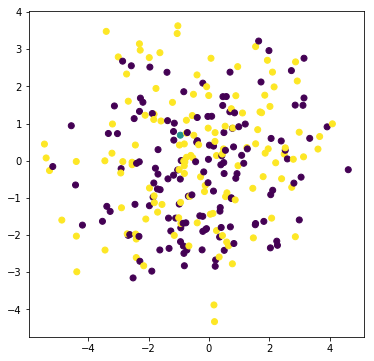

In [865]:
plt.figure(figsize=(6,6))

plt.scatter((SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),c=np.sign(SSMgrv['RV']-23.8))




In [60]:
1e3/ssmems['parallax']

<Column name='parallax' dtype='float64' length=535>
418.94453572026555
424.70573587037484
 413.2738650287349
427.01959620218753
 427.1003001256684
435.96903960366086
 409.6815934872296
 424.0431412214981
426.60227693883274
 424.6418390411983
  413.497623530333
 412.2623718198849
               ...
413.10864391362077
 399.4643778808263
 418.7417658693391
 411.5904085919597
424.71939120793337
411.30782855902373
414.89573644276106
 406.2680839698704
 414.4174745848795
 409.2555428185477
407.23551166041756
 418.8275698794047

In [70]:
(1e3/ssmems[ind33]['parallax']) - cdist

<Column name='parallax' dtype='float64' length=33>
    4.329551737173176
    3.665285612674893
  -3.4215195491051418
-0.060368151256625424
  -4.4481872201989745
    6.383257307442875
  -2.5587520611376817
    2.574526801098557
    4.012160497538446
   18.824092583108836
    -2.65300198290862
    5.314523053024118
                  ...
   1.0176812691109376
   -1.301699365894649
   5.8894938915154285
    5.745028986441298
    5.038063756406473
    21.38897448057014
   -4.900778993628478
   -6.518114842304044
    5.887939319149041
    9.007758731132299
    5.753223351252473
  -1.0700829300056398

<IPython.core.display.Javascript object>


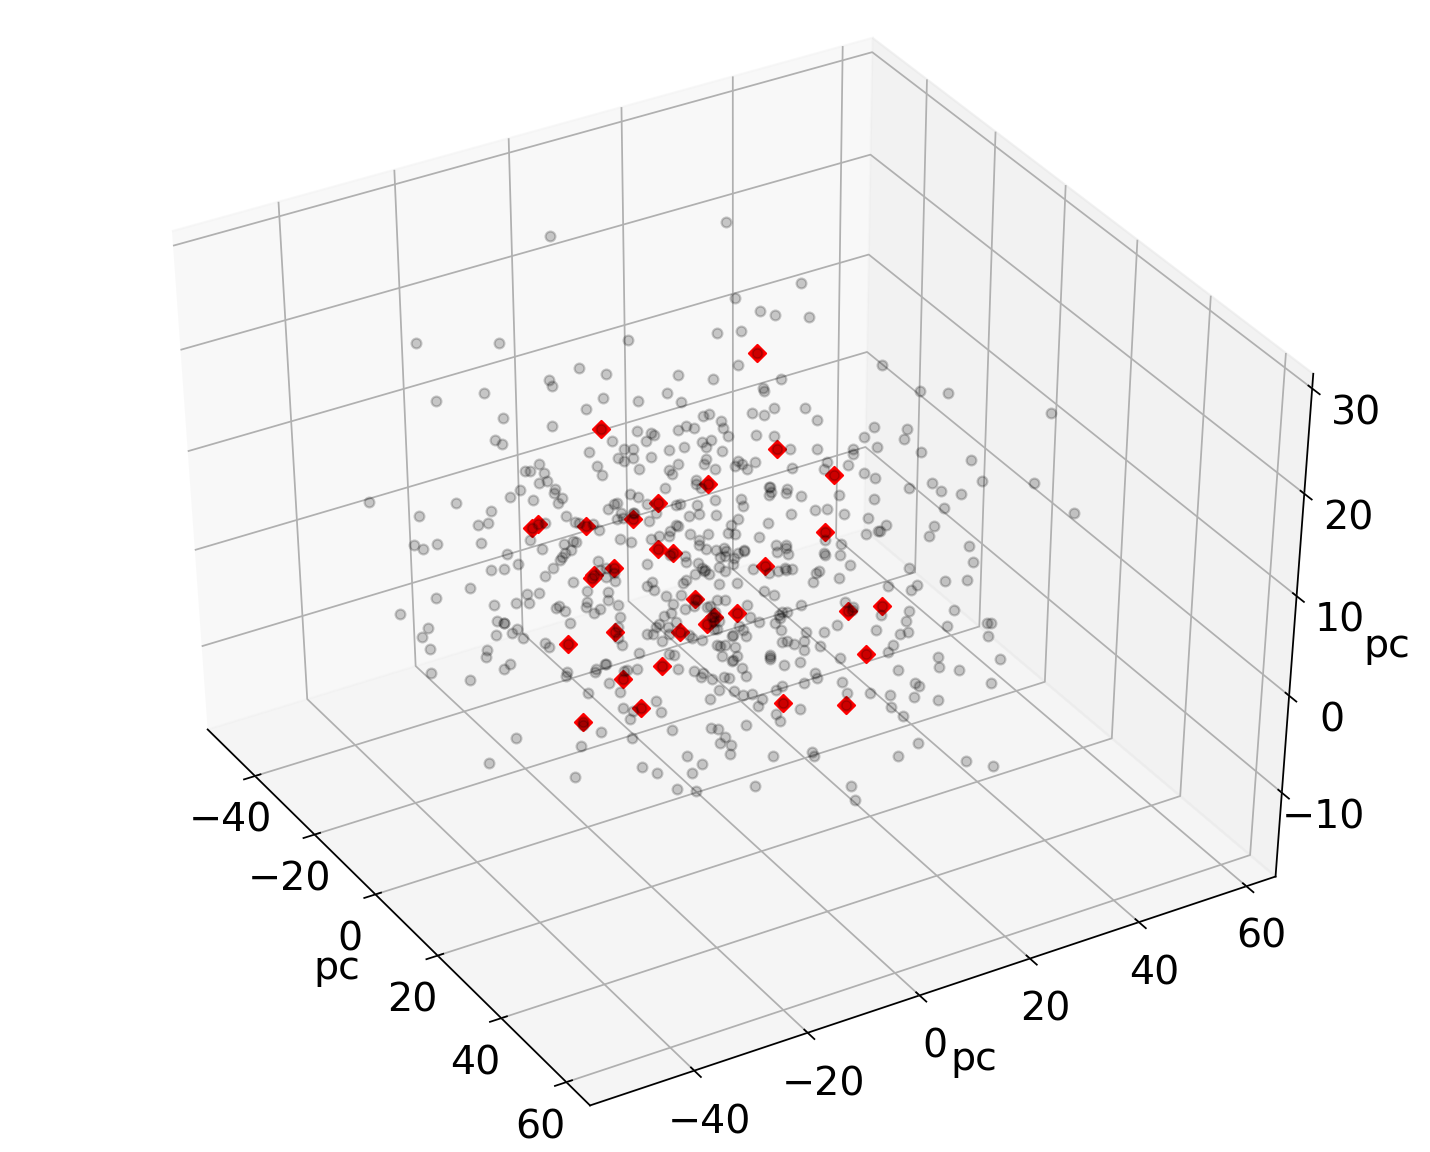

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


Text(0.5, 0, 'pc')

In [85]:
#%matplotlib inline
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#ax2=Axes3D(fig)
#p = ax.scatter((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,c=SSMgrv['RV']-23.8,depthshade=False)
#p = ax.scatter((SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(indiv_distances),indiv_distances - cdist,c=np.sign(SSMgrv['RV']-23.8),depthshade=False)
p = ax.scatter(x,y,(1e3/ssmems['parallax']) - cdist,depthshade=False,color='black',zorder=0,alpha=0.2)
p2 = ax.scatter(x[ind33],y[ind33],(1e3/ssmems[ind33]['parallax']) - cdist,depthshade=False,color='red',zorder=1,s=30,marker='D')


#p2 = ax.quiver3D((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,1e6*((SSMgrv['pmra']-cpmra))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*((SSMgrv['pmdec']-cpmdec))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*(SSMgrv['RV']-23.8)*3.24078e-14*np.pi*1e7)
#fig.colorbar(p,ax=ax,label='RV')
ax.set_xlabel('pc')
ax.set_ylabel('pc')
ax.set_zlabel('pc')

Text(0.5,0,'pc')

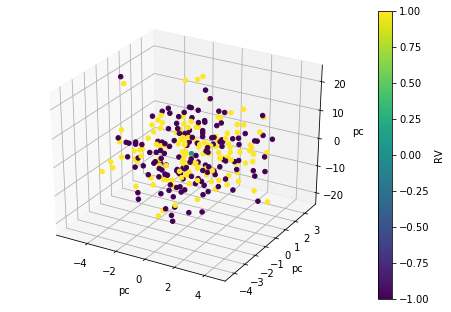

In [371]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#p = ax.scatter((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,c=SSMgrv['RV']-23.8,depthshade=False)
p = ax.scatter((SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(indiv_distances),indiv_distances - cdist,c=np.sign(SSMgrv['RV']-23.8),depthshade=False)

#p2 = ax.quiver3D((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,1e6*((SSMgrv['pmra']-cpmra))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*((SSMgrv['pmdec']-cpmdec))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*(SSMgrv['RV']-23.8)*3.24078e-14*np.pi*1e7)
fig.colorbar(p,ax=ax,label='RV')
ax.set_xlabel('pc')
ax.set_ylabel('pc')
ax.set_zlabel('pc')

Text(0.5,0,'pc')

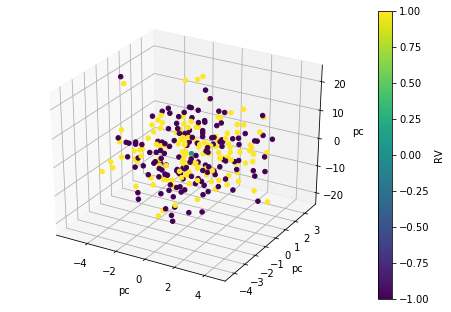

In [863]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#p = ax.scatter((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,c=SSMgrv['RV']-23.8,depthshade=False)
p = ax.scatter((SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(indiv_distances),indiv_distances - cdist,c=np.sign(SSMgrv['RV']-23.8),depthshade=False)

#p2 = ax.quiver3D((SSMgrv['ra']-cra)*(np.pi/180)*(1e3/SSMgrv['parallax']),(SSMgrv['dec']-cdec)*(np.pi/180)*(1e3/SSMgrv['parallax']),1e3/SSMgrv['parallax'] - cdist,1e6*((SSMgrv['pmra']-cpmra))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*((SSMgrv['pmdec']-cpmdec))/(1e3*206265)*(1e3/SSMgrv['parallax']),1e6*(SSMgrv['RV']-23.8)*3.24078e-14*np.pi*1e7)
fig.colorbar(p,ax=ax,label='RV')
ax.set_xlabel('pc')
ax.set_ylabel('pc')
ax.set_zlabel('pc')

In [19]:
np.sum(ssmems['proba'] > 0.68)

535

In [19]:
#rapos = (mems['ra']-cra)*(np.pi/180)*(1e3/mems['parallax'])
#rapos = (mems['ra']-cra)*np.cos(mems['dec']*np.pi/180)*(np.pi/180)*(1e3/mems['parallax'])
#decpos = (mems['dec']-cdec)*(np.pi/180)*(1e3/mems['parallax'])
ssmems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/NGC_2516_papertbls_singlestars.dat')
ssmems = ssmems[ssmems['proba'] > 0.68]

#rapos = (mems['ra']-cra)*np.cos(mems['dec']*np.pi/180)*60#(np.pi/180)*(1e3/mems['parallax'])
#decpos = (mems['dec']-cdec)*(np.pi/180)*60#(1e3/mems['parallax'])

#rapos = (mems['ra']-cra)*np.cos(mems['dec']*np.pi/180)*60# arcmin *(np.pi/180)*(1e3/mems['parallax'])

ra = ssmems['ra']
dec = ssmems['dec']

rapos = (ssmems['ra']-cra)*60# arcmin *(np.pi/180)*(1e3/mems['parallax'])
decpos = (ssmems['dec']-cdec)*60# arcmin *(np.pi/180)*(1e3/mems['parallax'])

rapos_sim = (ra_sim-cra)*60# arcmin *(np.pi/180)*(1e3/mems['parallax'])
decpos_sim = (dec_sim-cdec)*60

perppos = 1e3/ssmems['parallax'] - cdist

#x = rapos
#y = decpos
z = perppos

#x = np.cos(cdec*np.pi/180) * np.sin((ssmems['ra'] - cra)*np.pi/180)
x = np.cos(ssmems['dec']*np.pi/180) * np.sin((ssmems['ra'] - cra)*np.pi/180)
y = np.sin(ssmems['dec']*np.pi/180) * np.cos(cdec*np.pi/180) - np.cos(ssmems['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((ssmems['ra'] - cra)*np.pi/180)

#x_6791 = np.cos(cdec_6791*np.pi/180) * np.sin((likely6791['ra'] - cra_6791)*np.pi/180)

###x_6791 = np.cos(likely6791['dec']*np.pi/180) * np.sin((likely6791['ra'] - cra_6791)*np.pi/180)
###y_6791 = np.sin(likely6791['dec']*np.pi/180) * np.cos(cdec_6791*np.pi/180) - np.cos(likely6791['dec']*np.pi/180) * np.sin(cdec_6791*np.pi/180) * np.cos((likely6791['ra'] - cra_6791)*np.pi/180)

x_sim = np.cos(dec_sim*np.pi/180) * np.sin((ra_sim - cra)*np.pi/180)
y_sim = np.sin(dec_sim*np.pi/180) * np.cos(cdec*np.pi/180) - np.cos(dec_sim*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((ra_sim - cra)*np.pi/180)

cra_omegacen = 201.69065
cdec_omegacen = -47.47855

testra = 201.66751 #201.66147
testdec = -47.40899 #-47.40561

pmra_test = -4.2 #-3.8
pmdec_test = -5.5 #−5.1

x_omegacen = np.cos(testdec*np.pi/180) * np.sin((testra - cra_omegacen)*np.pi/180)
y_omegacen = np.sin(testdec*np.pi/180) * np.cos(cdec_omegacen*np.pi/180) - np.cos(testdec*np.pi/180) * np.sin(cdec_omegacen*np.pi/180) * np.cos((testra - cra_omegacen)*np.pi/180)


x *= 206265/60
y *= 206265/60

x_omegacen *= 206265/60
y_omegacen *= 206265/60
r_omegacen = np.sqrt(x_omegacen**2+y_omegacen**2)

###x_6791 *= 206265/60
###y_6791 *= 206265/60

x_sim *= 206265/60
y_sim *= 206265/60

mux_omegacen = (pmra_test) * np.cos((testra - cra_omegacen)*np.pi/180) - (pmdec_test) * np.sin(testdec*np.pi/180) * np.sin((testra-cra_omegacen)*np.pi/180)
muy_omegacen = (pmra_test) * np.sin(cdec_omegacen*np.pi/180) * np.sin((testra-cra_omegacen)*np.pi/180) + (pmdec_test) * (np.cos(testdec*np.pi/180)*np.cos(cdec_omegacen*np.pi/180) + np.sin(testdec*np.pi/180) * np.sin(cdec_omegacen*np.pi/180) * np.cos((testra-cra_omegacen)*np.pi/180))

mux_omegacen += 3.97
muy_omegacen += 4.38

mur_omegacen = (x_omegacen*mux_omegacen + y_omegacen*muy_omegacen)/r_omegacen
mut_omegacen = (-y_omegacen*mux_omegacen + x_omegacen*muy_omegacen)/r_omegacen



In [1281]:
mut_omegacen

0.46906108840785077

In [1282]:
x_omegacen,y_omegacen,r_omegacen

(-0.9396150852426457, 4.1734630515841555, 4.2779282779581145)

In [1283]:
mux_omegacen ,muy_omegacen

(-0.2283643434867222, -1.1212458813138175)

In [1284]:
mur_omegacen,mut_omegacen

(-1.043706996757693, 0.46906108840785077)

Text(0,0.5,'North --->')

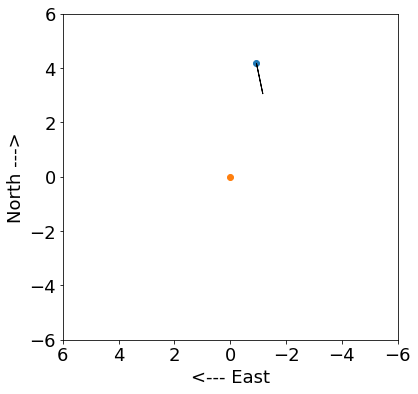

In [1278]:
plt.figure(figsize=(6,6))
plt.scatter(x_omegacen,y_omegacen)
plt.scatter(0,0)
plt.arrow(x_omegacen,y_omegacen,mux_omegacen,muy_omegacen)
plt.xlim(6,-6)
plt.ylim(-6,6)
plt.xlabel('<--- East')
plt.ylabel('North --->')

In [1263]:
# positive mut --> clockwise rotation

# plt.hist(np.cos((likely6791['ra']-cra_6791)*np.pi/180))

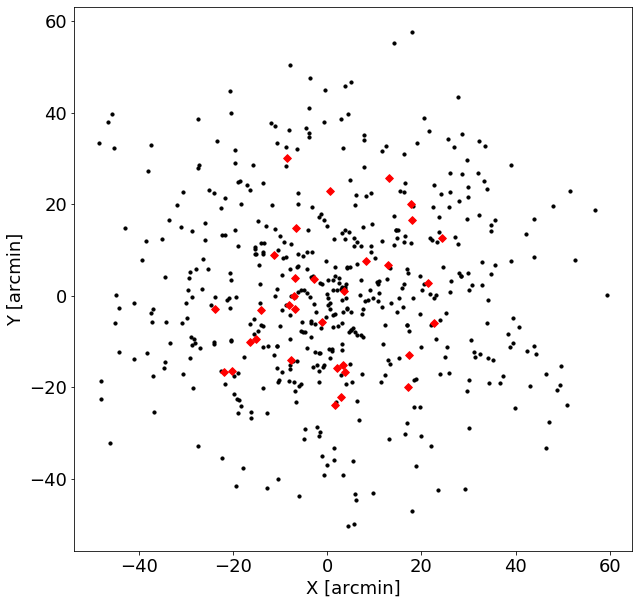

In [57]:
fig1= plt.figure(figsize=(10,10))
plt.scatter(x,y,s=10,color='black')
plt.scatter(x[np.isin(ssmems['source_id'],finalresults['source_id'])],y[np.isin(ssmems['source_id'],finalresults['source_id'])],s=30,color='red',marker='D')
plt.xlabel('X [arcmin]')
plt.ylabel('Y [arcmin]')
fig1.savefig('/Users/bhealy/Downloads/NGC_2516_xypositions.pdf',bbox_inches='tight')
#plt.xlim(-15,15)
#plt.ylim(-15,15)

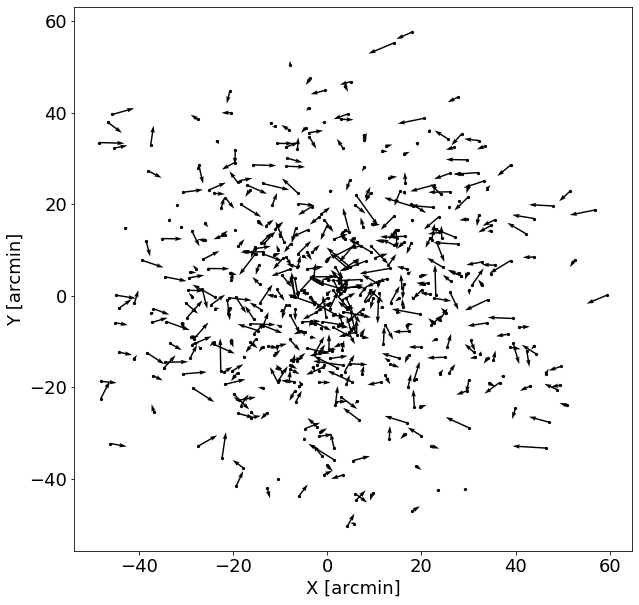

In [58]:
fig2=plt.figure(figsize=(10,10))
plt.scatter(x,y,s=5,color='black')
plt.quiver(x,y,mux,muy)
ind33 = [np.isin(ssmems['source_id'],finalresults['source_id'])]
#plt.scatter(x[ind33],y[ind33],s=15,color='red')
#plt.quiver(x[ind33],y[ind33],mux[ind33],muy[ind33],color='red')

plt.xlabel('X [arcmin]')
plt.ylabel('Y [arcmin]')
fig2.savefig('/Users/bhealy/Downloads/NGC_2516_propermotions.pdf',bbox_inches='tight')

#plt.xlim(-15,15)
#plt.ylim(-15,15)

In [27]:
x[np.isin(ssmems['source_id'],finalresults['source_id'])]

<Column name='dec' dtype='float64' length=33>
 0.5565042475854726
 -7.758708861792066
 21.457280241449496
  13.00572226182387
 24.306958438198123
 -8.550750920409538
 17.823443015771012
  18.04694136583531
 -6.965215704309159
 12.990089836985037
-2.9053278649209813
  17.24650258889836
                ...
-15.200168069410585
 -6.907194384386655
-20.163180530331346
   8.19323760985223
-21.833837559464122
 -6.677360683447237
-1.0712809924222477
 2.8825301914501256
-14.029471912893403
  -8.15440972313625
 -16.38636805117983
 17.173225949400123

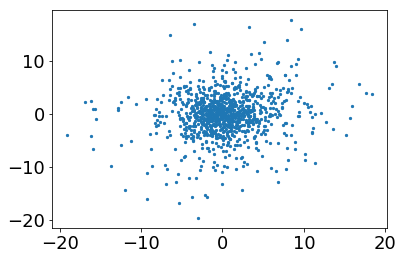

In [1037]:
plt.scatter(x_6791,y_6791,s=5)

In [1012]:
ssmems

<Table length=535>
        ra                 dec         ... astrometric_excess_noise_sig
     float64             float64       ...           float64           
------------------ ------------------- ... ----------------------------
120.92347226164134  -60.90750623116792 ...           2.8659240562280126
119.48849012769524  -60.75724495255902 ...           2.5599997898028537
119.16036257093539  -60.77604713858194 ...           1.1921844569846507
 119.4210732231115  -60.72733767006693 ...           2.4990136097204503
118.53751875121381  -60.71156024889231 ...           0.9701412342883471
119.31743340645221  -60.42717907081204 ...           0.9171151864312368
117.96477020735708  -60.15880628811523 ...            2.775526833185336
119.83694280087349 -60.424639055921205 ...            2.965353241488826
119.39433047854344   -60.2066996923345 ...            1.819105352872113
119.63355793851568  -60.89751757752762 ...           2.3550112686806792
               ...                 ... ...                          ...
119.73176827414855   -60.4324225678996 ...                          0.0
119.71733136904545 -61.399736561744774 ...                          0.0
120.16115235798104  -61.10671579276989 ...             0.91489739557518
118.99314722588028 -60.322609814371184 ...            2.423231846295144
120.40889647173576  -60.41888185470601 ...           0.8874466748932285
120.42174774469711  -60.74515285966203 ...            0.895254906318185
120.43011489808374 -60.257054797345646 ...           0.5651346892522313
120.66891417136276  -60.40556839669539 ...           0.5537113964276518
119.06339117109313  -60.39068739243173 ...           1.4796186967072695
119.54954188795023  -61.02826735416334 ...           0.5219666051947189

In [21]:
memberfile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/members.fits'
memberhdu = fits.open(memberfile)
members = memberhdu[1].data
M = Table(members)

In [22]:
for i in range(len(M)):
    M[i]['cluster'] = M[i]['cluster'].strip()

In [20]:
ngc_6791= M[M['cluster']=='NGC_6791']

In [21]:
likely6791 = ngc_6791[ngc_6791['proba'] > 0.9]
likely6791

<Table length=1256>
        ra                dec              source_id      ...  proba  cluster 
     float64            float64              int64        ... float32  str17  
------------------ ------------------ ------------------- ... ------- --------
 290.5046996802422 37.936331063789936 2052608821167405824 ...     1.0 NGC_6791
 290.5856243824543  37.83988274155384 2052604423120883840 ...     1.0 NGC_6791
 290.4998711079959  37.98762991154779 2052609783240410112 ...     1.0 NGC_6791
290.52292479891673  37.91331850348375 2052608546289494656 ...     1.0 NGC_6791
 290.5680497319431  37.86831061192972 2052605247754613888 ...     1.0 NGC_6791
 290.4985646651257  37.86878297437687 2052608026591237248 ...     1.0 NGC_6791
 290.4599472254164  37.88334415809629 2052608271411507712 ...     1.0 NGC_6791
290.49098537030744  37.85451276044368 2052607927814126592 ...     1.0 NGC_6791
290.40373830861387  37.93219599420865 2052609370923542016 ...     1.0 NGC_6791
290.41055978594176 37.945161810801174 2052797043812001920 ...     1.0 NGC_6791
               ...                ...                 ... ...     ...      ...
290.05541696961956  37.90761418440181 2051298645681740544 ...     1.0 NGC_6791
290.15183559108414 37.936674488403845 2051298203306457216 ...     1.0 NGC_6791
 290.2433374102025  37.98045089541496 2051299715134819328 ...     1.0 NGC_6791
290.25117442085207  37.98282184103532 2051300024372475264 ...     1.0 NGC_6791
 290.1460502099028  37.90708092462298 2051298100226949760 ...     1.0 NGC_6791
 290.0607246653097  38.00412741118754 2051311294366490368 ...     1.0 NGC_6791
290.22821400036094  37.96009857617127 2051299680775044608 ...     1.0 NGC_6791
 290.1516168635468  37.94044318037238 2051298199005240448 ...     1.0 NGC_6791
 290.1549650787928 37.988258406957215 2051300638556319744 ...     1.0 NGC_6791
290.08103613032466 38.080971671364246 2051313763965091968 ...     1.0 NGC_6791

In [22]:
#coords6819 = SkyCoord(likely6819['ra']*u.deg,likely6819['dec']*u.deg)
coords6791 = SkyCoord(likely6791['ra']*u.deg,likely6791['dec']*u.deg)

In [23]:
coords = SkyCoord(ra*u.deg,dec*u.deg)
Vpm = ascii.read('/Users/bhealy/Downloads/DR2_spatialCov_V1/spatialCovarianceQso.txt')

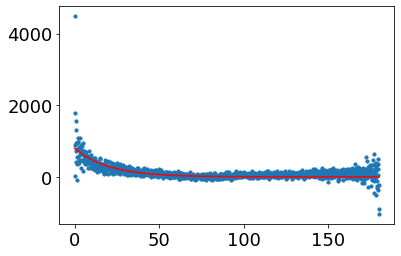

In [24]:
plt.scatter(Vpm['theta'],Vpm['V_mu'],s=10)
plt.plot(Vpm['theta'],800*np.exp(-Vpm['theta']/20),color='red')

In [25]:
plt.rcParams['font.size']=18

In [26]:
c = coords[0].separation(coords[1])

In [375]:
coords[0],coords[1]

(<SkyCoord (ICRS): (ra, dec) in deg
     (120.92347226, -60.90750623)>, <SkyCoord (ICRS): (ra, dec) in deg
     (119.48849013, -60.75724495)>)

In [342]:
c.deg

0.7153063306621448

In [346]:
np.interp(c.deg,Vpm['theta'],Vpm['V_mu'])

479.9264851404518

In [351]:
800*np.exp(-c.deg/20)

771.8933641424029

In [25]:
coords[0].separation(coords).deg

array([0.        , 0.71530633, 0.86900068, 0.75437278, 1.17997686,
       0.92176196, 1.63652044, 0.71865756, 1.02762918, 0.62735096,
       0.70938445, 0.11331441, 0.57672531, 0.48922135, 1.02076369,
       0.6116543 , 0.449532  , 0.24131925, 0.80336666, 0.73791417,
       0.93442512, 0.50433339, 0.75306585, 0.737086  , 0.83188662,
       0.35309866, 0.86417787, 0.58897685, 0.25627711, 0.7363225 ,
       0.37175472, 1.36871651, 0.89770191, 0.80658797, 0.96375479,
       1.08615533, 1.44088602, 1.32881456, 0.36109539, 0.59800117,
       0.42538043, 0.1571737 , 0.56122961, 1.1220605 , 0.95177365,
       1.30840438, 1.03312547, 0.84785009, 0.76656208, 1.0729723 ,
       0.64268567, 0.64524746, 0.29697418, 0.37221896, 0.21794898,
       0.40672993, 0.59361341, 1.15941509, 1.06696261, 0.8341417 ,
       0.50415535, 1.1222008 , 0.81714032, 0.35985067, 0.69199167,
       1.26780906, 0.79142086, 0.57915506, 0.67624586, 0.71438032,
       0.80081466, 0.98043774, 0.64873993, 0.26066121, 0.18432

In [26]:
doublesum = 0
for i in range(1,len(ssmems)):
#for i in range(1,len(coords6791)):

    #print(i)
    #print(range(0,i-1))
    #for j in range(0,i-1):
        #phi_ij = coords[i].separation(coords).deg
    phi_ij = coords[i].separation(coords[0:i]).deg
    #phi_ij = coords6791[i].separation(coords6791[0:i]).deg

    Vvalues = 800 * np.exp(-phi_ij/20)
    doublesum += np.sum(Vvalues)
    #for j in range(0,len(ssmems)-1):
        #phi_ij = coords[i].separation(coords[j]).deg
        #doublesum += np.interp(phi_ij,Vpm['theta'],Vpm['V_mu'])
        #Vvalue = 800 * np.exp(-phi_ij/20)

In [27]:
np.sqrt((2/len(ssmems)**2) * doublesum)*1e-3
#np.sqrt((2/len(coords6791)**2) * doublesum) * 1e-3

0.02783529972250791

In [29]:
#coords[i].separation(coords[0:i]).deg

In [30]:
np.sqrt((1.08/len(coords)**2)*np.sum(4*ssmems['pmra_error']**2 + 800))*1e-3

0.0012708389902803547

In [952]:
noisetbl = pd.read_csv('/Users/bhealy/Downloads/manystars_astronoise.csv')
#noisetbl = pd.read_csv('/Users/bhealy/Downloads/1585164403916O-result.csv')
noisetbl = noisetbl[['source_id','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig']]
noisetbl.set_index('source_id')


astrometric_gof_al  astrometric_chi2_al  \
source_id                                                      
5290024533163062144           15.810993            693.32874   
5290739387520374912           19.240837            825.02470   
5290673794780227072           21.366110            961.93090   
5290949669118299776           17.413725            791.43274   
5290769211774211968           33.599850           1859.24660   
5290816009737675392           16.256824            644.57404   
5290722929205920640           16.210610            669.50580   
5290767150189898496           22.324425           1014.75415   
5290818586713364352           66.862335           6763.54830   
5290702279003050496           16.463778            725.68726   
5290673897859442304           22.632631           1025.63100   
5290662383047290496           16.643602            757.07306   
5290847380178313856           19.576033            906.27600   
5290721997195236480           13.942922            605.55080   
5290814768486344320           17.710007            775.80110   
5290949566038905984           17.956776            766.29486   
5290723891278514048           16.716303            709.31696   
5290696128609865600           21.336428            971.70410   
5290722929205920896           27.490469           1324.90640   
5290722860486442752           27.825928           1349.62000   
5290719665030852096           19.215103            879.37494   
5290816937450497408           15.818600            642.67360   
5290718737318003840           23.162941           1093.46080   
5290772201071458944           26.597187           1346.50800   
5290673519902401024           20.869654            933.39840   
5289976085932146560           20.847368            996.19570   
5290722173291771136           14.772643            610.48660   
5290821060618951296           23.270472           1109.91310   
5290730144750808192           16.896183            737.58120   
5290721486096996736           18.470543            771.88477   
...                                 ...                  ...   
5290934993212809216            3.079184            276.52942   
5290758143637597696            1.889508            238.37311   
5290760965437190528            1.840105            263.41602   
5290633559526975360            1.272695            231.14207   
5290734916457109504            1.245859            214.61188   
5290671973714254592            1.964359            268.54495   
5290717500367250688            4.691098            307.13345   
5290855042400243712            0.750721            218.84328   
5290028102278347136            3.243846            233.91930   
5290804391846564736            4.669330            305.32080   
5290734267919314176            2.369731            242.62456   
5290757254585726976            1.617591            238.79030   
5290803876450455424            1.709034            257.09110   
5290712788784793216            3.554816            293.11765   
5290840680029293568            4.094379            325.04560   
5290703477295735040            4.339035            338.92242   
5290769211774213248            7.272205            331.64377   
5290935993942166912            1.810172            282.22458   
5290932935925488640            2.820707            264.50882   
5290732824810285184            4.008813            320.35892   
5290946198784376576            6.776615            314.74280   
5290771234698060288            3.155140            289.93372   
5290667124690661248            1.671251            242.16006   
5290715988538836224            3.051883            260.88214   
5290713475977840256            2.221698            232.56837   
5290718359360871680            2.381577            237.28550   
5290667438228927104            7.343475            388.80057   
5290667438224969728            5.822030            243.19020   
5290659672927983232            6.737174            378.22650   
5290757082787103872            2.242151            25

In [966]:
mems_pd = ssmems.to_pandas()
mems_pd.set_index('source_id')

ra        dec           l          b  parallax  \
source_id                                                                     
5290024533163062144  120.923472 -60.907506  274.292514 -15.323834  2.386951   
5290722173291771136  119.488490 -60.757245  273.812735 -15.869835  2.354571   
5290724337955116672  119.160363 -60.776047  273.753341 -16.020736  2.419703   
5290725437466835840  119.421073 -60.727338  273.769327 -15.885227  2.341813   
5290921975169123712  118.537519 -60.711560  273.549475 -16.262529  2.341370   
5290838274842249984  119.317433 -60.427179  273.468149 -15.791763  2.293741   
5291009523782112640  117.964770 -60.158806  272.902812 -16.267275  2.440920   
5290829410035301376  119.836943 -60.424639  273.589649 -15.563587  2.358251   
5291032613526130048  119.394330 -60.206700  273.283392 -15.655995  2.344104   
5290672695264349184  119.633558 -60.897518  273.976030 -15.872149  2.354926   
5290737119777616640  119.031522 -60.703900  273.656607 -16.043697  2.407719   
5290743682487671552  119.099549 -60.513669  273.496592 -15.926909  2.351976   
5290822538087854976  119.657457 -60.560802  273.671830 -15.705334  2.418394   
5290004673234138112  120.692202 -60.893720  274.224144 -15.415997  2.425640   
5290768043538081280  119.761351 -60.796896  273.913515 -15.770255  2.516391   
5290776908350801664  120.130837 -60.608478  273.828628 -15.522244  2.402060   
5290715370058746368  118.825029 -60.959719  273.846024 -16.249774  2.428471   
5290850472555175168  120.401894 -60.351909  273.659779 -15.283149  2.378224   
5289930181318610432  121.139297 -61.344791  274.742204 -15.442528  2.388491   
5290781203323379456  120.740422 -60.683324  274.044134 -15.294798  2.496203   
5290836522500952832  119.686502 -60.380525  273.513107 -15.608657  2.370455   
5290718806032777600  119.406149 -60.897790  273.923090 -15.970342  2.427578   
5290742582976042496  119.152181 -60.556361  273.548392 -15.923501  2.318707   
5290770276926009600  119.981679 -60.699425  273.876284 -15.629516  2.329748   
5290671286515023744  119.382256 -60.991507  274.004059 -16.023817  2.386063   
5290650705036608256  119.914709 -61.194377  274.315072 -15.889717  2.353509   
5290956266187967232  117.476407 -60.715396  273.312608 -16.729287  2.346650   
5290671698836255616  119.408900 -60.948918  273.970928 -15.992723  2.348595   
5290868820655092992  120.211544 -60.152930  273.431756 -15.271821  2.372948   
5290747943096587776  120.214038 -60.984862  274.193185 -15.663711  2.358940   
...                         ...        ...         ...        ...       ...   
5291030341486158592  119.142397 -60.317356  273.325408 -15.817940  2.504732   
5290934443456996992  118.880934 -60.422907  273.361378 -15.981201  2.442825   
5289882348267322624  120.190274 -61.397696  274.566264 -15.867797  2.353198   
5290709219670524416  118.867254 -61.174848  274.055447 -16.329087  2.420671   
5290764160892663168  119.898290 -60.818986  273.966198 -15.721493  2.503352   
5290665170485954944  119.196647 -61.023153  273.990329 -16.118267  2.526094   
5290750309616954368  119.891516 -60.985356  274.117449 -15.802123  2.433434   
5290012537316756608  121.279671 -60.942629  274.410903 -15.189110  2.507821   
5290835418689851648  119.731768 -60.432423  273.571596 -15.613108  2.388107   
5289896057802949120  119.717331 -61.399737  274.458416 -16.069071  2.429600   
5290745086936635392  120.161152 -61.106716  274.292389 -15.743607  2.354496   
5290615795542467712  119.022921 -61.591270  274.477581 -16.451387  2.406866   
5290937059094104192  118.993147 -60.322610  273.294992 -15.886006  2.431269   
5290803051816290176  120.408896 -60.418882  273.722568 -15.311946  2.410244   
5290667472588666368  119.653210 -61.065174  274.135085 -15.941442  2.440433   
5290735333071202944  118.801753 -60.683806  273.584651 -16.134650  2.395090   
5290758143637597696  120.377860 -60.850183  274.108948 -15.529935  2.417561   
5290760965437190528  120.421748 -60.745153  274.023496 -15.461312  2.461429   


In [962]:
mems_merged = mems_pd.merge(noisetbl,on='source_id')

In [963]:
mems_merged = Table(mems_merged.values,names=mems_merged.columns,dtype=mems_merged.dtypes)




In [967]:
#lownoise = mems_merged['astrometric_excess_noise_sig'] < 5
lownoise = ssmems['astrometric_excess_noise_sig'] < 5

In [28]:
ssmems#[lownoise]

<Table length=535>
        ra                 dec         ... astrometric_excess_noise_sig
     float64             float64       ...           float64           
------------------ ------------------- ... ----------------------------
120.92347226164134  -60.90750623116792 ...           2.8659240562280126
119.48849012769524  -60.75724495255902 ...           2.5599997898028537
119.16036257093539  -60.77604713858194 ...           1.1921844569846507
 119.4210732231115  -60.72733767006693 ...           2.4990136097204503
118.53751875121381  -60.71156024889231 ...           0.9701412342883471
119.31743340645221  -60.42717907081204 ...           0.9171151864312368
117.96477020735708  -60.15880628811523 ...            2.775526833185336
119.83694280087349 -60.424639055921205 ...            2.965353241488826
119.39433047854344   -60.2066996923345 ...            1.819105352872113
119.63355793851568  -60.89751757752762 ...           2.3550112686806792
               ...                 ... ...                          ...
119.73176827414855   -60.4324225678996 ...                          0.0
119.71733136904545 -61.399736561744774 ...                          0.0
120.16115235798104  -61.10671579276989 ...             0.91489739557518
118.99314722588028 -60.322609814371184 ...            2.423231846295144
120.40889647173576  -60.41888185470601 ...           0.8874466748932285
120.42174774469711  -60.74515285966203 ...            0.895254906318185
120.43011489808374 -60.257054797345646 ...           0.5651346892522313
120.66891417136276  -60.40556839669539 ...           0.5537113964276518
119.06339117109313  -60.39068739243173 ...           1.4796186967072695
119.54954188795023  -61.02826735416334 ...           0.5219666051947189

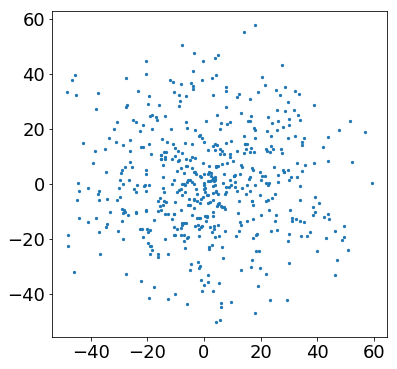

In [121]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,s=5)

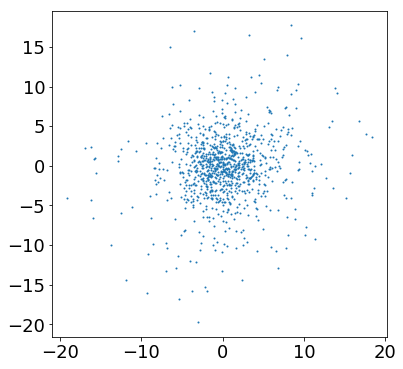

In [199]:
plt.figure(figsize=(6,6))
plt.scatter(x_6791,y_6791,s=1)

In [1041]:
cra,cdec

(119.527, -60.8)

(array([ 18.,  37.,  55.,  90., 125.,  71.,  68.,  44.,  19.,   8.]),
 array([-48.36547687, -37.59715541, -26.82883394, -16.06051248,
         -5.29219102,   5.47613044,  16.24445191,  27.01277337,
         37.78109483,  48.54941629,  59.31773776]),
 <a list of 10 Patch objects>)

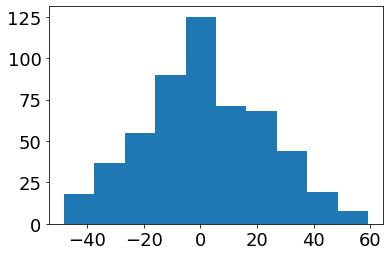

In [29]:
plt.hist(x)

(array([ 12.,  22.,  48., 101., 129., 102.,  62.,  37.,  18.,   4.]),
 array([-50.28671931, -39.49852454, -28.71032978, -17.92213502,
         -7.13394025,   3.65425451,  14.44244927,  25.23064404,
         36.0188388 ,  46.80703357,  57.59522833]),
 <a list of 10 Patch objects>)

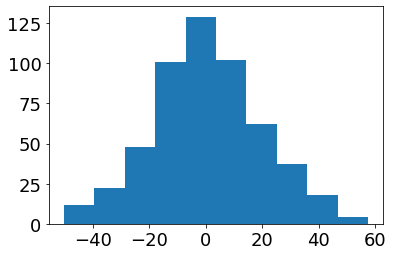

In [30]:
plt.hist(y)

(-80, 80)

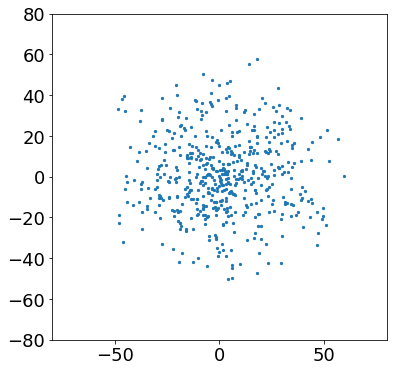

In [31]:
plt.figure(figsize=(6,6))
#plt.scatter(cra,cdec)
plt.scatter(x,y,s=5)
plt.xlim(-80,80)
plt.ylim(-80,80)

In [40]:
#rapos_rv = (SSMgrv['ra']-cra)*np.cos(SSMgrv['dec']*np.pi/180)*60#(np.pi/180)*(1e3/SSMgrv['parallax'])
#decpos_rv = (SSMgrv['dec']-cdec)*(np.pi/180)*60#(1e3/SSMgrv['parallax'])

rapos_rv = (SSMgrv['ra']-cra)*60# arcmin *(np.pi/180)*(1e3/SSMgrv['parallax'])
decpos_rv = (SSMgrv['dec']-cdec)*60# arcmin *(np.pi/180)*(1e3/SSMgrv['parallax'])

#rapos_rv_sim = (ra_sim-cra)*60
#decpos_rv_sim = (dec_sim-cdec)*60

perppos_rv = 1e3/SSMgrv['parallax'] - cdist
#perppos_rv = 1e3/joinjefftbl[goodindx]['parallax'] - cdist


#x_rv = rapos_rv
#y_rv = decpos_rv
z_rv = perppos_rv

x_rv = np.cos(SSMgrv['dec']*np.pi/180) * np.sin((SSMgrv['ra'] - cra)*np.pi/180)
y_rv = np.sin(SSMgrv['dec']*np.pi/180) * np.cos(cdec*np.pi/180) - np.cos(SSMgrv['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((SSMgrv['ra'] - cra)*np.pi/180)

#x_rv = np.cos(cdec*np.pi/180) * np.sin((joinjefftbl[goodindx]['ra'] - cra)*np.pi/180)
#y_rv = np.sin(joinjefftbl[goodindx]['dec']*np.pi/180) * np.cos(cdec*np.pi/180) - np.cos(joinjefftbl[goodindx]['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((joinjefftbl[goodindx]['ra'] - cra)*np.pi/180)

x_rv *= 206265/60
y_rv *= 206265/60


In [913]:
omega_x = -0.086
omega_y = -0.114
omega_z = -0.037

u_omega_x = unumpy.uarray(-0.086, 0.025)
u_omega_y = unumpy.uarray(-0.114, 0.025)
u_omega_z = unumpy.uarray(-0.037, 0.025)

In [41]:
u_pmra = unumpy.uarray(ssmems['pmra'],ssmems['pmra_error'])
u_pmdec = unumpy.uarray(ssmems['pmdec'],ssmems['pmdec_error']) 


###u_pmra_6791 = unumpy.uarray(likely6791['pmra'],likely6791['pmra_error'])
###u_pmdec_6791 = unumpy.uarray(likely6791['pmdec'],likely6791['pmdec_error']) 

In [20]:
#cpmra + omega_x*np.sin(cdec*np.pi/180)*np.cos(cra*np.pi/180) + omega_y*np.sin(cdec*np.pi/180)*np.cos(cra*np.pi/180) - omega_z*np.cos(cdec*np.pi/180)


pmra_nomvals = unumpy.nominal_values(u_pmra)
pmdec_nomvals = unumpy.nominal_values(u_pmdec)
pmra_stdevs = unumpy.std_devs(u_pmra)
pmdec_stdevs = unumpy.std_devs(u_pmdec)


u_pmra_rv = unumpy.uarray(SSMgrv['pmra'],SSMgrv['pmra_error'])
u_pmdec_rv = unumpy.uarray(SSMgrv['pmdec'],SSMgrv['pmdec_error'])

for i in range(len(mems)):
    if mems['phot_g_mean_mag'][i] < 13:
        pmra_nomvals[i] = unumpy.nominal_values(u_pmra)[i] + omega_x*np.sin(cdec*np.pi/180)*np.cos(cra*np.pi/180) + omega_y*np.sin(cdec*np.pi/180)*np.sin(cra*np.pi/180) - omega_z*np.cos(cdec*np.pi/180)
        #u_pmra[i].nominal_value = dummy1
        #pmra_stdevs[i] = unumpy.std_devs(u_pmra)[i]
        pmdec_nomvals[i] = unumpy.nominal_values(u_pmdec)[i] - omega_x*np.sin(cra*np.pi/180) + omega_y*np.cos(cra*np.pi/180)
        #u_pmdec[i].std_dev = unumpy.std_devs(u_pmdec)[i]

#for i in range(len(SSMgrv)):
#    if SSMgrv['phot_g_mean_mag'][i] < 13:
#        u_pmra_rv[i].nominal_value = unumpy.nominal_values(u_pmra_rv)[i] + omega_x*np.sin(cdec*np.pi/180)*np.cos(cra*np.pi/180) + omega_y*np.sin(cdec*np.pi/180)*np.sin(cra*np.pi/180) - omega_z*np.cos(cdec*np.pi/180)
#        u_pmra_rv[i].std_dev = unumpy.std_devs(u_pmra_rv)[i]
#        u_pmdec_rv[i].nominal_value = unumpy.nominal_values(u_pmdec_rv)[i] - omega_x*np.sin(cra*np.pi/180) + omega_y*np.cos(cra*np.pi/180)
#        u_pmdec_rv[i].std_dev = unumpy.std_devs(u_pmdec_rv)[i]


u_pmra = unumpy.uarray(pmra_nomvals,pmra_stdevs)
u_pmdec = unumpy.uarray(pmdec_nomvals,pmdec_stdevs)



NameError: name 'omega_x' is not defined

In [1755]:
unumpy.nominal_values(u_pmra)

<Column name='pmra' dtype='float64' length=651>
 -4.322659177281228
 -4.671327131196374
 -4.433825182602314
 -4.745448478563206
 -4.509706094770424
 -5.340208533762163
 -4.195926226674069
 -4.931418644748942
  -4.18009852682154
 -4.855678537056708
 -3.641691724370642
 -4.674334643884824
                ...
-3.9454994328592257
-5.0415132014938235
-4.2382503690119195
 -4.582276609091817
-4.4619452092227885
 -4.019435292137639
-3.7219127917077626
 -4.073257075974361
 -4.402965119487511
 -4.348962474062153
 -4.664404675595517
  -5.09491366684325

In [629]:
u_pmra[0].std_dev=2

(array([ 8.,  2., 19., 34., 38., 40., 40., 23., 21.,  9.]),
 array([-91.70664081, -75.81508336, -59.92352591, -44.03196846,
        -28.14041101, -12.24885356,   3.64270389,  19.53426134,
         35.42581879,  51.31737624,  67.20893369]),
 <a list of 10 Patch objects>)

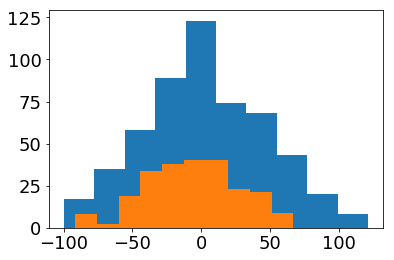

In [130]:
plt.hist(rapos)
plt.hist(rapos_rv)

In [58]:
#rad_dist = np.sqrt(rapos**2+decpos**2+perppos**2)

In [34]:
np.std(ssmems['pmra'])/np.sqrt(len(ssmems))

0.01986704277986179

In [42]:
vperp = (SSMgrv['RV']-23.75)#*3.24078e-14*np.pi*1e7
vperp_sim = vlos_sim-np.mean(SSMgrv['RV'])

#crv = unumpy.uarray(23.8,0.41/np.sqrt(len(SSMgrv)))
crv = unumpy.uarray(23.75,0.0)

u_rv = unumpy.uarray(SSMgrv['RV'],SSMgrv['pRV'])
u_vperp = u_rv - crv

#vra = ((SSMgrv['pmra']-cpmra))/(1e3)*(indiv_distances)
#vdec = ((SSMgrv['pmdec']-cpmdec))/(1e3)*(indiv_distances) * 3.086e+13 / (np.pi * 1e7)

#vra = ((SSMgrv['pmra']-cpmra))/(1e3)*(indiv_distances)

###pmra_sub_rv = u_pmra_rv - u_cpmra
###pmdec_sub_rv = u_pmdec_rv - u_cpmdec

#pmra_sub_rv = u_pmra_rv - u_cpmra
#pmdec_sub_rv = u_pmdec_rv - u_cpmra

mura_sub_sim = mura_sim - cpmra
mudec_sub_sim = mudec_sim - cpmdec

#vra_rv=(SSMgrv['pmra']-cpmra)/1e3/206265/np.pi/1e7 * indiv_distances_rv * 3.086e+13
#vdec_rv=(SSMgrv['pmdec']-cpmdec)/1e3/206265/np.pi/1e7 * indiv_distances_rv * 3.086e+13

#vra_rv=(SSMgrv['pmra']-cpmra)/1e3/206265/np.pi/1e7 * cdist * 3.086e+13
#vdec_rv=(SSMgrv['pmdec']-cpmdec)/1e3/206265/np.pi/1e7 * cdist * 3.086e+13

vz_rv = vperp
#vy_rv = vdec_rv
#vx_rv = vra_rv

#mura_corr_rv = SSMgrv['pmra']

#mux_rv = (pmra_sub_rv) * np.cos((SSMgrv['ra'] - cra)*np.pi/180) - (pmdec_sub_rv) * np.sin(SSMgrv['dec']*np.pi/180) * np.sin((SSMgrv['ra']-cra)*np.pi/180)
#muy_rv = (pmra_sub_rv) * np.sin(cdec*np.pi/180) * np.sin((SSMgrv['ra']-cra)*np.pi/180) + (pmdec_sub_rv) * (np.cos(SSMgrv['dec']*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(SSMgrv['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((SSMgrv['ra']-cra)*np.pi/180))

mux_sim = (mura_sub_sim) * np.cos((ra_sim - cra)*np.pi/180) - (mudec_sub_sim) * np.sin(dec_sim*np.pi/180) * np.sin((ra_sim-cra)*np.pi/180)
muy_sim = (mura_sub_sim) * np.sin(cdec*np.pi/180) * np.sin((ra_sim-cra)*np.pi/180) + (mudec_sub_sim) * (np.cos(dec_sim*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(dec_sim*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((ra_sim-cra)*np.pi/180))

vx_sim = 4.74*cdist/1e3 * mux_sim
vy_sim = 4.74*cdist/1e3 * muy_sim

#u_vx_rv = 4.74*u_cdist/1e3 * mux_rv
#u_vy_rv = 4.74*u_cdist/1e3 * muy_rv

#c_mux_rv = cpmra * np.cos((cra - cra)*np.pi/180) - cpmdec * np.sin(cdec*np.pi/180) * np.sin((cra-cra)*np.pi/180)
#c_muy_rv = cpmra * np.sin(cdec*np.pi/180) * np.sin((cra-cra)*np.pi/180) + cpmdec * (np.cos(cdec*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(cdec*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((cra-cra)*np.pi/180))


#vtan_rv = np.sqrt(vdec**2 + vra**2)

NameError: name 'mux' is not defined

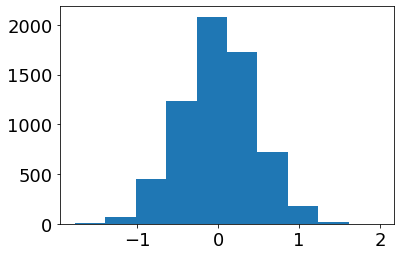

In [43]:
plt.hist(mux_sim)
plt.hist(mux)

In [362]:
#c_mux_rv, c_muy_rv, cpmra, cpmdec

(-4.676531175563038,
 11.210659039863186,
 -4.676531175563038,
 11.210659039863184)

(array([ 7.,  6., 27., 43., 54., 63., 43., 21.,  4.,  1.]),
 array([-2.29029357, -1.8338528 , -1.37741203, -0.92097126, -0.46453049,
        -0.00808973,  0.44835104,  0.90479181,  1.36123258,  1.81767335,
         2.27411412]),
 <a list of 10 Patch objects>)

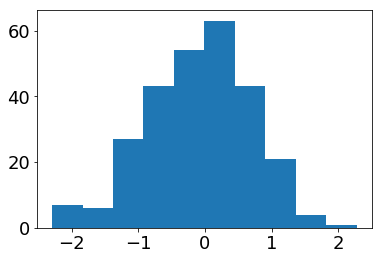

In [1758]:
plt.hist(unumpy.nominal_values(u_vx_rv))

(array([10., 32., 43., 60., 49., 40., 24.,  7.,  2.,  2.]),
 array([29.29978874, 29.6986708 , 30.09755286, 30.49643492, 30.89531698,
        31.29419904, 31.6930811 , 32.09196316, 32.49084522, 32.88972728,
        33.28860934]),
 <a list of 10 Patch objects>)

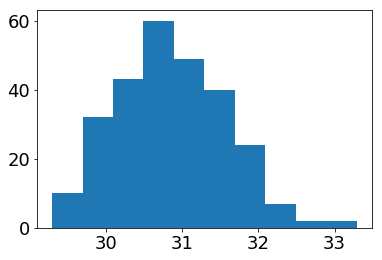

In [1759]:
plt.hist(unumpy.nominal_values(u_vy_rv))

In [44]:
#vperp = (SSMgrv['RV']-23.75)#*3.24078e-14*np.pi*1e7

#vra = ((mems['pmra']-cpmra))/(1e3)*(indiv_distances)
#vdec = ((mems['pmdec']-cpmdec))/(1e3)*(indiv_distances) * 3.086e+13 / (np.pi * 1e7)

#vra = ((mems['pmra']-cpmra))/(1e3)*(indiv_distances)

#pmra_sub = u_pmra - u_cpmra
#pmdec_sub = u_pmdec - u_cpmdec

#vra=(mems['pmra']-cpmra)/1e3/206265/np.pi/1e7 * indiv_distances * 3.086e+13
#vdec=(mems['pmdec']-cpmdec)/1e3/206265/np.pi/1e7 * indiv_distances * 3.086e+13

#vra=(mems['pmra']-cpmra)/1e3/206265/np.pi/1e7 * cdist * 3.086e+13
#vdec=(mems['pmdec']-cpmdec)/1e3/206265/np.pi/1e7 * cdist * 3.086e+13

#vz = vperp
#vy = vdec
#vx = vra

#mux = (mems['pmra']-cpmra) * np.cos((mems['ra'] - cra)*np.pi/180) - (mems['pmdec']-cpmdec) * np.sin(mems['dec']*np.pi/180) * np.sin((mems['ra']-cra)*np.pi/180)
#muy = (mems['pmra']-cpmra) * np.sin(cdec*np.pi/180) * np.sin((mems['ra']-cra)*np.pi/180) + (mems['pmdec']-cpmdec) * (np.cos(mems['dec']*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(mems['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((mems['ra']-cra)*np.pi/180))

mux = (ssmems['pmra']-cpmra) * np.cos((ssmems['ra'] - cra)*np.pi/180) - (ssmems['pmdec']-cpmdec) * np.sin(ssmems['dec']*np.pi/180) * np.sin((ssmems['ra']-cra)*np.pi/180)
muy = (ssmems['pmra']-cpmra) * np.sin(cdec*np.pi/180) * np.sin((ssmems['ra']-cra)*np.pi/180) + (ssmems['pmdec']-cpmdec) * (np.cos(ssmems['dec']*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(ssmems['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((ssmems['ra']-cra)*np.pi/180))


vx = 4.74*cdist/1e3 * mux
vy = 4.74*cdist/1e3 * muy

###mux_6791 = (likely6791['pmra']-cpmra_6791) * np.cos((likely6791['ra'] - cra_6791)*np.pi/180) - (likely6791['pmdec']-cpmdec_6791) * np.sin(likely6791['dec']*np.pi/180) * np.sin((likely6791['ra']-cra_6791)*np.pi/180)
###muy_6791 = (likely6791['pmra']-cpmra_6791) * np.sin(cdec_6791*np.pi/180) * np.sin((likely6791['ra']-cra_6791)*np.pi/180) + (likely6791['pmdec']-cpmdec_6791) * (np.cos(likely6791['dec']*np.pi/180)*np.cos(cdec_6791*np.pi/180) + np.sin(likely6791['dec']*np.pi/180) * np.sin(cdec_6791*np.pi/180) * np.cos((likely6791['ra']-cra_6791)*np.pi/180))

###vx_6791 = 4.74*cdist_6791/1e3 * mux_6791
###vy_6791 = 4.74*cdist_6791/1e3 * muy_6791

#vtan = np.sqrt(vdec**2 + vra**2)

(array([  9.,  28.,  98., 204., 322., 206.,  83.,  22.,   7.,   1.]),
 array([-10.77531293,  -8.36713508,  -5.95895723,  -3.55077938,
         -1.14260154,   1.26557631,   3.67375416,   6.08193201,
          8.49010985,  10.8982877 ,  13.30646555]),
 <a list of 10 Patch objects>)

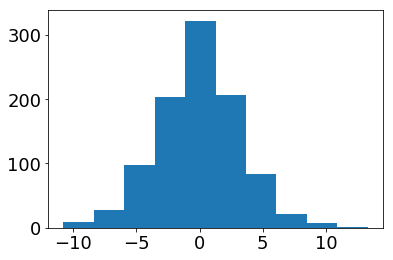

In [141]:
plt.hist(vx_6791)

(array([  2.,  10.,  27.,  90., 163., 119.,  84.,  32.,   6.,   2.]),
 array([-2.3804989 , -1.898072  , -1.4156451 , -0.9332182 , -0.45079129,
         0.03163561,  0.51406251,  0.99648941,  1.47891632,  1.96134322,
         2.44377012]),
 <a list of 10 Patch objects>)

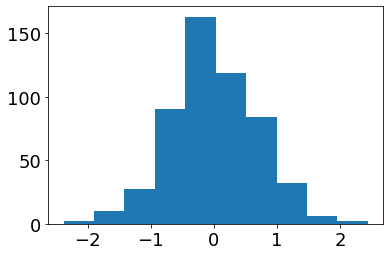

In [38]:
plt.hist(vy)

In [40]:


pred_mux = -6.1363e-5 * x * unumpy.nominal_values(crv) / (cdist/1e3) #mas/yr
pred_muy = -6.1363e-5 * y * unumpy.nominal_values(crv) / (cdist/1e3)

###pred_mux_6791 = -6.1363e-5 * x_6791 * -47.4 / (cdist_6791/1e3) #mas/yr
###pred_muy_6791 = -6.1363e-5 * y_6791 * -47.4 / (cdist_6791/1e3)

u_pred_mux = -6.1363e-5 * x * crv / (u_cdist/1e3) #mas/yr
u_pred_muy = -6.1363e-5 * y * crv / (u_cdist/1e3)

#x_sim = np.linspace(-150,150,1000)
#y_sim = np.linspace(-50,50,1000)

pred_vperp = 1.3790e-3 * (x_rv*cpmra + y_rv*cpmdec) * (cdist/1e3)

#pred_vperp_sim = 1.3790e-3 * (x_sim*cpmra + y_sim*cpmdec) * (cdist/1e3)

#pred_vx = pred_vx/1e3/206265/np.pi/1e7 * cdist * 3.086e+13
#pred_vy = pred_vy/1e3/206265/np.pi/1e7 * cdist * 3.086e+13

pred_vx = 4.74*cdist/1e3 * pred_mux
pred_vy = 4.74*cdist/1e3 * pred_muy

###pred_vx_6791 = 4.74*cdist_6791/1e3 * pred_mux_6791
###pred_vy_6791 = 4.74*cdist_6791/1e3 * pred_muy_6791

#pred_mux_sim = -6.1363e-5 * x_sim * unumpy.nominal_values(crv) / (cdist/1e3)
#pred_muy_sim = -6.1363e-5 * y_sim * unumpy.nominal_values(crv) / (cdist/1e3)

#pred_vx = 4.74*cdist/1e3 * pred_mux_sim
#pred_vy = 4.74*cdist/1e3 * pred_muy_sim

In [41]:
pred_vx_test = -6.1363e-5 * x * -47.4 / (4.2) #mas/yr
pred_vy_test = -6.1363e-5 * y * -47.4 / (4.2)
pred_vx_test = 4.74*4.2 * pred_vx_test
pred_vy_test = 4.74*4.2 * pred_vy_test

In [42]:
u_pred_vx = 4.74*u_cdist/1e3 * u_pred_mux
u_pred_vy = 4.74*u_cdist/1e3 * u_pred_muy

(array([  4.,  18.,  37.,  62., 102., 129., 101.,  48.,  22.,  12.]),
 array([-0.39786437, -0.32334017, -0.24881597, -0.17429177, -0.09976757,
        -0.02524337,  0.04928083,  0.12380503,  0.19832923,  0.27285343,
         0.34737763]),
 <a list of 10 Patch objects>)

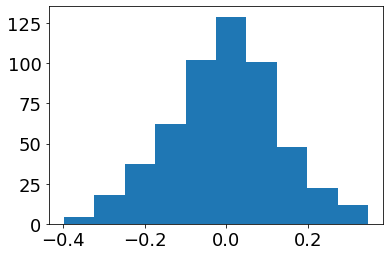

In [43]:
plt.hist(unumpy.nominal_values(u_pred_vy))

In [44]:
plt.plot(rr_rv)

NameError: name 'rr_rv' is not defined

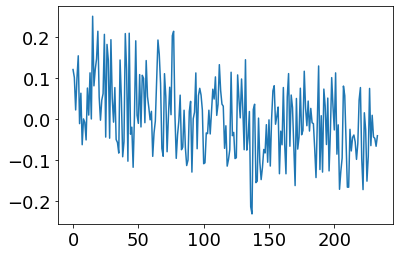

In [45]:
plt.plot(pred_vperp)

In [148]:
plt.scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'])

NameError: name 'pred_losTbl' is not defined

In [46]:
np.median(vperp-pred_vperp)

0.04512914282423554

In [47]:
np.median(pred_vperp)

-0.00234158976094955

(array([ 2., 10., 29., 43., 47., 42., 28., 21.,  5.,  7.]),
 array([-0.23138003, -0.18325412, -0.13512821, -0.0870023 , -0.03887638,
         0.00924953,  0.05737544,  0.10550135,  0.15362726,  0.20175317,
         0.24987908]),
 <a list of 10 Patch objects>)

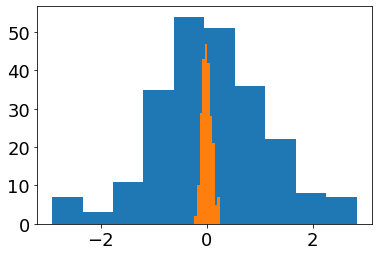

In [48]:
plt.hist(vperp)
plt.hist(pred_vperp)


(array([ 2., 10., 29., 43., 47., 42., 28., 21.,  5.,  7.]),
 array([-0.23138003, -0.18325412, -0.13512821, -0.0870023 , -0.03887638,
         0.00924953,  0.05737544,  0.10550135,  0.15362726,  0.20175317,
         0.24987908]),
 <a list of 10 Patch objects>)

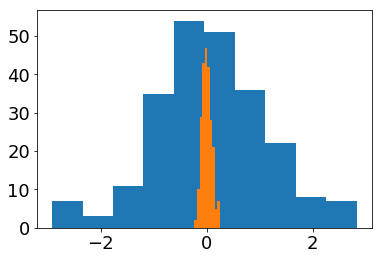

In [149]:
plt.hist(vperp)
plt.hist(pred_vperp)


In [49]:
pred_vperp

<Column name='dec' dtype='float64' length=234>
   0.12012786376784285
   0.10076176973427496
  0.021750847054695998
    0.0987374192533013
   0.15356742646536656
 -0.011573701384256691
   0.06245486812824639
  -0.06291263456447634
-4.645499320383254e-05
 -0.008726801962547623
  -0.05127929212341386
   0.07507926250491335
                   ...
  -0.17222942183402476
  0.014895616583094762
 -0.026581337713575806
  -0.15165691178571675
  -0.09146336482195895
   0.07411780297098199
  -0.06506254216676198
  0.008737364515839218
  -0.04396931021889216
 -0.047317676023368165
  -0.06670182567086855
  -0.04097030299150806

(array([  8.,  19.,  44.,  68.,  71., 125.,  90.,  55.,  37.,  18.]),
 array([-0.40976336, -0.33537644, -0.26098953, -0.18660261, -0.11221569,
        -0.03782878,  0.03655814,  0.11094505,  0.18533197,  0.25971888,
         0.3341058 ]),
 <a list of 10 Patch objects>)

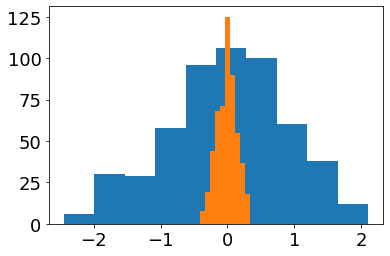

In [50]:
plt.hist(vx)
plt.hist(pred_vx)


(array([  4.,  18.,  37.,  62., 102., 129., 101.,  48.,  22.,  12.]),
 array([-0.39786437, -0.32334017, -0.24881597, -0.17429177, -0.09976757,
        -0.02524337,  0.04928083,  0.12380503,  0.19832923,  0.27285343,
         0.34737763]),
 <a list of 10 Patch objects>)

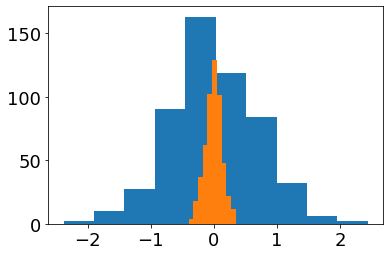

In [51]:
plt.hist(vy)
plt.hist(pred_vy)

(-4.732078604576667, 11.239788808740265)

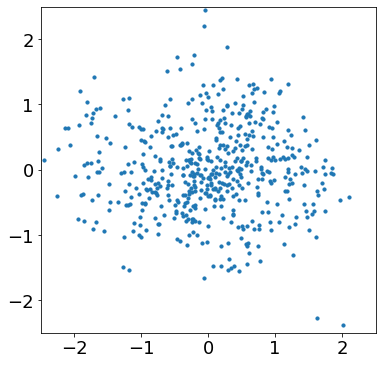

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(vx,vy,s=10)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
cpmra,cpmdec

(-4.732078604576667, 11.239788808740265)

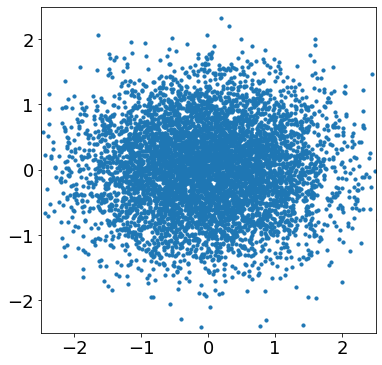

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(vx_sim,vy_sim,s=10)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
cpmra,cpmdec

In [54]:
#u_pmra = unumpy.uarray(mems['pmra'],mems['pmra_error'])
#u_pmdec = unumpy.uarray(mems['pmdec'],mems['pmdec_error'])

pmra_sub = u_pmra - u_cpmra
pmdec_sub = u_pmdec - u_cpmdec

###pmra_sub_6791 = u_pmra_6791 - u_cpmra_6791
###pmdec_sub_6791 = u_pmdec_6791 - u_cpmdec_6791

#corr_u_pmra = 

In [55]:
#u_vra=(u_pmra-cpmra)/1e3/206265/np.pi/1e7 * u_indiv_distances * 3.086e+13
#u_vdec=(u_pmdec-cpmdec)/1e3/206265/np.pi/1e7 * u_indiv_distances * 3.086e+13
#u_cdist = unumpy.uarray(408.9,0.3)
u_cdist = unumpy.uarray(408.9,0.1)
#u_cdist = unumpy.uarray(408.9,0.1)


#u_vra=(u_pmra-cpmra)/1e3/206265/np.pi/1e7 * u_cdist * 3.086e+13
#u_vdec=(u_pmdec-cpmdec)/1e3/206265/np.pi/1e7 * u_cdist * 3.086e+13

#u_pmx = u_pmra - cpmra
#u_pmy = u_pmdec - cpmdec

#u_vra = 4.74*u_cdist/1e3 * (u_pmra-cpmra)
#u_vdec = 4.74*u_cdist/1e3 * (u_pmdec-cpmdec)

#u_vx = u_vra
#u_vy = u_vdec

u_mux = (pmra_sub) * np.cos((ssmems['ra'] - cra)*np.pi/180) - (pmdec_sub) * np.sin(ssmems['dec']*np.pi/180) * np.sin((ssmems['ra']-cra)*np.pi/180)
u_muy = (pmra_sub) * np.sin(cdec*np.pi/180) * np.sin((ssmems['ra']-cra)*np.pi/180) + (pmdec_sub) * (np.cos(ssmems['dec']*np.pi/180)*np.cos(cdec*np.pi/180) + np.sin(ssmems['dec']*np.pi/180) * np.sin(cdec*np.pi/180) * np.cos((ssmems['ra']-cra)*np.pi/180))

u_vx = 4.74*u_cdist/1e3 * u_mux
u_vy = 4.74*u_cdist/1e3 * u_muy

mux = unumpy.nominal_values(u_mux)
muy = unumpy.nominal_values(u_muy)

###u_mux_6791 = (pmra_sub_6791) * np.cos((likely6791['ra'] - cra_6791)*np.pi/180) - (pmdec_sub_6791) * np.sin(likely6791['dec']*np.pi/180) * np.sin((likely6791['ra']-cra_6791)*np.pi/180)
###u_muy_6791 = (pmra_sub_6791) * np.sin(cdec_6791*np.pi/180) * np.sin((likely6791['ra']-cra_6791)*np.pi/180) + (pmdec_sub_6791) * (np.cos(likely6791['dec']*np.pi/180)*np.cos(cdec_6791*np.pi/180) + np.sin(likely6791['dec']*np.pi/180) * np.sin(cdec_6791*np.pi/180) * np.cos((likely6791['ra']-cra_6791)*np.pi/180))

###u_vx_6791 = 4.74*u_cdist_6791/1e3 * u_mux_6791
###u_vy_6791 = 4.74*u_cdist_6791/1e3 * u_muy_6791

###mux_6791 = unumpy.nominal_values(u_mux_6791)
###muy_6791 = unumpy.nominal_values(u_muy_6791)

In [56]:
np.median(np.abs(unumpy.std_devs(u_vx)/unumpy.nominal_values(u_vx)))

0.24257826300710833

In [57]:
np.median(np.abs(unumpy.std_devs(u_vy)/unumpy.nominal_values(u_vy)))

0.2874682048217924

In [545]:
17/409

0.04156479217603912

In [530]:
np.mean(unumpy.std_devs(u_vx)/unumpy.nominal_values(u_vx))

0.33318222619090554

In [531]:
np.mean(unumpy.std_devs(u_vy)/unumpy.nominal_values(u_vy))

0.4994794080062884

In [379]:
np.mean(1e3/(mems['parallax']+0.030)), np.std(1e3/(mems['parallax']+0.030))/np.sqrt(len(mems))

(408.9168962893438, 0.29210660834084384)

In [380]:
np.median(mems['pmra']),np.median(mems['pmdec'])

(-4.676531175563038, 11.210659039863184)

In [381]:
cpmra,cpmdec

(-4.676531175563038, 11.210659039863184)

In [58]:
u_vperp

<Column name='RV' dtype='object' length=234>
 1.49+/-0.26
 1.18+/-0.26
 0.90+/-0.11
-0.77+/-0.31
-0.54+/-0.26
   0.8+/-1.6
-0.51+/-0.28
   2.1+/-0.4
-0.56+/-0.31
-0.26+/-0.26
 0.91+/-0.26
 0.31+/-0.27
         ...
 1.64+/-0.26
   0.0+/-0.4
 0.19+/-0.27
-0.21+/-0.32
-0.27+/-0.26
      -1+/-6
 1.38+/-0.26
  -0.9+/-0.5
-0.51+/-0.28
 0.80+/-0.28
 0.18+/-0.28
-0.57+/-0.29

In [1022]:
plt.hist(unumpy.nominal_values(u_vdec))

NameError: name 'u_vdec' is not defined

In [281]:
np.median(unumpy.std_devs(u_vra))

NameError: name 'u_vra' is not defined

In [3973]:
np.std(unumpy.nominal_values(u_vra))

0.9126885539850357

In [59]:
plt.scatter(x_6791,mux_6791)

plt.plot(x_6791,pred_mux_6791,color='red')

NameError: name 'x_6791' is not defined

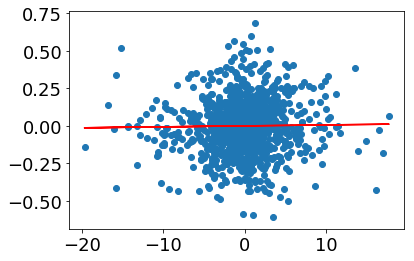

In [158]:
plt.scatter(y_6791,muy_6791)

plt.plot(y_6791,pred_muy_6791,color='red')

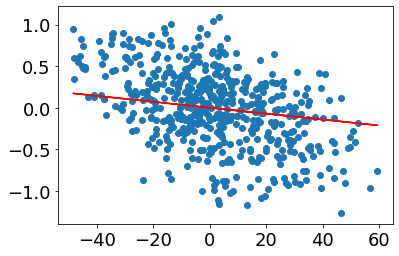

In [60]:
plt.scatter(x,mux)

plt.plot(x,pred_mux,color='red')

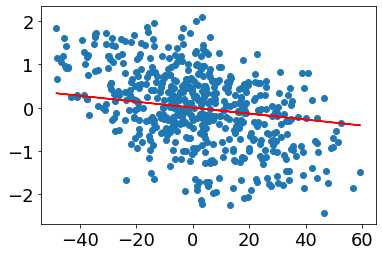

In [61]:
plt.scatter(x,vx)

plt.plot(x,pred_vx,color='red')

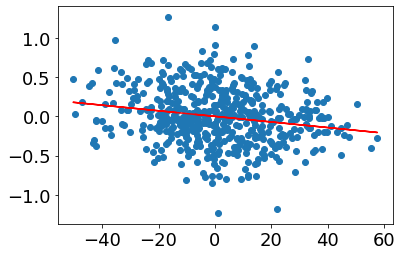

In [62]:
plt.scatter(y,muy)
plt.plot(y,pred_muy,color='red')

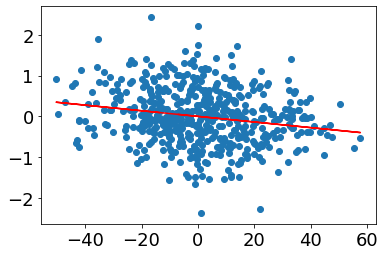

In [63]:
plt.scatter(y,vy)
plt.plot(y,pred_vy,color='red')

In [1784]:
np.std(vperp)

1.0851489267857273

In [2309]:
#mas/yr / 1e3 as/yr / pie7 as/s * dpc pc/s * km/pc km/s

In [2310]:
#(SSMgrv['pmdec']-cpmdec)/1e3/206265/np.pi/1e7 * indiv_distances * 3.086e+13

(array([ 18.,  37.,  55.,  90., 125.,  71.,  68.,  44.,  19.,   8.]),
 array([-48.36547687, -37.59715541, -26.82883394, -16.06051248,
         -5.29219102,   5.47613044,  16.24445191,  27.01277337,
         37.78109483,  48.54941629,  59.31773776]),
 <a list of 10 Patch objects>)

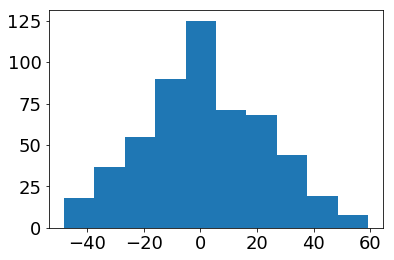

In [162]:
plt.hist(x)

(array([ 18.,  37.,  55.,  90., 125.,  71.,  68.,  44.,  19.,   8.]),
 array([-48.36547687, -37.59715541, -26.82883394, -16.06051248,
         -5.29219102,   5.47613044,  16.24445191,  27.01277337,
         37.78109483,  48.54941629,  59.31773776]),
 <a list of 10 Patch objects>)

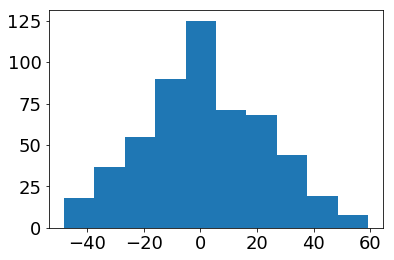

In [163]:
plt.hist(x)

In [384]:
vra[0]/(np.pi*1e7)/3.24078e-11

-969.0026770267094

0.7476995147088473

In [47]:
SC = SkyCoord('19:20:51.3 +37:46:26',unit=(u.hourangle,u.deg))
SC

<SkyCoord (ICRS): (ra, dec) in deg
    (290.21375, 37.77388889)>

In [48]:
allstars_6791['parallax'][3]

0.22664383012143874

In [57]:
Gaia.ROW_LIMIT = -1

In [58]:
qry = Gaia.cone_search_async(SC,radius=20*u.arcmin)

INFO: Query finished. [astroquery.utils.tap.core]


In [59]:
allstars_6791 = qry.get_data()

In [60]:
allstars_6791 = allstars_6791.filled(fill_value=-999)

goodmeas = (allstars_6791['parallax'] != -999) & (allstars_6791['pmra'] != -999) & (allstars_6791['pmdec'] != -999) & (allstars_6791['bp_rp'] != -999)
goodunc = (allstars_6791[goodmeas]['pmra_error'] < 4/(4.74*d/1e3)) & (allstars_6791[goodmeas]['pmdec_error'] < 4/(4.74*d/1e3))



In [61]:
allstars_6791 = allstars_6791[goodmeas][goodunc]

In [62]:
allstars_6791

<Table length=4808>
    solution_id             designation          ...          dist        
                                                 ...                      
       int64                   object            ...        float64       
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 2051292980625570816 ... 0.0012699257207322095
1635721458409799680 Gaia DR2 2051292980625567616 ... 0.0025106754527608258
1635721458409799680 Gaia DR2 2051292980625569792 ... 0.0027892674357626918
1635721458409799680 Gaia DR2 2051292980625567744 ...  0.002994037784695329
1635721458409799680 Gaia DR2 2051292980625565824 ...  0.003770325662569911
1635721458409799680 Gaia DR2 2051292980625574144 ...  0.004041964304074408
1635721458409799680 Gaia DR2 2051292976340888448 ...  0.004144189912996001
1635721458409799680 Gaia DR2 2051293083698326016 ...  0.004913755473637728
1635721458409799680 Gaia DR2 2051293083704790400 ...  0.005471388480397732
                ...                          ... ...                   ...
1635721458409799680 Gaia DR2 2052611501227330432 ...   0.33308259240568494
1635721458409799680 Gaia DR2 2052592019255308672 ...    0.3331340851416965
1635721458409799680 Gaia DR2 2052606793942884224 ...   0.33315483458968936
1635721458409799680 Gaia DR2 2052604182602736128 ...    0.3331681685351113
1635721458409799680 Gaia DR2 2052606793942883968 ...   0.33321118205693795
1635721458409799680 Gaia DR2 2052610470434903552 ...    0.3332220698159378
1635721458409799680 Gaia DR2 2051072700344592256 ...   0.33326431945014445
1635721458409799680 Gaia DR2 2052802060333860608 ...   0.33326879258496556
1635721458409799680 Gaia DR2 2051071497753794816 ...   0.33330954909878524
1635721458409799680 Gaia DR2 2051086581679539456 ...    0.3333142031799867

In [63]:
mu = 13.29
d = 10**(mu/5+1)
meanpar = 1/d * 1e3 #mas

meanpmra = -0.42
meanpmdec = -2.27

sigpar = 0
sigpmra = 1/(4.74*d/1e3)
sigpmdec = 1/(4.74*d/1e3)

In [64]:
p_par = (1/np.sqrt(2*np.pi*allstars_6791['parallax_error']**2)) * np.exp(-(allstars_6791['parallax']-meanpar)**2/(2*(allstars_6791['parallax_error']**2)))
p_pmra = (1/np.sqrt(2*np.pi*(allstars_6791['pmra_error']**2+sigpmra**2))) * np.exp(-(allstars_6791['pmra']-meanpmra)**2/(2*(allstars_6791['pmra_error']**2+sigpmra**2)))
p_pmdec = (1/np.sqrt(2*np.pi*(allstars_6791['pmdec_error']**2+sigpmdec**2))) * np.exp(-(allstars_6791['pmdec']-meanpmdec)**2/(2*(allstars_6791['pmdec_error']**2+sigpmdec**2)))



In [65]:
memindx = p_par*p_pmra*p_pmdec > 0.01
allstars_6791 = allstars_6791[memindx]

In [66]:
np.sum(memindx)

995

(array([4.74e+03, 3.40e+01, 1.30e+01, 1.00e+01, 2.00e+00, 2.00e+00,
        2.00e+00, 3.00e+00, 1.00e+00, 1.00e+00]),
 array([  0.        ,  73.11498447, 146.22996894, 219.34495341,
        292.45993788, 365.57492235, 438.68990682, 511.8048913 ,
        584.91987577, 658.03486024, 731.14984471]),
 <a list of 10 Patch objects>)

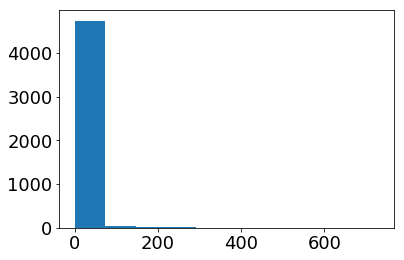

In [67]:
plt.hist(p_par*p_pmra*p_pmdec)

In [68]:
lwnse = allstars_6791['astrometric_excess_noise_sig'] < 3

(array([ 57.,  41.,  28.,  40.,  44.,  59., 119., 192., 221., 194.]),
 array([0.68220906, 1.01839058, 1.35457209, 1.69075361, 2.02693513,
        2.36311664, 2.69929816, 3.03547967, 3.37166119, 3.70784271,
        4.04402422]),
 <a list of 10 Patch objects>)

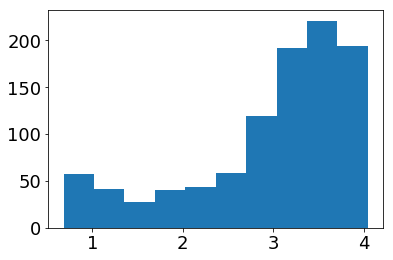

In [69]:
plt.hist(allstars_6791['pmdec_error']*4.74*4.6)

In [70]:
likely6791 = allstars_6791[lwnse]

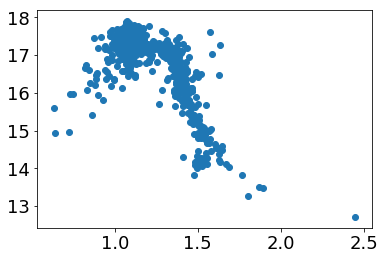

In [71]:
plt.scatter(likely6791['bp_rp'],likely6791['phot_g_mean_mag'])

In [65]:
#CIRCULAR POLAR:
rr = np.sqrt(x**2+y**2)
#tt = np.arctan2(y,x*np.cos(cdec*np.pi/180))
#tt = np.arctan2(y,x)
tt = np.arctan2(x,y)

rr_rv = np.sqrt(x_rv**2+y_rv**2)
#tt_rv = np.arctan2(y_rv,x_rv)
tt_rv = np.arctan2(x_rv,y_rv)


rr_sim = np.sqrt(x_sim**2+y_sim**2)
#tt_sim = np.arctan2(y_sim,x_sim)
tt_sim = np.arctan2(x_sim,y_sim)


###rr_6791 = np.sqrt(x_6791**2+y_6791**2)
#tt_6791 = np.arctan2(y_6791,x_6791)
###tt_6791 = np.arctan2(x_6791,y_6791)

(array([40., 70., 86., 72., 78., 61., 63., 35., 17., 13.]),
 array([ 0.36426224,  6.36674524, 12.36922823, 18.37171123, 24.37419422,
        30.37667722, 36.37916021, 42.38164321, 48.3841262 , 54.3866092 ,
        60.38909219]),
 <a list of 10 Patch objects>)

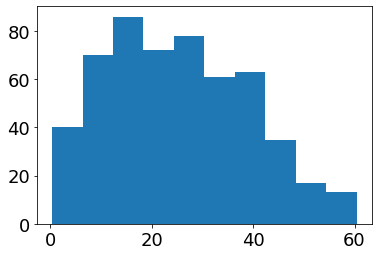

In [66]:
#plt.hist(rr_sim)
plt.hist(rr)

(array([28., 31., 27., 29., 15., 18., 19., 29., 16., 22.]),
 array([-3.09679559, -2.47606502, -1.85533446, -1.23460389, -0.61387332,
         0.00685724,  0.62758781,  1.24831837,  1.86904894,  2.4897795 ,
         3.11051007]),
 <a list of 10 Patch objects>)

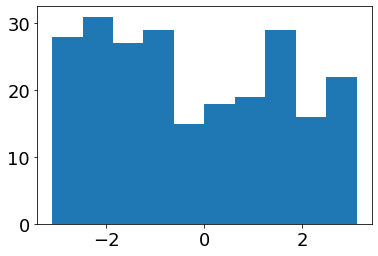

In [67]:
plt.hist(tt_rv)

Text(0, 0.5, 'arcmin_dec')

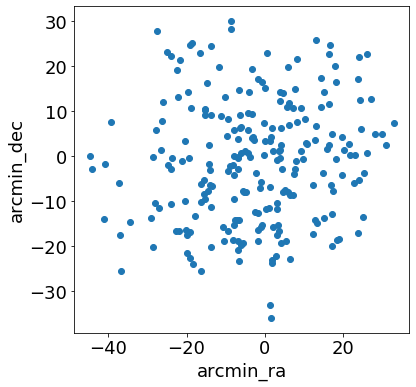

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(x_rv,y_rv)
plt.xlabel('arcmin_ra')
plt.ylabel('arcmin_dec')

NameError: name 'tt_6791' is not defined

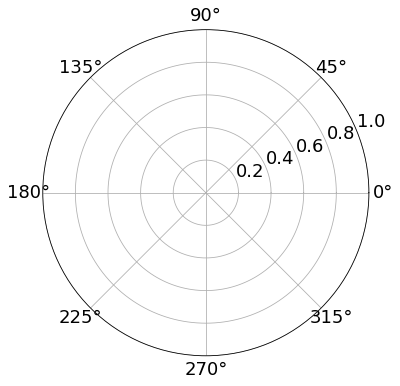

In [69]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='polar')
#c = ax.scatter(tt_rv, rr_rv, cmap='hsv', alpha=0.75)
c = ax.scatter(tt_6791, rr_6791, cmap='hsv', alpha=0.75)

#c2 = ax.scatter(tt, rr, s=10,cmap='hsv', alpha=0.75)

In [3996]:
x_rv[152],y_rv[152],tt_rv[152]*180/np.pi,  #(2*np.pi - tt_rv[152])*180/np.pi

(-0.3098052823185071, 0.3314197301602917, 114.51500463639174)

(array([ 18.,  37.,  55.,  90., 125.,  71.,  68.,  44.,  19.,   8.]),
 array([-48.36547687, -37.59715541, -26.82883394, -16.06051248,
         -5.29219102,   5.47613044,  16.24445191,  27.01277337,
         37.78109483,  48.54941629,  59.31773776]),
 <a list of 10 Patch objects>)

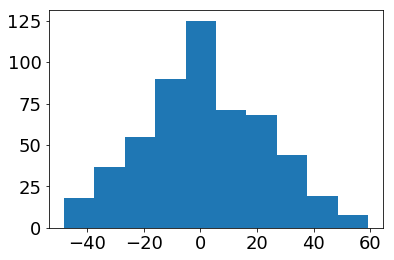

In [1072]:
plt.hist(x)

In [3346]:
np.argmin(rr_rv)

152

(array([14., 28., 31., 43., 38., 30., 31.,  8.,  5.,  6.]),
 array([ 0.36426224,  4.80280011,  9.24133798, 13.67987585, 18.11841372,
        22.55695159, 26.99548947, 31.43402734, 35.87256521, 40.31110308,
        44.74964095]),
 <a list of 10 Patch objects>)

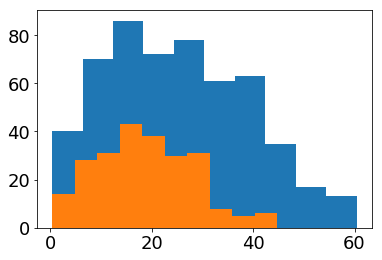

In [170]:
plt.hist(rr)
plt.hist(rr_rv)

(array([28., 31., 27., 29., 15., 18., 19., 29., 16., 22.]),
 array([-3.09679559, -2.47606502, -1.85533446, -1.23460389, -0.61387332,
         0.00685724,  0.62758781,  1.24831837,  1.86904894,  2.4897795 ,
         3.11051007]),
 <a list of 10 Patch objects>)

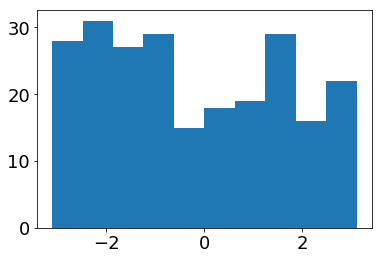

In [171]:
plt.hist(tt_rv)

In [70]:
vvrr = np.cos(tt) * vx + np.sin(tt) * vy
vvtt = -np.sin(tt) * vx + np.cos(tt) * vy

pred_vr = np.cos(tt) * pred_vx + np.sin(tt) * pred_vy
pred_vt = -np.sin(tt) * pred_vx + np.cos(tt) * pred_vy

u_vr_mu = np.cos(tt) * (u_pmra-cpmra) + np.sin(tt) * (u_pmdec-cpmdec)
u_vt_mu = -np.sin(tt) * (u_pmra-cpmra) + np.cos(tt) * (u_pmdec-cpmdec)

u_vr = np.cos(tt) * u_vx + np.sin(tt) * u_vy
u_vt = -np.sin(tt) * u_vx + np.cos(tt) * u_vy

###mur_6791 = np.cos(tt_6791) * mux_6791 + np.sin(tt_6791) * muy_6791
###mut_6791 = -np.sin(tt_6791) * mux_6791 + np.cos(tt_6791) * muy_6791

(array([  6.,  42., 124., 181., 216., 156.,  56.,  11.,   1.,   1.]),
 array([-2.69373288, -2.13021929, -1.5667057 , -1.00319212, -0.43967853,
         0.12383506,  0.68734864,  1.25086223,  1.81437582,  2.37788941,
         2.94140299]),
 <a list of 10 Patch objects>)

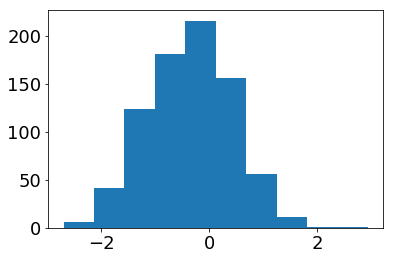

In [287]:

plt.hist(vvrr)

In [768]:
pred_vr_test = (x*pred_vx_test + y*pred_vy_test)/rr
pred_vt_test = (-y*pred_vx_test + x*pred_vy_test)/rr


(0, 20)

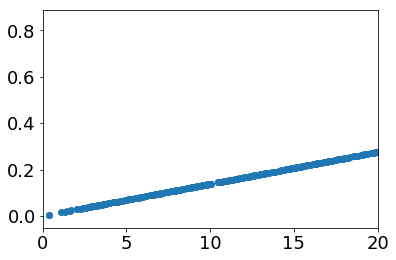

In [770]:
plt.scatter(rr,pred_vr_test)
plt.xlim(0,20)

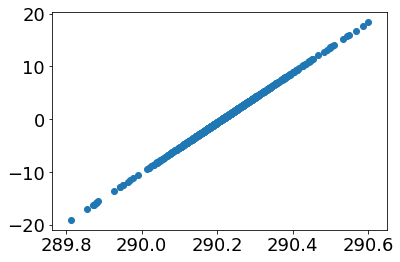

In [1144]:
plt.scatter(likely6791['ra'],x_6791)

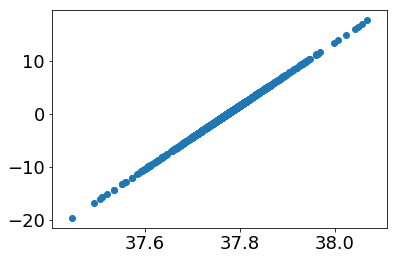

In [1145]:
plt.scatter(likely6791['dec'],y_6791)

In [1146]:
# X increases with increasing RA (eastward)
# Y increases with increasing dec (northward)

In [73]:
###for i in range(len(tt_6791)):
###    if tt_6791[i] < 0:
###        tt_6791[i] += 2*np.pi

for i in range(len(tt)):
    if tt[i] < 0:
        tt[i] += 2*np.pi
        
for i in range(len(tt_rv)):
    if tt_rv[i] < 0:
        tt_rv[i] += 2*np.pi

Text(0, 0.5, 'North ----->')

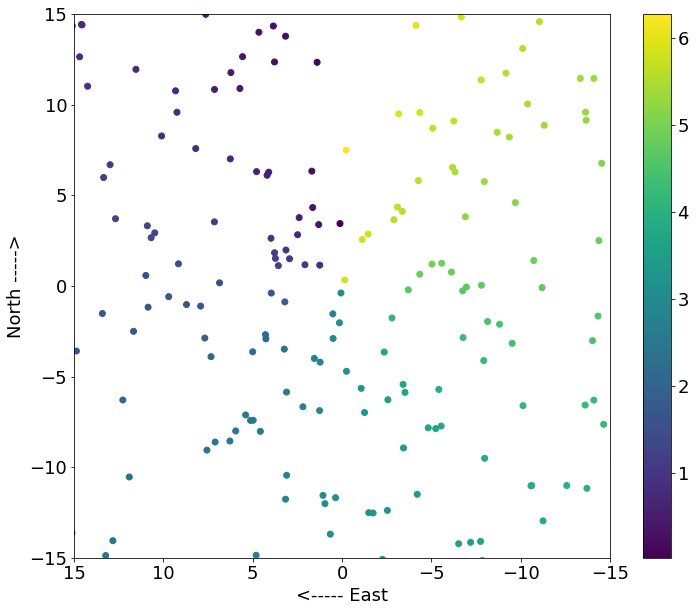

In [74]:

plt.figure(figsize=(12,10))
plt.scatter(x,y,c=tt)
#plt.scatter(x_6791,y_6791,c=tt_6791)
plt.colorbar()
plt.ylim(-15,15)
plt.xlim(15,-15)
plt.xlabel('<----- East')
plt.ylabel('North ----->')

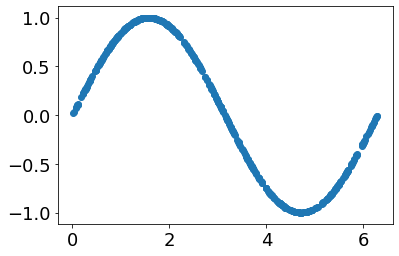

In [75]:
plt.scatter(tt,np.sin(tt))

In [76]:
plt.scatter(tt_6791,np.sin(tt_6791))

NameError: name 'tt_6791' is not defined

In [77]:
u_vr_mu = (x*u_mux + y*u_muy)/rr
u_vr = (x*u_vx + y*u_vy)/rr

u_vt_mu = (-y*u_mux + x*u_muy)/rr
u_vt = (-y*u_vx + x*u_vy)/rr

u_pred_mur = (x*u_pred_mux + y*u_pred_muy)/rr
u_pred_vr = (x*u_pred_vx + y*u_pred_vy)/rr

pred_mur = unumpy.nominal_values(u_pred_mur)

u_pred_mut = (-y*u_pred_mux + x*u_pred_muy)/rr
u_pred_vt = (-y*u_pred_vx + x*u_pred_vy)/rr

pred_mut = unumpy.nominal_values(u_pred_mut)

#mur_sim = (x_sim*mux_sim + y_sim*muy_sim)/rr_sim
#mut_sim = (-y_sim*mux_sim + x_sim*muy_sim)/rr_sim


###pred_mur_6791 = (x_6791*pred_mux_6791 + y_6791*pred_muy_6791)/rr_6791
###pred_vr_6791 = (x_6791*pred_vx_6791 + y_6791*pred_vy_6791)/rr_6791

###mur_6791 = (x_6791*mux_6791 + y_6791*muy_6791)/rr_6791
###mut_6791 = (-y_6791*mux_6791 + x_6791*muy_6791)/rr_6791

#mut_6791 = (y_6791*mux_6791 - x_6791*muy_6791)/rr_6791 #WRONG, TEST

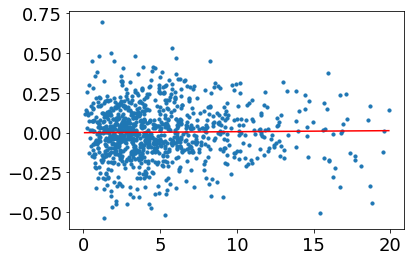

In [208]:
plt.scatter(rr_6791,mur_6791,s=10)
plt.plot(rr_6791,pred_mur_6791,color='red')

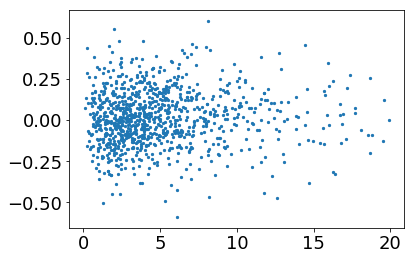

In [209]:
plt.scatter(rr_6791,mut_6791,s=5)
#plt.plot(rr_6791,pred_mur_6791,color='red')

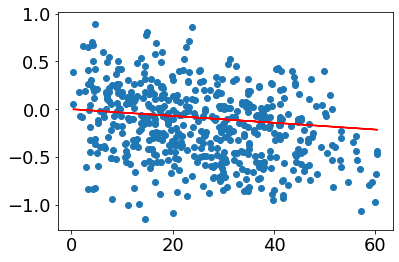

In [78]:
plt.scatter(rr,unumpy.nominal_values(u_vr_mu))
plt.plot(rr,unumpy.nominal_values(u_pred_mur),color='red')

(-3, 63)

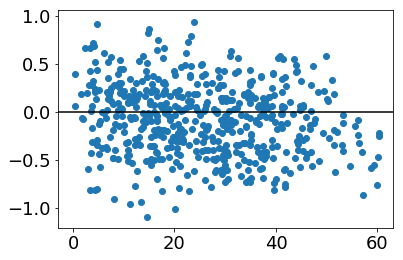

In [211]:
plt.scatter(rr,unumpy.nominal_values(u_vr_mu)-unumpy.nominal_values(u_pred_mur))
plt.plot([-5,70],[0,0],color='black')
plt.xlim(-3,63)

In [212]:
np.median(u_pred_mur)

-0.08676524531700225+/-2.1219184791420526e-05

In [1049]:
np.median(u_vr_mu)

-0.15423832642341395+/-0.04246908872531698

In [1050]:
np.mean(u_vr_mu)

-0.17415657189187794+/-0.0040488051287830085

In [292]:
np.min(pred_vr)

-0.4178628345153021

In [293]:
np.max(pred_vperp)

0.24877452213292459

(array([  5.,  25., 108., 191., 214., 169.,  64.,  16.,   1.,   1.]),
 array([-2.83103723, -2.25572465, -1.68041207, -1.10509948, -0.5297869 ,
         0.04552568,  0.62083826,  1.19615084,  1.77146342,  2.346776  ,
         2.92208858]),
 <a list of 10 Patch objects>)

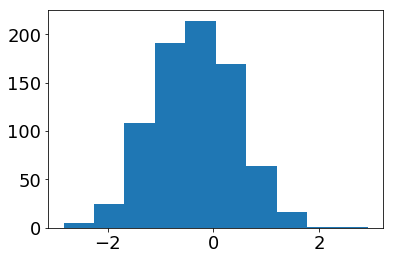

In [396]:
plt.hist(vvrr)

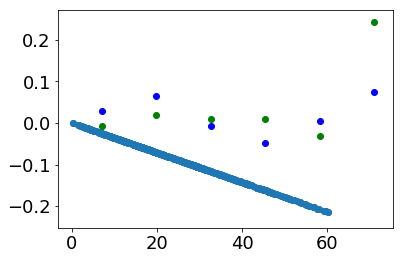

In [199]:
#plt.scatter(rr,vvrr)
plt.scatter(rr,pred_mur)
plt.scatter(centers_sim,medsr_sim,color='green')
plt.scatter(centers_sim,medst_sim,color='blue')
#plt.scatter(centers,medsr_mcmc,color='red')
#plt.ylim(-1.1,0.1)

(array([121.,   0., 226.,   0., 191.,   0.,  88.,   0.,  20.,   4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

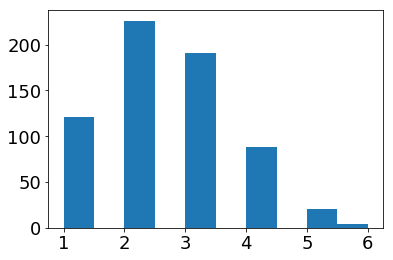

In [201]:
plt.hist(number_sim)

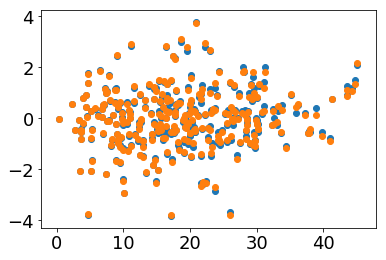

In [297]:
plt.scatter(rr_rv,vperp)
plt.scatter(rr_rv,vperp-pred_vperp)


(-2, 2)

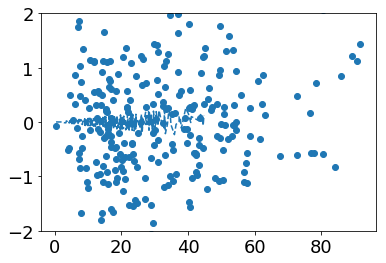

In [4014]:
plt.scatter(rr_rv,vperp)
#plt.plot(rr_rv,pred_vperp,linestyle='--')
plt.plot(pred_losTbl['r'],pred_losTbl['pred_vperp'],linestyle='--')
plt.ylim(-2,2)

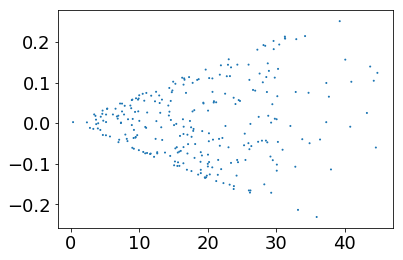

In [4015]:
#plt.plot(rr_sim,pred_vperp_sim,linewidth=.01)
#plt.plot(rr_rv,pred_vperp)
plt.scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],linestyle='--',s=1)


(array([ 2., 10., 29., 43., 47., 42., 28., 21.,  5.,  7.]),
 array([-0.23138003, -0.18325412, -0.13512821, -0.0870023 , -0.03887638,
         0.00924953,  0.05737544,  0.10550135,  0.15362726,  0.20175317,
         0.24987908]),
 <a list of 10 Patch objects>)

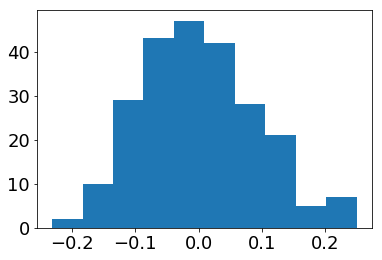

In [284]:
plt.hist(pred_vperp)

(array([ 11.,  58., 108., 172., 197., 147.,  75.,  22.,   3.,   1.]),
 array([-1.31268251, -1.04652401, -0.78036551, -0.51420701, -0.24804851,
         0.01810999,  0.28426849,  0.55042699,  0.81658549,  1.08274399,
         1.34890249]),
 <a list of 10 Patch objects>)

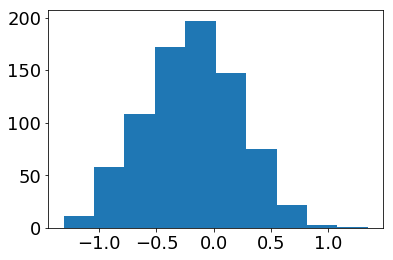

In [4017]:
plt.hist(unumpy.nominal_values(u_vr_mu))

In [4018]:
np.polyfit(rr,vvrr/np.median(vvrr),deg=1)

array([0.02547053, 0.075699  ])

In [196]:
bnz = 6

In [197]:
medsr,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr),bins=bnz,statistic='mean')
stdvsr,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr),bins=bnz,statistic='std')

medsr_mu,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr_mu),bins=bnz,statistic='mean')
stdvsr_mu,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr_mu),bins=bnz,statistic='std')

medsr_sim,edges_sim,number_sim = binned_statistic(rr_sim,mur_sim,bins=bnz,statistic='mean')
stdvsr_sim,edges_sim,number_sim = binned_statistic(rr_sim,mur_sim,bins=bnz,statistic='std')


width = (edges[1] - edges[0])
centers = edges[1:] - width/2

width_sim = (edges_sim[1] - edges_sim[0])
centers_sim = edges_sim[1:] - width_sim/2

medsr_mu

array([ 0.02334448, -0.12825603, -0.21648029, -0.24330102, -0.1941482 ,
       -0.49158062])

In [198]:
medst,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt),bins=bnz,statistic='mean')
stdvst,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt),bins=bnz,statistic='std')

medst_mu,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt_mu),bins=bnz,statistic='mean')
stdvst_mu,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt_mu),bins=bnz,statistic='std')

medst_sim,edges_sim,number_sim = binned_statistic(rr_sim,mut_sim,bins=bnz,statistic='mean')
stdvst_sim,edges_sim,number_sim = binned_statistic(rr_sim,mut_sim,bins=bnz,statistic='std')


width2 = (edges2[1] - edges2[0])
centers2 = edges2[1:] - width2/2



In [79]:
vperp = vperp - pred_vperp

In [80]:
u_vperp = u_vperp - pred_vperp

In [1060]:
np.std(unumpy.nominal_values(u_vr)), np.mean(unumpy.std_devs(u_vr))

(0.7397917994905079, 0.16501503545103524)

In [1061]:
np.std(unumpy.nominal_values(u_vt)), np.mean(unumpy.std_devs(u_vt))

(0.78863700675938, 0.16464163242120106)

In [1062]:
np.mean(u_vt)

0.028293972929782255+/-0.00783849306848386

In [1063]:
np.mean(u_vr)

-0.3375478294488313+/-0.007847771599602132

In [4037]:
np.std(unumpy.nominal_values(u_vr))/np.sqrt(len(u_vr))

0.028273173302450497

In [4038]:
np.std(unumpy.nominal_values(u_vt))/np.sqrt(len(u_vt))

0.028012366816076203

In [4039]:
np.std(unumpy.nominal_values(u_vperp))/np.sqrt(len(u_vperp)) #######################

0.07089899357203584

In [4040]:
np.mean(u_vperp) ############################

-0.060815133774487704+/-0.05143566223298977

In [4041]:
################################

In [1064]:
np.sqrt(np.std(unumpy.nominal_values(u_vperp))**2 - np.mean(unumpy.std_devs(u_vperp))**2), np.mean(unumpy.std_devs(u_vperp))

(1.0900632699816954, 0.42278090168466265)

In [1065]:
np.sqrt(np.std(unumpy.nominal_values(u_vr))**2 - np.mean(unumpy.std_devs(u_vr))**2),np.mean(unumpy.std_devs(u_vr))

(0.7211532047134627, 0.16501503545103524)

In [1066]:
np.sqrt(np.std(unumpy.nominal_values(u_vt))**2 - np.mean(unumpy.std_devs(u_vt))**2),np.mean(unumpy.std_devs(u_vt))

(0.7712596588076395, 0.16464163242120106)

In [213]:
pred_rtTbl_6791 = Table(data=[rr_6791,pred_mur_6791],names=['r','pred_mur'])
pred_rtTbl_6791.sort('r')

In [81]:
pred_rtTbl = Table(data=[rr,pred_mur,pred_mut],names=['r','pred_mur','pred_mut'])
pred_rtTbl.sort('r')

In [82]:
pred_losTbl = Table(data=[rr_rv,pred_vperp],names=['r','pred_vperp'])
#pred_losTbl = Table(data=[rr_sim,pred_vperp_sim],names=['r','pred_vperp'])
pred_losTbl.sort('r')

In [83]:
rtTbl = Table(data=[rr,unumpy.nominal_values(u_vr_mu),unumpy.nominal_values(u_vt_mu)],names=['r','mur','mut'])
rtTbl.sort('r')

In [84]:
rtTbl_sim = Table(data=[rr_sim,mur_sim,mut_sim],names=['r','mur','mut'])
rtTbl_sim.sort('r')

NameError: name 'mur_sim' is not defined

In [218]:
rtTbl_6791 = Table(data=[rr_6791,mur_6791,mut_6791],names=['r','mur','mut'])
rtTbl_6791.sort('r')

In [85]:
rtTbl_mu = Table(data=[rr,unumpy.nominal_values(u_vr_mu),unumpy.nominal_values(u_vt_mu)],names=['r','vr','vt'])
rtTbl_mu.sort('r')

In [86]:
losTbl = Table(data=[rr_rv,unumpy.nominal_values(u_vperp)],names=['r','vperp'])
losTbl.sort('r')

In [87]:
edgs_sim += [np.min(rtTbl_sim['r'])-0.01]

n_stars=0
for i in range(len(rtTbl_sim)-1):
    cur_r = rtTbl_sim[i]['r']
    next_r = rtTbl_sim[i+1]['r']
    dummy_r += [cur_r]
    n_stars += 1
    delta_r = cur_r - edgs_sim[-1]
    if (delta_r) >= 2.5 and (n_stars >= 10000):
        edgs_sim += [(cur_r+next_r)/2]
        n_stars_bins_sim += [n_stars]
        n_stars=0
edgs_sim += [rtTbl[-1]['r']+0.01] 
n_stars_bins_sim += [n_stars]

NameError: name 'edgs_sim' is not defined

In [88]:
edgs_6791 = []

edgs_6791 += [np.min(rtTbl_6791['r'])-0.01]
n_stars_bins_6791 = []


n_stars=0
for i in range(len(rtTbl_6791)-1):
    cur_r = rtTbl_6791[i]['r']
    next_r = rtTbl_6791[i+1]['r']
    dummy_r += [cur_r]
    n_stars += 1
    delta_r = cur_r - edgs_6791[-1]
    if (delta_r) >= .75 and (n_stars >= 110):
        edgs_6791 += [(cur_r+next_r)/2]
        n_stars_bins_6791 += [n_stars]
        n_stars=0
edgs_6791 += [rtTbl_6791[-1]['r']+0.01] 
n_stars_bins_6791 += [n_stars]
        
edgs_rv = []
edgs_rv += [np.min(losTbl['r'])-0.01]
n_stars_rv = 0
n_stars_bins_rv = []
dummy_r_rv = []

NameError: name 'rtTbl_6791' is not defined

In [286]:
edgs = []
edgs_sim = []

edgs += [np.min(rtTbl['r'])-0.01]


n_stars = 0
n_stars_bins = []
n_stars_bins_sim = []

dummy_r = []

for i in range(len(rtTbl)-1):
    cur_r = rtTbl[i]['r']
    next_r = rtTbl[i+1]['r']
    dummy_r += [cur_r]
    n_stars += 1
    delta_r = cur_r - edgs[-1]
    if (delta_r) >= 2.5 and (n_stars >= 80):
        edgs += [(cur_r+next_r)/2]
        n_stars_bins += [n_stars]
        n_stars=0
edgs += [rtTbl[-1]['r']+0.01] 
n_stars_bins += [n_stars]
        
edgs_rv = []
edgs_rv += [np.min(losTbl['r'])-0.01]
n_stars_rv = 0
n_stars_bins_rv = []
dummy_r_rv = []




for i in range(len(losTbl)-1):
    cur_r = losTbl[i]['r']
    next_r = losTbl[i+1]['r']
    dummy_r += [cur_r]
    n_stars_rv += 1
    delta_r = cur_r - edgs_rv[-1]
    if (delta_r) >= 2.5 and (n_stars_rv >= 100):
        edgs_rv += [(cur_r+next_r)/2]
        n_stars_bins_rv += [n_stars_rv]
        n_stars_rv=0
edgs_rv += [losTbl[-1]['r']+0.01]
n_stars_bins_rv += [n_stars_rv] 

edgs = np.array(edgs)

edgs_rv = np.array(edgs_rv)

#edgs[0] -= 0.001
#edgs_rv[0] -= 0.001

In [281]:
edgs_rv

array([ 0.35426224, 16.49279421, 29.35319894, 44.75964095])

In [92]:
np.max(rr_rv)

44.749640947370644

In [93]:
n_stars_bins,edgs

([80, 80, 80, 80, 80, 80, 54],
 array([ 0.35426224,  9.65135017, 16.18198069, 21.74875271, 29.34032208,
        35.12475869, 44.29798095, 60.39909219]))

In [226]:
n_stars_bins_6791,edgs_6791

([110, 110, 122, 113, 110, 110, 110, 110, 84],
 [0.06660583269394284,
  1.447864240445282,
  2.2249752792034045,
  2.9884303700025203,
  3.7647310059250234,
  4.646573009860118,
  5.7859644722099155,
  7.3914278005121155,
  10.856726721813484,
  19.915379661105046])

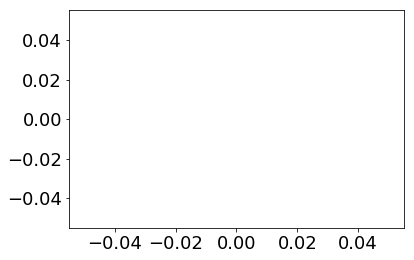

In [227]:
#plt.plot(edgs[:-1],n_stars_bins)
plt.plot(edgs_sim[:-1],n_stars_bins_sim)

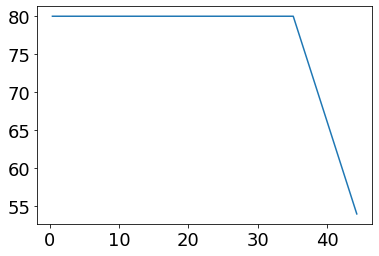

In [94]:
plt.plot(edgs[:-1],n_stars_bins)

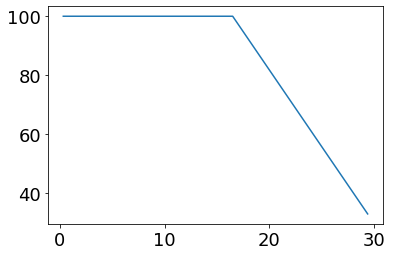

In [95]:
plt.plot(edgs_rv[:-1],n_stars_bins_rv)

In [1092]:
#at least 50 stars, at least 5 arcmin coverage


In [1093]:
edges[:-1]+np.diff(edges)/2

array([ 3.68881816, 10.33795165, 16.98708513, 23.63621861, 30.28535209,
       36.93448557, 43.58361905, 50.23275253, 56.88188601])

In [1094]:
np.diff(edges)

array([6.64913348, 6.64913348, 6.64913348, 6.64913348, 6.64913348,
       6.64913348, 6.64913348, 6.64913348, 6.64913348])

In [287]:
medsr,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr),bins=edgs,statistic='mean')
stdvsr,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr),bins=edgs,statistic='std')

medsr_mu,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr_mu),bins=edgs,statistic='mean')
stdvsr_mu,edges,number = binned_statistic(rr,unumpy.nominal_values(u_vr_mu),bins=edgs,statistic='std')

#medsr_sim,edges_sim,number_sim = binned_statistic(rr_sim,mur_sim,bins=edgs_sim,statistic='mean')
#stdvsr_sim,edges_sim,number_sim = binned_statistic(rr_sim,mur_sim,bins=edgs_sim,statistic='std')

###medsr_6791,edges_6791,number_6791 = binned_statistic(rr_6791,mur_6791,bins=edgs_6791,statistic='mean')
###stdvsr_6791,edges_6791,number_6791 = binned_statistic(rr_6791,mur_6791,bins=edgs_6791,statistic='std')

width = (edges[1] - edges[0])
centers = edges[:-1]+np.diff(edges)/2 #edges[1:] - width/2

#width_sim = (edges_sim[1] - edges_sim[0])
#centers_sim = edges_sim[:-1]+np.diff(edges_sim)/2

###width_6791 = (edges_6791[1] - edges_6791[0])
###centers_6791 = edges_6791[:-1]+np.diff(edges_6791)/2

medsr_mu

array([ 0.02700048, -0.11053957, -0.15330629, -0.13810866, -0.27001159,
       -0.23648174, -0.37328392])

In [288]:
medst,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt),bins=edgs,statistic='mean')
stdvst,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt),bins=edgs,statistic='std')

medst_mu,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt_mu),bins=edgs,statistic='mean')
stdvst_mu,edges2,number2 = binned_statistic(rr,unumpy.nominal_values(u_vt_mu),bins=edgs,statistic='std')

#medst_sim,edges2_sim,number2_sim = binned_statistic(rr_sim,mut_sim,bins=edgs_sim,statistic='mean')
#stdvst_sim,edges2_sim,number2_sim = binned_statistic(rr_sim,mut_sim,bins=edgs_sim,statistic='std')

###medst_6791,edges_6791,number_6791 = binned_statistic(rr_6791,mut_6791,bins=edgs_6791,statistic='mean')
###stdvst_6791,edges_6791,number_6791 = binned_statistic(rr_6791,mut_6791,bins=edgs_6791,statistic='std')

width2 = (edges2[1] - edges2[0])
centers2 = edges[:-1]+np.diff(edges)/2#edges2[1:] - width2/2


Text(0, 0.5, '$\\langle \\mu \\rangle$ [mas/yr]')

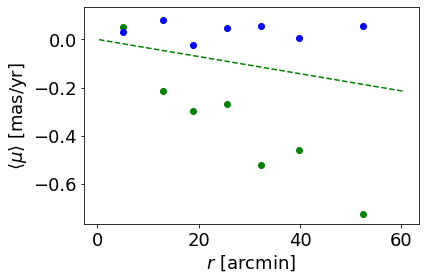

In [289]:
#plt.scatter(rr,vvrr)
#plt.scatter(rr,pred_mur*4.74*cdist/1e3)
#plt.plot(rr,pred_mur,color='green',linestyle='--')
plt.plot(pred_rtTbl['r'],pred_rtTbl['pred_mur'],color='green',linestyle='--',label='Pred.')


#plt.scatter(centers_sim,medsr_sim*4.74*cdist/1e3,color='green')
#plt.scatter(centers_sim,medst_sim*4.74*cdist/1e3,color='blue')
plt.scatter(centers,medsr,color='green',label='Sim. rad.')
plt.scatter(centers,medst,color='blue',label='Sim. tan.')
#plt.legend(ncol=2)
#plt.ylim(-.2,.3)
#plt.ylim(-.2,.15)

plt.xlabel('$r$ [arcmin]')
plt.ylabel(r'$\langle \mu \rangle$ [mas/yr]')
#plt.title('N = 65000 (100x)')

#plt.ylim(-0.05,0.05)

(0, 18)

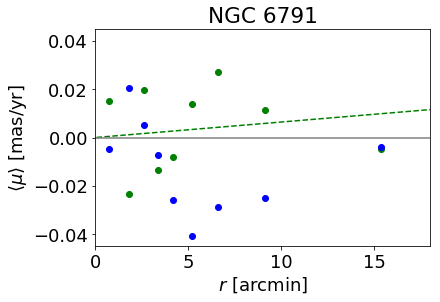

In [236]:
#plt.scatter(rr,vvrr)
#plt.scatter(rr,pred_mur*4.74*cdist/1e3)
#plt.plot(rr,pred_mur,color='green',linestyle='--')
plt.plot(pred_rtTbl_6791['r'],pred_rtTbl_6791['pred_mur'],color='green',linestyle='--',label='Pred.')


#plt.scatter(centers_sim,medsr_sim*4.74*cdist/1e3,color='green')
#plt.scatter(centers_sim,medst_sim*4.74*cdist/1e3,color='blue')
plt.scatter(centers_6791,medsr_6791,color='green',label='Sim. rad.')
plt.scatter(centers_6791,-medst_6791,color='blue',label='Sim. tan.')

plt.plot([-3,23],[0,0],color='gray')
#plt.legend(ncol=2)
#plt.ylim(-.2,.3)
#plt.ylim(-.2,.15)

plt.xlabel('$r$ [arcmin]')
plt.ylabel(r'$\langle \mu \rangle$ [mas/yr]')
plt.title('NGC 6791')

plt.ylim(-0.045,0.045)
plt.xlim(0,18)

In [237]:
edgs_6791

[0.06660583269394284,
 1.447864240445282,
 2.2249752792034045,
 2.9884303700025203,
 3.7647310059250234,
 4.646573009860118,
 5.7859644722099155,
 7.3914278005121155,
 10.856726721813484,
 19.915379661105046]

In [973]:
centers_6791

array([ 0.78635313,  1.9305611 ,  2.73718182,  3.52506259,  4.46086371,
        5.66413822,  7.64131892, 12.7488502 , 18.23291704])

(array([   21.,   233.,  1952.,  8062., 17692., 20151., 12136.,  4042.,
          660.,    51.]),
 array([ 9.68845893,  9.98211611, 10.27577329, 10.56943047, 10.86308766,
        11.15674484, 11.45040202, 11.7440592 , 12.03771638, 12.33137356,
        12.62503075]),
 <a list of 10 Patch objects>)

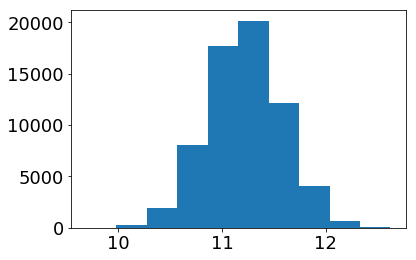

In [324]:
plt.hist(mudec_sim)


(array([10000., 10000., 10000., 10000., 10000., 10000.,  5000.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 7 Patch objects>)

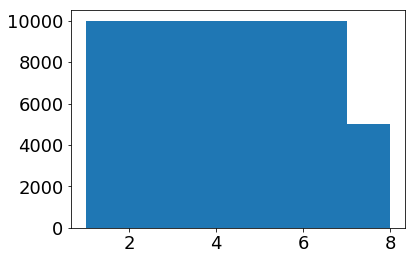

In [318]:
plt.hist(number2_sim,bins=len(edgs_sim)-1)

In [248]:
edgs_sim

[0.6663918269933923,
 9.132425742134181,
 14.863699695852098,
 20.94940624848782,
 26.45496935461268,
 32.228308437713295,
 40.08492518716707,
 60.21645275555229]

In [1818]:
#meds3,edges3,number3 = binned_statistic(rr,unumpy.std_devs(u_vt),bins=10,statistic='mean')
sterr,edgesst,numberst = binned_statistic(rr,unumpy.std_devs(u_vt),bins=edgs,statistic='mean')
sterr_mu,edgesst,numberst = binned_statistic(rr,unumpy.std_devs(u_vt_mu),bins=edgs,statistic='mean')


widthst = (edgesst[1] - edgesst[0])
centersst = edges[:-1]+np.diff(edges)/2#edgesst[1:] - widthst/2

In [1819]:
#meds4,edges4,number4 = binned_statistic(rr,unumpy.std_devs(u_vr),bins=10,statistic='mean')
srerr,edgessr,numbersr = binned_statistic(rr,unumpy.std_devs(u_vr),bins=edgs,statistic='std')
srerr_mu,edgessr,numbersr = binned_statistic(rr,unumpy.std_devs(u_vr_mu),bins=edgs,statistic='std')

widthsr = (edgessr[1] - edgessr[0])
centerssr = edges[:-1]+np.diff(edges)/2#edgessr[1:] - widthsr/2

In [1820]:
#unumpy.std_devs(u_vt)

In [1821]:
srerr,edgessr,numbersr = binned_statistic(rr,unumpy.std_devs(u_vr),bins=edgs,statistic='mean')
srerr_mu,edgessr,numbersr = binned_statistic(rr,unumpy.std_devs(u_vr_mu),bins=edgs,statistic='mean')


widthsr = (edgessr[1] - edgessr[0])
centerssr = edges[:-1]+np.diff(edges)/2#edgessr[1:] - widthsr/2

srerr

array([0.18002612, 0.18385692, 0.16506218, 0.1812737 , 0.15198119,
       0.14534234, 0.13079494])

In [99]:
losbnz = 3
vlos,edgeslos,numberslos = binned_statistic(rr_rv,vperp-pred_vperp,bins=edgs_rv,statistic='mean')


slos,edgeslos,numberslos = binned_statistic(rr_rv,vperp-pred_vperp,bins=edgs_rv,statistic='std')
sloserr,edgeslos,numberslos = binned_statistic(rr_rv,SSMgrv['pRV'],bins=edgs_rv,statistic='mean')


#widthslos = #(edgeslos[1] - edgeslos[0])

centerslos = edgeslos[:-1]+np.diff(edgeslos)/2#edgeslos[1:] - widthslos/2

In [100]:
edgeslos
los_indx1 = (rr_rv > edgeslos[0]) & (rr_rv < edgeslos[1])
#los_indx1 = (rr_rv > edgs_rv[0]) & (rr_rv < edgs_rv[1])

los_indx2 = (rr_rv > edgeslos[1]) & (rr_rv < edgeslos[2])
los_indx3 = (rr_rv > edgeslos[2]) & (rr_rv < edgeslos[3])

los_indx_last = (rr_rv > edgeslos[-2]) & (rr_rv < edgeslos[-1])

#los_indx4 = (rr_rv > edgeslos[3]) & (rr_rv < edgeslos[4])

In [101]:
np.sum(los_indx_last)

34

In [102]:
edgeslos

array([ 0.35426224, 16.49279421, 29.35319894, 44.75964095])

In [1826]:
edgs_rv

array([ 0.35425142, 15.30950049, 25.91943912, 45.14447611])

In [1827]:
np.sum(los_indx1_prime)

NameError: name 'los_indx1_prime' is not defined

In [1828]:
losTbl['r'][0],losTbl['r'][48], losTbl['r'][49],losTbl['r'][50]

(0.3642514230346522, 9.243665674047673, 9.38516977310943, 9.471400123873606)

In [1829]:
rr_rv[los_indx1]

<Column name='ra' dtype='float64' length=100>
14.582972906463047
14.444283400315124
14.371177476452555
15.158583288007357
12.557227301104383
14.343429113135688
  11.7235575634509
10.721921538482366
10.053858652738363
12.431528004678865
 9.080618345501835
13.413997596439636
               ...
 8.215017798305862
 8.001035732515648
 11.14198469405758
 9.236800877628328
14.212808768541642
 9.727872890567522
13.032703494642195
10.875519694944439
11.002913974281434
13.830543174890785
13.194764825541455
14.572441767440688

In [1830]:
u_vr_mu

<Column name='ra' dtype='object' length=651>
 0.34+/-0.08
 0.24+/-0.07
-0.30+/-0.07
-0.05+/-0.06
-0.16+/-0.05
 0.76+/-0.10
-0.62+/-0.06
-0.39+/-0.06
 0.06+/-0.04
-0.47+/-0.07
-0.97+/-0.07
-0.54+/-0.05
         ...
 0.42+/-0.19
-0.28+/-0.22
-0.50+/-0.27
 0.18+/-0.20
-0.44+/-0.23
-0.33+/-0.24
-0.65+/-0.21
-0.10+/-0.19
-0.10+/-0.22
-0.14+/-0.23
-0.30+/-0.21
-0.42+/-0.24

In [1831]:
len(mems)/len(SSMgrv)

2.9516728624535316

Text(0, 0.5, '$\\langle \\mu \\rangle$ [mas/yr]')

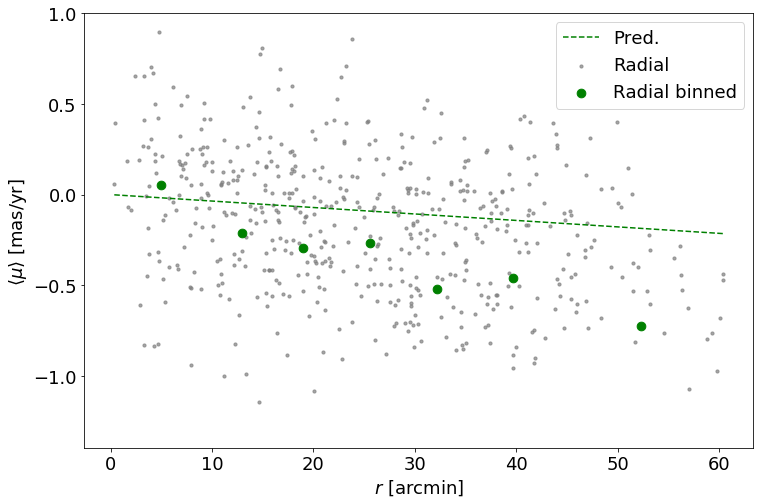

In [103]:
fg = plt.figure(figsize=(12,8))
plt.scatter(rr,unumpy.nominal_values(u_vr_mu),s=10,color='gray',alpha=0.7,zorder=0,label='Radial')
#plt.scatter(centers,medsr_mu,color='gold',label='Radial',s=100,zorder=2)
plt.scatter(centers,medsr,color='green',label='Radial binned',s=75)
#plt.errorbar(centers,medsr/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

#plt.errorbar(centers,medsr_mu,color='gold',yerr=stdvsr_mu,linestyle='none')
#plt.plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$',linewidth=2.5)
plt.plot(pred_rtTbl['r'],pred_rtTbl['pred_mur'],color='green',linestyle='--',label='Pred.')

plt.ylim(-1.4,1,4)
plt.legend()
plt.xlabel('$r$ [arcmin]')
plt.ylabel(r'$\langle \mu \rangle$ [mas/yr]')
#fg.savefig('/Users/bhealy/Downloads/ngc2516_radialbinning.pdf',bbox_inches='tight')


Text(0,0.5,'$\\langle \\mu \\rangle$ [mas/yr]')

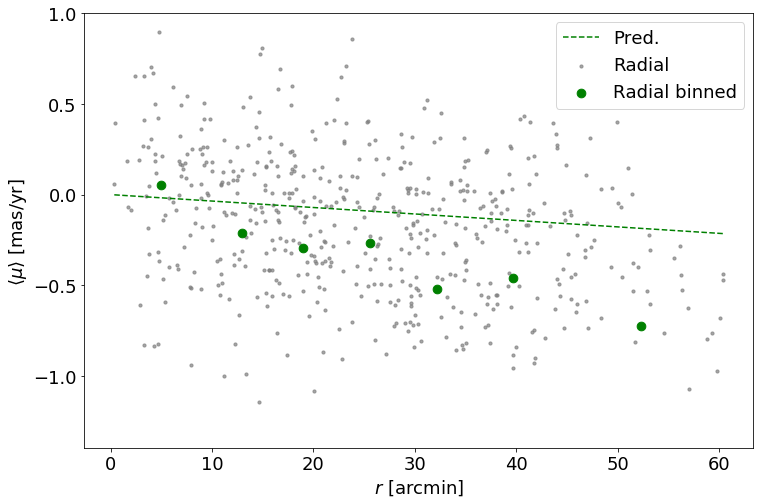

In [240]:
fg = plt.figure(figsize=(12,8))
plt.scatter(rr,unumpy.nominal_values(u_vr_mu),s=10,color='gray',alpha=0.7,zorder=0,label='Radial')
#plt.scatter(centers,medsr_mu,color='gold',label='Radial',s=100,zorder=2)
plt.scatter(centers,medsr,color='green',label='Radial binned',s=75)
#plt.errorbar(centers,medsr/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

#plt.errorbar(centers,medsr_mu,color='gold',yerr=stdvsr_mu,linestyle='none')
#plt.plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$',linewidth=2.5)
plt.plot(pred_rtTbl['r'],pred_rtTbl['pred_mur'],color='green',linestyle='--',label='Pred.')

plt.ylim(-1.4,1,4)
plt.legend()
plt.xlabel('$r$ [arcmin]')
plt.ylabel(r'$\langle \mu \rangle$ [mas/yr]')
#fg.savefig('/Users/bhealy/Downloads/ngc2516_radialbinning.pdf',bbox_inches='tight')


(array([80., 80., 80., 80., 80., 80., 55.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

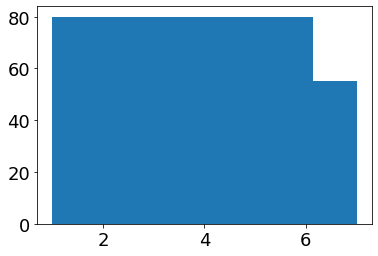

In [104]:
plt.hist(number,bins=len(edgs)-1)
#plt.hist(number,bins=bnz)

(array([100., 100.,  34.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 3 Patch objects>)

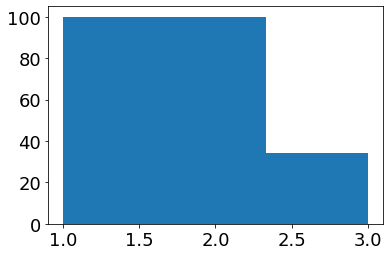

In [105]:
plt.hist(numberslos,bins=len(edgs_rv)-1)
#plt.hist(numberslos,bins=losbnz)

In [699]:
centers

array([ 4.14840166, 10.86498662, 15.87933068, 20.89003659, 26.72766504,
       32.86395099, 39.86027662, 51.92780047])

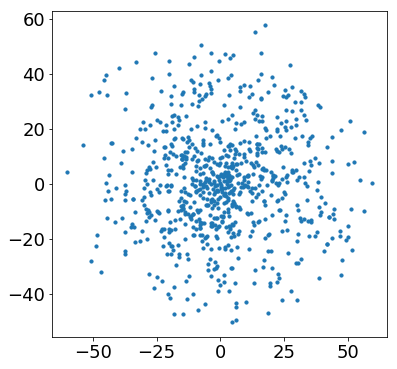

In [700]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,s=10)

In [180]:
#np.min(rr_rv[numberslos == 6])

In [4391]:
np.min(rr_rv[los_indx_last])

57.55283280921261

In [4392]:
edgeslos

array([ 0.44367207, 14.25624816, 20.69666335, 31.04295158, 42.29329995,
       57.43100247, 91.71884033])

In [106]:
#pf=np.polyfit(pred_rtTbl['r'],pred_rtTbl['pred_mur']*4.74*cdist/1e3,deg=1)
pf=np.polyfit(pred_rtTbl['r'],pred_rtTbl['pred_mur'],deg=1)

pf

array([-3.56412637e-03,  9.59982540e-18])

In [155]:
zeroint_slope/pf[0]

1.9681292057082507

In [107]:
np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]

-0.015676116706763457

In [147]:
pf_data = np.polyfit(rtTbl_mu['r'],rtTbl_mu['vr'],1)

#pf_data = np.polyfit(np.concatenate(([0],rtTbl_mu['r'])),np.concatenate(([0],rtTbl_mu['vr'])),1)

In [112]:
np.concatenate(([0],rtTbl_mu['vr']))

array([ 0.        ,  0.05598701,  0.39251521,  0.18351442, -0.06703468,
       -0.08381561,  0.65713508,  0.18923314, -0.61009234,  0.26586078,
       -0.83181102,  0.65512143,  0.40984778, -0.00919952, -0.44718124,
       -0.18203748,  0.26097935, -0.32532122,  0.04629738,  0.3054141 ,
        0.70665693,  0.67117309, -0.83479737,  0.50093475,  0.22207374,
        0.18659995,  0.11969007, -0.31438555,  0.42436986, -0.82472622,
        0.89616912, -0.36864095,  0.21390608, -0.4638398 , -0.14105261,
       -0.5942007 , -0.11339394, -0.40060224, -0.01809598, -0.03982736,
        0.59596895, -0.08647005, -0.3866939 , -0.4106539 ,  0.18379086,
       -0.00380198,  0.16711298,  0.32413322,  0.10451317,  0.49190912,
        0.16369277,  0.14252975, -0.29166451,  0.17595878,  0.09032959,
        0.54389183,  0.22178778, -0.22108217, -0.51140439, -0.51382269,
        0.05168751, -0.93964389,  0.25085123, -0.42484867, -0.15512276,
       -0.07593519,  0.24993779, -0.52369673,  0.36294019,  0.05

In [150]:
zeroint_slope = np.linalg.lstsq(rtTbl_mu['r'].reshape(-1,1), rtTbl_mu['vr'])[0][0]

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(0, 60)

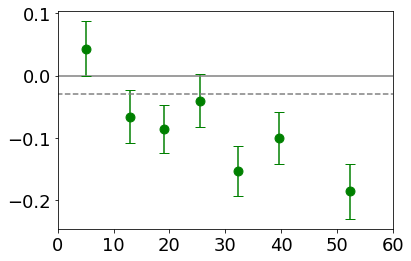

In [175]:
plt.scatter(centers,medsr_mcmc/(4.74*cdist/1e3) - (pf[0]*centers + pf[1]),color='green',s=sz)
plt.plot([-3,63],[-0.0,-0.0],color='gray')

plt.plot([-3,63],[-0.03,-0.03],color='gray',linestyle='--')
plt.errorbar(centers,medsr_mcmc/(4.74*cdist/1e3) - (pf[0]*centers + pf[1]),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',capsize=cpsz)

plt.xlim(0,60)

In [161]:
pf[0]*centers + pf[1]

array([-0.01783063, -0.04603663, -0.06759496, -0.09104396, -0.11488085,
       -0.14153634, -0.1865768 ])

In [162]:
medsr_mcmc/(4.74*cdist/1e3)

array([ 0.02519531, -0.11259873, -0.15397721, -0.13116795, -0.26796044,
       -0.24134587, -0.37284527])

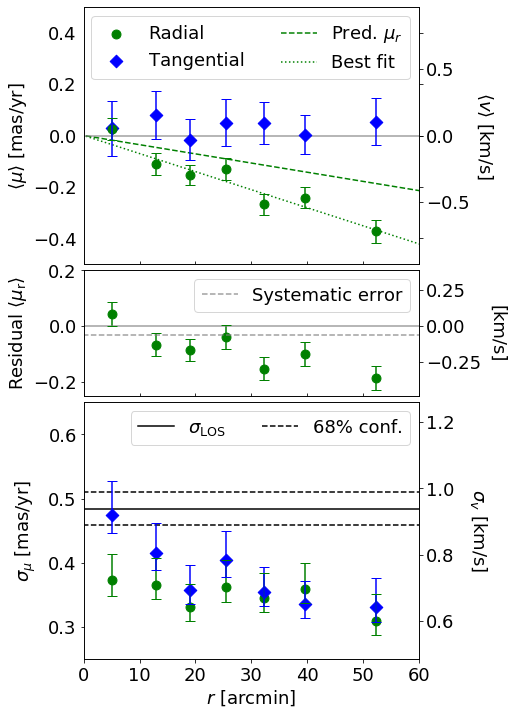

In [199]:
#PAPER FIGURE HERE gridspec
import matplotlib.gridspec as gridspec


offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
fig = plt.figure(figsize=(6,12))
gs=gridspec.GridSpec(ncols=1, nrows=5,hspace=.05,wspace=.25)

ax0=plt.subplot(gs[0:2,0])
ax1=plt.subplot(gs[2:3,0])
ax2=plt.subplot(gs[3:5,0])

#fig,ax = plt.subplots(3,1,figsize=(6,12))
#plt.subplots_adjust(hspace=0.05)
ax0.scatter(centers-offset,medsr_mcmc/(4.74*cdist/1e3),color='green',label='Radial',s=sz,zorder=2)
ax0.errorbar(centers-offset,medsr_mcmc/(4.74*cdist/1e3),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz,zorder=2)

#ax0.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[1],color='green',linestyle='dotted',label='Best fit',zorder=0)

####ax0.plot(rtTbl_mu['r'],pf_data[0]*rtTbl_mu['r'] + pf_data[1],color='green',linestyle='dotted',label='Best fit',zorder=0)
ax0.plot(rtTbl_mu['r'],zeroint_slope*rtTbl_mu['r'],color='green',linestyle='dotted',label='Best fit',zorder=0)

#ax0.plot(np.concatenate(([0],rtTbl_mu['r'])),pf_data[0]*np.concatenate(([0],rtTbl_mu['r'])) + pf_data[1],color='green',linestyle='dotted',label='Best fit',zorder=0)


#ax0.plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[1],color='green',linestyle='--',label='')
#ax0.plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--')
ax0.plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$',zorder=0)

ax0.scatter(centers2+offset,medst_mcmc,color='blue',label='Tangential',marker='D',s=sz)
ax0.errorbar(centers2+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax0.plot([-3,63],[0,0],color='gray',zorder=0,alpha=0.75)

#ax0.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax0.plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax0.scatter(centerslos+2*offset,vlos,color='black',label='LOS',marker='s',s=sz,zorder=0)
#ax0.errorbar(centerslos+2*offset,vlos,yerr=slos,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)

#twinax = plt.twinx(ax0)


#ax0.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax0.plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')
handles, lbls = ax0.get_legend_handles_labels()

ax0.legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)


#ax0.legend(fontsize=18,ncol=2)

ax1.scatter(centers,medsr_mcmc/(4.74*cdist/1e3) - (pf[0]*centers + pf[1]),color='green',s=sz,label='')
ax1.plot([-3,63],[-0.0,-0.0],color='gray',label='',alpha=0.75)

ax1.plot([-3,63],[-0.03,-0.03],color='gray',linestyle='--',label='Systematic error',alpha=0.75)
ax1.errorbar(centers,medsr_mcmc/(4.74*cdist/1e3) - (pf[0]*centers + pf[1]),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',label='',color='green',capsize=cpsz)

ax1.set_xlim(0,60)
ax1.legend()


ax2.scatter(centers-offset,sigr_mcmc/(4.74*cdist/1e3),color='green',label='',s=sz)
ax2.errorbar(centers-offset,sigr_mcmc/(4.74*cdist/1e3),yerr=(srerr_lo_mcmc/(4.74*cdist/1e3),srerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

ax2.scatter(centers+offset,sigt_mcmc/(4.74*cdist/1e3),color='blue',label='',s=sz,marker='D')
ax2.errorbar(centers+offset,sigt_mcmc/(4.74*cdist/1e3),yerr=(sterr_lo_mcmc/(4.74*cdist/1e3),sterr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='blue',label='',capsize=cpsz)

#ax1.scatter(centerslos+2*offset,slos,color='black',label='',s=sz,marker='s',zorder=0)
#ax1.errorbar(centerslos+2*offset,slos,yerr=sloserr,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)
axx0 = plt.twinx(ax0)
axx1 = plt.twinx(ax1)

axx2 = plt.twinx(ax2)

ax2.plot([-3,70],[0.939/(4.74*cdist/1e3),0.939/(4.74*cdist/1e3)],color='black',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax2.plot([-3,70],[(0.939 - 0.051)/(4.74*cdist/1e3),(0.939 - 0.051)/(4.74*cdist/1e3)],color='black',linestyle='--',zorder=0,label='68% conf.')
ax2.plot([-3,70],[(0.939 + 0.051)/(4.74*cdist/1e3),(0.939 + 0.051)/(4.74*cdist/1e3)],color='black',linestyle='--',zorder=0)

#ax0.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax1.plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax2.legend(ncol=2)



ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax0.set_xlim(0,60)
ax2.set_xlim(0,60)
#ax0.set_ylim(-1.4,0.8)
ax0.set_ylim(-0.5,0.5)
ax2.set_xlabel('$r$ [arcmin]')
ax0.set_ylabel(r'$\langle \mu \rangle $ [mas/yr]')
ax2.set_ylabel(r'$\sigma_{\mu} $ [mas/yr]',labelpad=10)
#ax1.set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax2.set_ylim(0.25,0.65)
axx0.set_ylim(-0.5*(4.74*cdist/1e3),0.5*(4.74*cdist/1e3))
axx1.set_ylim(-0.25*(4.74*cdist/1e3),0.2*(4.74*cdist/1e3))

axx2.set_ylim(0.25*(4.74*cdist/1e3),0.65*(4.74*cdist/1e3))
axx2.set_ylabel(r'$\sigma_{v}$ [km/s]',rotation=-90,labelpad=35)
axx1.set_ylabel('[km/s]',rotation=-90,labelpad=25)

axx0.set_ylabel(r'$\langle v \rangle $ [km/s]',rotation=-90,labelpad=25)
#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_lessbnz.pdf',bbox_inches='tight')
ax0.tick_params(axis='x',direction='in')
ax1.tick_params(axis='x',direction='in')

ax0.tick_params(axis='y',direction='out',right=False,left=True)
ax0.tick_params(axis='y',direction='out',right=True,left=False)

ax1.set_ylabel(r'Residual $\langle \mu_{\rm r} \rangle$')
ax1.set_ylim(-0.25,0.2)
fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_3boxes_residuals.pdf',bbox_inches='tight')


In [268]:
#Table(data=[centers,medsr_mcmc,sigr_mcmc,rerr_lo_mcmc,rerr_hi_mcmc,srerr_lo_mcmc,srerr_hi_mcmc,medst_mcmc,sigt_mcmc,terr_lo_mcmc,terr_hi_mcmc,sterr_lo_mcmc,sterr_hi_mcmc],names=['centers','medsr_mcmc','sigr_mcmc','rerr_lo_mcmc','rerr_hi_mcmc','srerr_lo_mcmc','srerr_hi_mcmc','medst_mcmc','sigt_mcmc','terr_lo_mcmc','terr_hi_mcmc','sterr_lo_mcmc','sterr_hi_mcmc']).write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/cluster_rot_values.dat',format='ascii')
ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/cluster_rot_values.dat')



<Table length=7>
     centers            medsr_mcmc      ...    sterr_hi_mcmc   
     float64             float64        ...       float64      
------------------ -------------------- ... -------------------
  5.00280620365621 0.048833201730016006 ... 0.10165737067324998
12.916665428035666 -0.21823728301021006 ... 0.08932894821148074
 18.96536669968808 -0.29843646270249546 ... 0.07685795152100283
25.544537395266683 -0.25422788730580415 ... 0.08679955829369124
 32.23254038638994  -0.5193571572427644 ... 0.07533511690013772
 39.71136982131383 -0.46777318676033525 ...   0.069845928386284
 52.34853657209251  -0.7226434632747853 ... 0.08735407431674425

In [267]:
#pf = np.array([-3.56412637e-03,  9.59982540e-18])
#zeroint_slope = -0.0070146611971108695
#cdist = 408.9

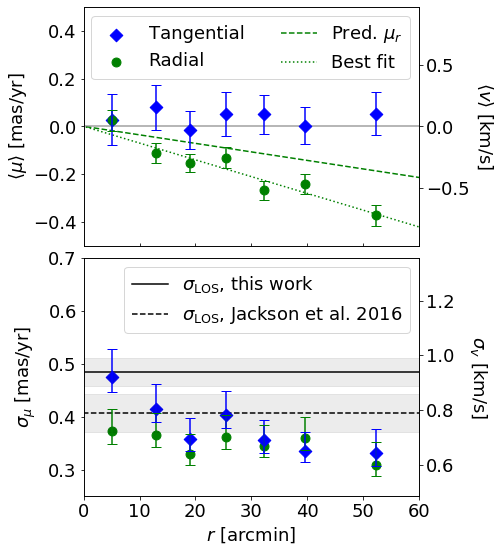

In [279]:
#PAPER FIGURE HERE NEW
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,1,figsize=(6,9))
plt.subplots_adjust(hspace=0.05)
ax[0].scatter(centers-offset,medsr_mcmc/(4.74*cdist/1e3),color='green',label='Radial',s=sz,zorder=2)
ax[0].errorbar(centers-offset,medsr_mcmc/(4.74*cdist/1e3),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz,zorder=2)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[1],color='green',linestyle='dotted',label='Best fit',zorder=0)

####ax[0].plot(rtTbl_mu['r'],pf_data[0]*rtTbl_mu['r'] + pf_data[1],color='green',linestyle='dotted',label='Best fit',zorder=0)
ax[0].plot(rtTbl_mu['r'],zeroint_slope*rtTbl_mu['r'],color='green',linestyle='dotted',label='Best fit',zorder=0)

#ax[0].plot(np.concatenate(([0],rtTbl_mu['r'])),pf_data[0]*np.concatenate(([0],rtTbl_mu['r'])) + pf_data[1],color='green',linestyle='dotted',label='Best fit',zorder=0)


#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[1],color='green',linestyle='--',label='')
#ax[0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--')
ax[0].plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$',zorder=0)

ax[0].scatter(centers2+offset,medst_mcmc,color='blue',label='Tangential',marker='D',s=sz)
ax[0].errorbar(centers2+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[0].plot([-3,63],[0,0],color='gray',zorder=0,alpha=0.75)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0].scatter(centerslos+2*offset,vlos,color='black',label='LOS',marker='s',s=sz,zorder=0)
#ax[0].errorbar(centerslos+2*offset,vlos,yerr=slos,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')
handles, lbls = ax[0].get_legend_handles_labels()

#ax[0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)
ax[0].legend((handles[-1],handles[-2],handles[1],handles[0]),(lbls[-1],lbls[-2],lbls[1],lbls[0]),fontsize=18,ncol=2)


#ax[0].legend(fontsize=18,ncol=2)

ax[1].scatter(centers-offset,sigr_mcmc/(4.74*cdist/1e3),color='green',label='',s=sz)
ax[1].errorbar(centers-offset,sigr_mcmc/(4.74*cdist/1e3),yerr=(srerr_lo_mcmc/(4.74*cdist/1e3),srerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

ax[1].scatter(centers+offset,sigt_mcmc/(4.74*cdist/1e3),color='blue',label='',s=sz,marker='D')
ax[1].errorbar(centers+offset,sigt_mcmc/(4.74*cdist/1e3),yerr=(sterr_lo_mcmc/(4.74*cdist/1e3),sterr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='blue',label='',capsize=cpsz)

#ax[1].scatter(centerslos+2*offset,slos,color='black',label='',s=sz,marker='s',zorder=0)
#ax[1].errorbar(centerslos+2*offset,slos,yerr=sloserr,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)
ax0 = plt.twinx(ax[0])

ax1 = plt.twinx(ax[1])

ax[1].plot([-3,70],[0.939/(4.74*cdist/1e3),0.939/(4.74*cdist/1e3)],color='black',label=r'$\sigma_{\rm LOS}$, this work',zorder=0)
#ax[1].plot([-3,70],[(0.939 - 0.051)/(4.74*cdist/1e3),(0.939 - 0.051)/(4.74*cdist/1e3)],color='black',linestyle='dotted',zorder=0,label='')
#ax[1].plot([-3,70],[(0.939 + 0.051)/(4.74*cdist/1e3),(0.939 + 0.051)/(4.74*cdist/1e3)],color='black',linestyle='dotted',zorder=0,label='')

#ax[1].arrow(30,0.939/(4.74*cdist/1e3),0,-.05,head_width=2,head_length=.02,color='black')

ax[1].plot([-3,70],[0.79/(4.74*cdist/1e3),0.79/(4.74*cdist/1e3)],color='black',label=r'$\sigma_{\rm LOS}$, Jackson et al. 2016',zorder=0,linestyle='--')
#ax[1].plot([-3,70],[(0.79 - 0.07)/(4.74*cdist/1e3),(0.79 - 0.07)/(4.74*cdist/1e3)],color='black',linestyle='dotted',zorder=0,label='')
#ax[1].plot([-3,70],[(0.79 + 0.07)/(4.74*cdist/1e3),(0.79 + 0.07)/(4.74*cdist/1e3)],color='black',linestyle='dotted',zorder=0,label='')

ax[1].fill_between([-3,70],(0.939-0.051)/(4.74*cdist/1e3),(0.939+0.051)/(4.74*cdist/1e3),color='black',alpha=0.075)
ax[1].fill_between([-3,70],(0.79-0.07)/(4.74*cdist/1e3),(0.79+0.07)/(4.74*cdist/1e3),color='black',alpha=0.075)

#ax[1].arrow(30,0.939/(4.74*cdist/1e3),0,-.05,head_width=2,head_length=.02,color='black')


#plt.arrow()
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1].legend(ncol=1)



ax[0].set_xticklabels([])
ax[0].set_xlim(0,60)
ax[1].set_xlim(0,60)
#ax[0].set_ylim(-1.4,0.8)
ax[0].set_ylim(-0.5,0.5)
ax[1].set_xlabel('$r$ [arcmin]')
ax[0].set_ylabel(r'$\langle \mu \rangle $ [mas/yr]')
ax[1].set_ylabel(r'$\sigma_{\mu} $ [mas/yr]',labelpad=10)
#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
#ax[1].set_ylim(0.25,0.65)
ax[1].set_ylim(0.25,0.7)

ax0.set_ylim(-0.5*(4.74*cdist/1e3),0.5*(4.74*cdist/1e3))
ax1.set_ylim(0.25*(4.74*cdist/1e3),0.7*(4.74*cdist/1e3))
ax1.set_ylabel(r'$\sigma_{v}$ [km/s]',rotation=-90,labelpad=35)
ax0.set_ylabel(r'$\langle v \rangle $ [km/s]',rotation=-90,labelpad=25)
#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_lessbnz.pdf',bbox_inches='tight')
ax[0].tick_params(axis='x',direction='in')
ax[0].tick_params(axis='y',direction='out',right=False,left=True)
ax0.tick_params(axis='y',direction='out',right=True,left=False)

#ax[0].errorbar(10,-0.3,yerr=0.015,capsize=cpsz)

fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_2boxes_los_jack_shaded.pdf',bbox_inches='tight')


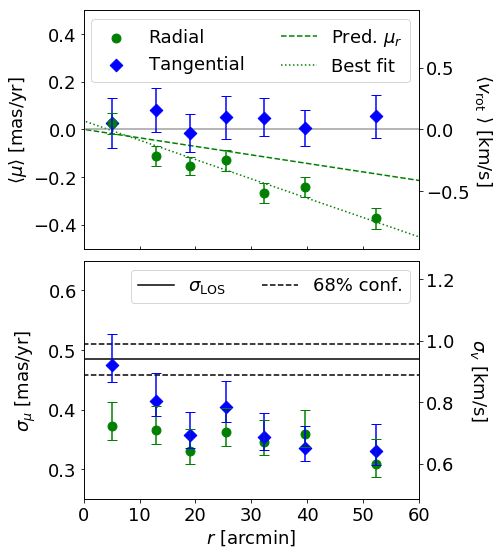

In [448]:
#PAPER FIGURE HERE
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,1,figsize=(6,9))
plt.subplots_adjust(hspace=0.05)
ax[0].scatter(centers-offset,medsr_mcmc/(4.74*cdist/1e3),color='green',label='Radial',s=sz,zorder=2)
ax[0].errorbar(centers-offset,medsr_mcmc/(4.74*cdist/1e3),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz,zorder=2)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr_mu),deg=1)[1],color='green',linestyle='dotted',label='Best fit',zorder=0)
ax[0].plot(rtTbl_mu['r'],pf_data[0]*rtTbl_mu['r'] + pf_data[1],color='green',linestyle='dotted',label='Best fit',zorder=0)


#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[1],color='green',linestyle='--',label='')
#ax[0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--')
ax[0].plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$',zorder=0)

ax[0].scatter(centers2+offset,medst_mcmc,color='blue',label='Tangential',marker='D',s=sz)
ax[0].errorbar(centers2+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[0].plot([-3,63],[0,0],color='gray',zorder=0,alpha=0.75)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0].scatter(centerslos+2*offset,vlos,color='black',label='LOS',marker='s',s=sz,zorder=0)
#ax[0].errorbar(centerslos+2*offset,vlos,yerr=slos,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')
handles, lbls = ax[0].get_legend_handles_labels()

ax[0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)


#ax[0].legend(fontsize=18,ncol=2)

ax[1].scatter(centers-offset,sigr_mcmc/(4.74*cdist/1e3),color='green',label='',s=sz)
ax[1].errorbar(centers-offset,sigr_mcmc/(4.74*cdist/1e3),yerr=(srerr_lo_mcmc/(4.74*cdist/1e3),srerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

ax[1].scatter(centers+offset,sigt_mcmc/(4.74*cdist/1e3),color='blue',label='',s=sz,marker='D')
ax[1].errorbar(centers+offset,sigt_mcmc/(4.74*cdist/1e3),yerr=(sterr_lo_mcmc/(4.74*cdist/1e3),sterr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='blue',label='',capsize=cpsz)

#ax[1].scatter(centerslos+2*offset,slos,color='black',label='',s=sz,marker='s',zorder=0)
#ax[1].errorbar(centerslos+2*offset,slos,yerr=sloserr,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)
ax0 = plt.twinx(ax[0])

ax1 = plt.twinx(ax[1])

ax[1].plot([-3,70],[0.939/(4.74*cdist/1e3),0.939/(4.74*cdist/1e3)],color='black',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1].plot([-3,70],[(0.939 - 0.051)/(4.74*cdist/1e3),(0.939 - 0.051)/(4.74*cdist/1e3)],color='black',linestyle='--',zorder=0,label='68% conf.')
ax[1].plot([-3,70],[(0.939 + 0.051)/(4.74*cdist/1e3),(0.939 + 0.051)/(4.74*cdist/1e3)],color='black',linestyle='--',zorder=0)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1].legend(ncol=2)



ax[0].set_xticklabels([])
ax[0].set_xlim(0,60)
ax[1].set_xlim(0,60)
#ax[0].set_ylim(-1.4,0.8)
ax[0].set_ylim(-0.5,0.5)
ax[1].set_xlabel('$r$ [arcmin]')
ax[0].set_ylabel(r'$\langle \mu \rangle $ [mas/yr]')
ax[1].set_ylabel(r'$\sigma_{\mu} $ [mas/yr]',labelpad=10)
#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1].set_ylim(0.25,0.65)
ax0.set_ylim(-0.5*(4.74*cdist/1e3),0.5*(4.74*cdist/1e3))
ax1.set_ylim(0.25*(4.74*cdist/1e3),0.65*(4.74*cdist/1e3))
ax1.set_ylabel(r'$\sigma_{v}$ [km/s]',rotation=-90,labelpad=35)
ax0.set_ylabel(r'$\langle v_{\rm rot}\ \rangle $ [km/s]',rotation=-90,labelpad=25)
#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_lessbnz.pdf',bbox_inches='tight')
ax[0].tick_params(axis='x',direction='in')
ax[0].tick_params(axis='y',direction='out',right=False,left=True)
ax0.tick_params(axis='y',direction='out',right=True,left=False)

fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_2boxes_revised.pdf',bbox_inches='tight')


In [1158]:
np.abs(rerr_lo_mcmc/medsr_mcmc)

array([1.63290947, 0.33427475, 0.20882011, 0.18776891, 0.14536042,
       0.15595537, 0.14043753])

In [196]:
pf[0]

-0.00694049915566179

In [4897]:
np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]

-0.008506808433788156

Text(0,0.5,'$\\sigma_{v} $ [km/s]')

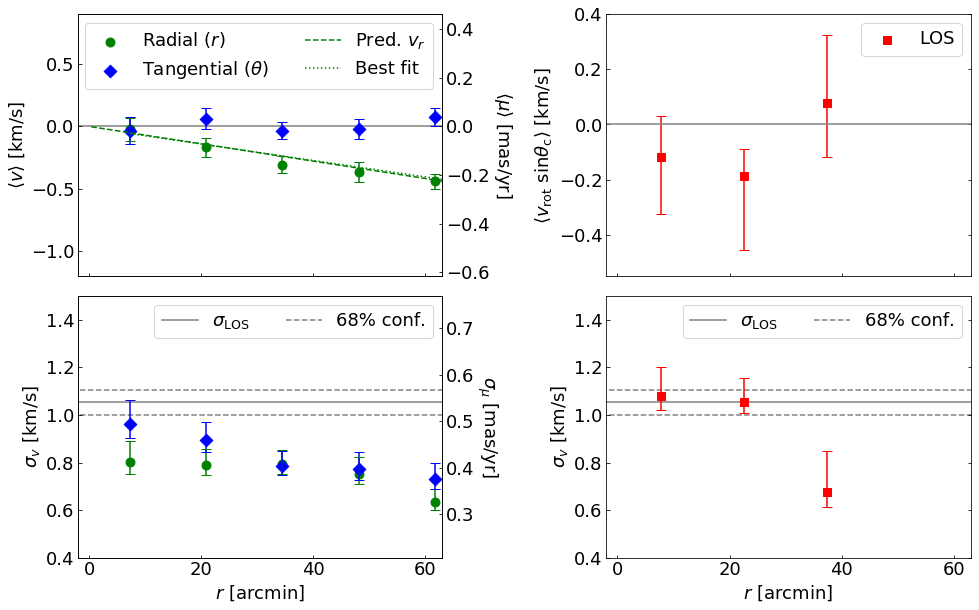

In [3941]:
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(hspace=0.075,wspace=0.45)
ax[0,0].scatter(centers-offset,medsr_mcmc,color='green',label=r'Radial ($r$)',s=sz)
ax[0,0].errorbar(centers-offset,medsr_mcmc,yerr=(rerr_lo_mcmc,rerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--',label='')
ax[0,0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=1)

ax[0,0].scatter(centers2+offset,medst_mcmc,color='blue',label=r'Tangential ($\theta$)',marker='D',s=sz)
ax[0,0].errorbar(centers2+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0,1].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)
#####ax[0,1].scatter(centerslos+0*offset,vrot_mcmc,color='red',label='',marker='s',s=sz,zorder=1)
#####ax[0,1].errorbar(centerslos+0*offset,vrot_mcmc,yerr=(vrot_err_lo_mcmc,vrot_err_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)
#ax[0,1].scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',s=1)

ax[0,1].scatter(centerslos,unumpy.nominal_values(vrot_sin_theta),color='red',label='LOS',marker='s',s=sz,zorder=1)
ax[0,1].errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),yerr=(unumpy.std_devs(vrot_sin_theta_lo),unumpy.std_devs(vrot_sin_theta_hi)),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[0,0].plot(centers,np.polyfit(centers,medsr_mcmc,deg=1)[0]*centers + np.polyfit(centers,medsr_mcmc,deg=1)[1],color='green',linestyle='dotted',label='Best fit')
ax[0,0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--',label=r'Pred. $v_{r}$')

handles, lbls = ax[0,0].get_legend_handles_labels()

ax[0,0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)
#ax[0,0].legend((p0,p1),fontsize=16,loc=2)


ax[1,0].scatter(centerssr-offset,sigr_mcmc,color='green',label='',s=sz)
ax[1,0].errorbar(centerssr-offset,sigr_mcmc,yerr=(srerr_lo_mcmc,srerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)

ax[1,0].scatter(centersst+offset,sigt_mcmc,color='blue',label='',s=sz,marker='D')
ax[1,0].errorbar(centersst+offset,sigt_mcmc,yerr=(sterr_lo_mcmc,sterr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[1,1].scatter(centerslos+0*offset,siglos_mcmc,color='red',label='',s=sz,marker='s',zorder=1)
ax[1,1].errorbar(centerslos+0*offset,siglos_mcmc,yerr=(slerr_lo_mcmc,slerr_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

ax[1,0].plot([-3,70],[1.053,1.053],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,0].plot([-3,70],[1.053 - 0.052,1.053 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,0].plot([-3,70],[1.053 + 0.052,1.053 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0,1].plot([-3,70],[0.088,0.088],color='gray',linestyle='-',label=r'$v_{\rm rot}$')
#ax[0,1].plot([-3,70],[0.088+0.089,0.088+0.089],color='gray',linestyle='--',label='68% conf.')
#ax[0,1].plot([-3,70],[0.088-0.062,0.088-0.062],color='gray',linestyle='--')
#ax[0,1].plot([-3,70],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)],color='gray',linestyle='--',label=r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $')
ax[0,1].plot([-3,70],[0,0],color='gray')


ax[1,1].plot([-3,70],[1.053,1.053],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,1].plot([-3,70],[1.053 - 0.052,1.053 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,1].plot([-3,70],[1.053 + 0.052,1.053 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1,0].legend(fontsize=18,ncol=2)
ax[0,1].legend(fontsize=18,ncol=2)
ax[1,1].legend(fontsize=18,ncol=2)


ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
#ax[0,1].set_yticklabels([])
#ax[1,1].set_yticklabels([])


ax[0,0].set_xlim(-2,63)
ax[1,0].set_xlim(-2,63)
ax[0,1].set_xlim(-2,63)
ax[1,1].set_xlim(-2,63)

ax[0,0].set_ylim(-1.2,0.9)
###ax[0,1].set_ylim(-0.05,0.5)
ax[0,1].set_ylim(-0.55,0.4)


ax00 = plt.twinx(ax[0,0])
ax00.set_ylim(-1.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 0.9*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)


ax11 = plt.twinx(ax[1,0])
ax11.set_ylim(0.4*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 1.5*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)

ax[1,0].set_xlabel('$r$ [arcmin]')
ax[1,1].set_xlabel('$r$ [arcmin]')

ax[0,0].set_ylabel(r'$\langle v \rangle $ [km/s]')
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax[1,0].set_ylabel(r'$\sigma_{v} $ [km/s]')

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1,0].set_ylim(0.4,1.5)
ax[1,1].set_ylim(0.4,1.5)

ax[0,0].tick_params(axis='x',direction='in')
ax[0,1].tick_params(axis='x',direction='in')
ax[1,0].tick_params(axis='x',direction='in')
ax[1,1].tick_params(axis='x',direction='in')

ax[0,0].tick_params(axis='y',direction='in',right=False)
ax00.tick_params(axis='y',direction='in',right=True)
ax00.set_ylabel(r'$\langle \mu \rangle$ [mas/yr]',rotation=-90,labelpad=25)
ax[0,1].tick_params(axis='y',direction='in',right=True,left=True)
ax[1,0].tick_params(axis='y',direction='in',right=False)
ax[1,1].tick_params(axis='y',direction='in',right=True,left=True)
ax11.set_ylabel(r'$\sigma_{\mu}$ [mas/yr]',rotation=-90,labelpad=25)
ax11.tick_params(axis='y',direction='in',right=True)

#ax22 = plt.twinx(ax[0,1])
#ax22.scatter(centerslos,theta_mcmc,color='gold',marker='^')

ax[0,1].set_ylabel(r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $ [km/s]',labelpad=5)
ax[1,1].set_ylabel(r'$\sigma_{v} $ [km/s]')


#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_4boxes_mcmc_vsintheta.pdf',bbox_inches='tight')



In [4583]:
centers

array([  7.22308268,  20.86040067,  34.49771867,  48.13503667,
        61.77235466,  75.40967266,  89.04699065, 102.68430865,
       116.32162664])

In [4584]:
medsr_mcmc

array([-0.0901866 , -0.1568613 , -0.37903264, -0.41145629, -0.48450586,
       -0.78609668, -0.50242134, -0.98874611, -0.9998575 ])

In [246]:
pf=np.polyfit(pred_rtTbl['r'],pred_rtTbl['pred_vr'],deg=1)
pf

array([-6.94049916e-03, -1.57601363e-17])

NameError: name 'vrot_sin_theta' is not defined

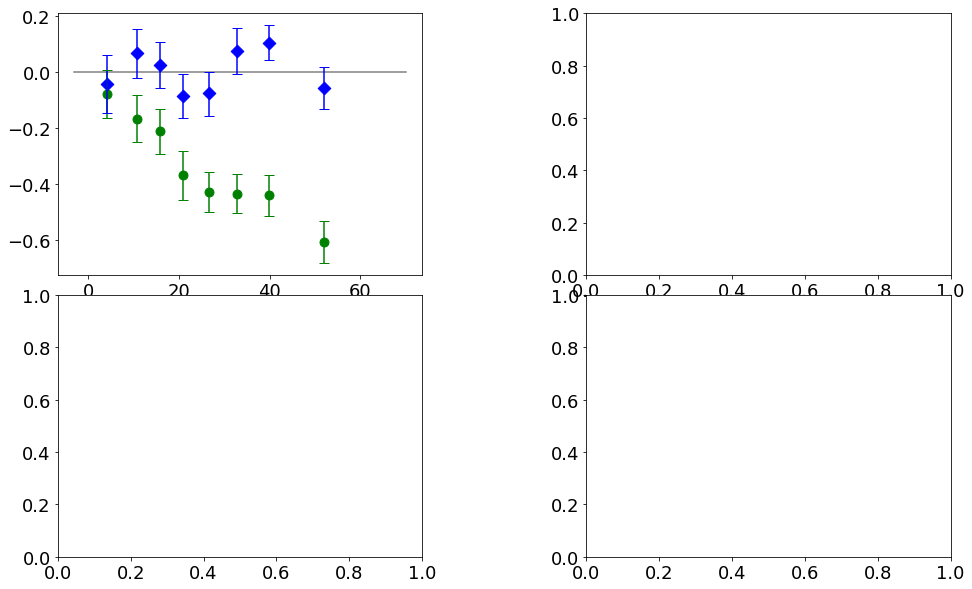

In [721]:
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(hspace=0.075,wspace=0.45)
ax[0,0].scatter(centers-offset,medsr_mcmc,color='green',label=r'Radial ($r$)',s=sz)
ax[0,0].errorbar(centers-offset,medsr_mcmc,yerr=(rerr_lo_mcmc,rerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--',label='')
ax[0,0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=1)

ax[0,0].scatter(centers2+offset,medst_mcmc,color='blue',label=r'Tangential ($\theta$)',marker='D',s=sz)
ax[0,0].errorbar(centers2+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0,1].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)
#####ax[0,1].scatter(centerslos+0*offset,vrot_mcmc,color='red',label='',marker='s',s=sz,zorder=1)
#####ax[0,1].errorbar(centerslos+0*offset,vrot_mcmc,yerr=(vrot_err_lo_mcmc,vrot_err_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)
#ax[0,1].scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',s=1)

ax[0,1].scatter(centerslos,unumpy.nominal_values(vrot_sin_theta),color='red',label='LOS',marker='s',s=sz,zorder=1)
ax[0,1].errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),yerr=(unumpy.std_devs(vrot_sin_theta_lo),unumpy.std_devs(vrot_sin_theta_hi)),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[0,0].plot(centers,np.polyfit(centers,medsr_mcmc,deg=1)[0]*centers + np.polyfit(centers,medsr_mcmc,deg=1)[1],color='green',linestyle='dotted',label='Best fit')
ax[0,0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--',label=r'Pred. $v_{r}$')

handles, lbls = ax[0,0].get_legend_handles_labels()

ax[0,0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)
#ax[0,0].legend((p0,p1),fontsize=16,loc=2)


ax[1,0].scatter(centerssr-offset,sigr_mcmc,color='green',label='',s=sz)
ax[1,0].errorbar(centerssr-offset,sigr_mcmc,yerr=(srerr_lo_mcmc,srerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)

ax[1,0].scatter(centersst+offset,sigt_mcmc,color='blue',label='',s=sz,marker='D')
ax[1,0].errorbar(centersst+offset,sigt_mcmc,yerr=(sterr_lo_mcmc,sterr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[1,1].scatter(centerslos+0*offset,siglos_mcmc,color='red',label='',s=sz,marker='s',zorder=1)
ax[1,1].errorbar(centerslos+0*offset,siglos_mcmc,yerr=(slerr_lo_mcmc,slerr_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

ax[1,0].plot([-3,70],[1.053,1.053],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,0].plot([-3,70],[1.053 - 0.052,1.053 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,0].plot([-3,70],[1.053 + 0.052,1.053 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0,1].plot([-3,70],[0.088,0.088],color='gray',linestyle='-',label=r'$v_{\rm rot}$')
#ax[0,1].plot([-3,70],[0.088+0.089,0.088+0.089],color='gray',linestyle='--',label='68% conf.')
#ax[0,1].plot([-3,70],[0.088-0.062,0.088-0.062],color='gray',linestyle='--')
#ax[0,1].plot([-3,70],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)],color='gray',linestyle='--',label=r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $')
ax[0,1].plot([-3,70],[0,0],color='gray')


ax[1,1].plot([-3,70],[1.053,1.053],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,1].plot([-3,70],[1.053 - 0.052,1.053 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,1].plot([-3,70],[1.053 + 0.052,1.053 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1,0].legend(fontsize=18,ncol=2)
ax[0,1].legend(fontsize=18,ncol=2)
ax[1,1].legend(fontsize=18,ncol=2)


ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
#ax[0,1].set_yticklabels([])
#ax[1,1].set_yticklabels([])


ax[0,0].set_xlim(-2,63)
ax[1,0].set_xlim(-2,63)
ax[0,1].set_xlim(-2,63)
ax[1,1].set_xlim(-2,63)

ax[0,0].set_ylim(-1.2,0.9)
###ax[0,1].set_ylim(-0.05,0.5)
ax[0,1].set_ylim(-0.55,0.4)


ax00 = plt.twinx(ax[0,0])
ax00.set_ylim(-1.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 0.9*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)


ax11 = plt.twinx(ax[1,0])
ax11.set_ylim(0.4*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 1.5*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)

ax[1,0].set_xlabel('$r$ [arcmin]')
ax[1,1].set_xlabel('$r$ [arcmin]')

ax[0,0].set_ylabel(r'$\langle v \rangle $ [km/s]')
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax[1,0].set_ylabel(r'$\sigma_{v} $ [km/s]')

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1,0].set_ylim(0.4,1.5)
ax[1,1].set_ylim(0.4,1.5)

ax[0,0].tick_params(axis='x',direction='in')
ax[0,1].tick_params(axis='x',direction='in')
ax[1,0].tick_params(axis='x',direction='in')
ax[1,1].tick_params(axis='x',direction='in')

ax[0,0].tick_params(axis='y',direction='in',right=False)
ax00.tick_params(axis='y',direction='in',right=True)
ax00.set_ylabel(r'$\langle \mu \rangle$ [mas/yr]',rotation=-90,labelpad=25)
ax[0,1].tick_params(axis='y',direction='in',right=True,left=True)
ax[1,0].tick_params(axis='y',direction='in',right=False)
ax[1,1].tick_params(axis='y',direction='in',right=True,left=True)
ax11.set_ylabel(r'$\sigma_{\mu}$ [mas/yr]',rotation=-90,labelpad=25)
ax11.tick_params(axis='y',direction='in',right=True)

#ax22 = plt.twinx(ax[0,1])
#ax22.scatter(centerslos,theta_mcmc,color='gold',marker='^')

ax[0,1].set_ylabel(r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $ [km/s]',labelpad=5)
ax[1,1].set_ylabel(r'$\sigma_{v} $ [km/s]')


#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_4boxes_mcmc_vsintheta.pdf',bbox_inches='tight')



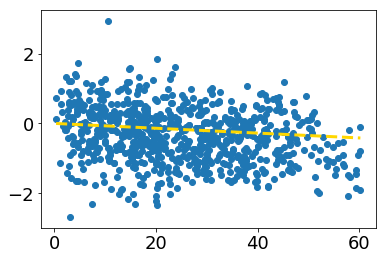

In [257]:
plt.scatter(rtTbl['r'],rtTbl['vr'])
plt.plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='gold',linestyle='--',label=r'Pred. $v_{r}$',linewidth=3)


In [244]:
pf_data

array([-0.01211102, -0.04141068])

In [1837]:
pf_data = np.polyfit(rtTbl['r'],rtTbl['mur'],deg=1)
pf_data

array([-0.00725203,  0.01453302])

In [1838]:
pf=np.polyfit(pred_rtTbl['r'],pred_rtTbl['pred_mur'],deg=1)
pf

array([-3.56412631e-03,  8.70261420e-18])

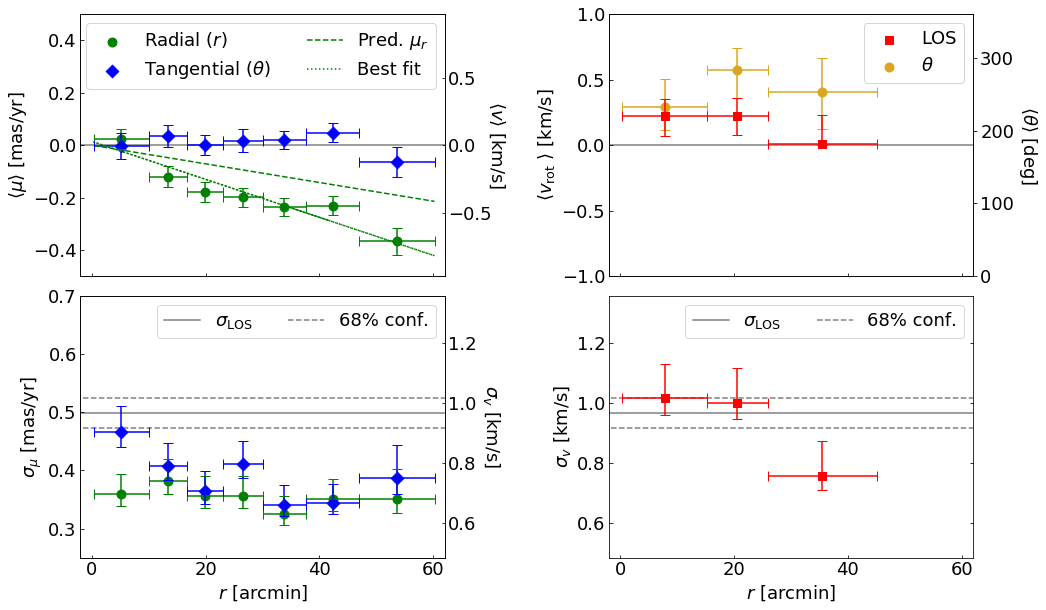

In [1954]:
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(hspace=0.075,wspace=0.45)
ax[0,0].scatter(centers-offset,medsr_mcmc/(4.74*cdist/1e3),color='green',label=r'Radial ($r$)',s=sz)
ax[0,0].errorbar(centers-offset,medsr_mcmc/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(rerr_lo_mcmc/(4.74*cdist/1e3),rerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--',label='')
ax[0,0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=1)

ax[0,0].plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $\mu_{r}$')
#ax[0,0].plot(centers,np.polyfit(centers,medsr_mcmc,deg=1)[0]*centers + np.polyfit(centers,medsr_mcmc,deg=1)[1],color='green',linestyle='dotted',label='Best fit')
ax[0,0].plot(rr,pf_data[0]*rr+pf_data[1],color='green',linestyle='dotted',label='Best fit')

ax[0,0].scatter(centers2+offset,medst_mcmc/(4.74*cdist/1e3),color='blue',label=r'Tangential ($\theta$)',marker='D',s=sz)
ax[0,0].errorbar(centers2+offset,medst_mcmc/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(terr_lo_mcmc/(4.74*cdist/1e3),terr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='blue',label='',capsize=cpsz)

#ax[0,0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--',label=r'Pred. $v_{r}$')


handles, lbls = ax[0,0].get_legend_handles_labels()

ax[0,0].legend((handles[-2],handles[-1],handles[0],handles[1]),(lbls[-2],lbls[-1],lbls[0],lbls[1]),fontsize=18,ncol=2)


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')
ax01 = plt.twinx(ax[0,1])
ax01.scatter(centerslos,theta_mcmc*180/np.pi,color='goldenrod',label=r'$\theta$',zorder=0,s=sz)
ax01.errorbar(centerslos,theta_mcmc*180/np.pi,xerr=(centerslos-edgeslos[:-1],edgeslos[1:]-centerslos),yerr=(theta_err_lo_mcmc*180/np.pi,theta_err_hi_mcmc*180/np.pi),color='goldenrod',label='',linestyle='none',capsize=cpsz,zorder=0)
ax01.set_ylim(0,360)
#ax[0,1].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)
ax[0,1].scatter(centerslos+0*offset,vrot_mcmc,color='red',label='LOS',marker='s',s=sz,zorder=2)
ax[0,1].errorbar(centerslos+0*offset,vrot_mcmc,xerr=(centerslos-edgeslos[:-1],edgeslos[1:]-centerslos),yerr=[[vrot_err_lo_mcmc[0],vrot_err_lo_mcmc[1],vrot_mcmc[-1]],vrot_err_hi_mcmc],linestyle='none',color='red',label='',zorder=2,capsize=cpsz)
#ax[0,1].scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',s=1)
ax[0,1].set_zorder(ax[0,1].get_zorder()+1)
ax[0,1].patch.set_visible(False)

#ax[0,1].scatter(centerslos,unumpy.nominal_values(vrot_sin_theta),color='pink',label='vrotsintheta',marker='s',s=sz,zorder=1)
#ax[0,1].errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),xerr=(centerslos-edgeslos[:-1],edgeslos[1:]-centerslos),yerr=(unumpy.std_devs(vrot_sin_theta_lo),unumpy.std_devs(vrot_sin_theta_hi)),linestyle='none',color='pink',label='',zorder=1,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0,0].legend((p0,p1),fontsize=16,loc=2)


ax[1,0].scatter(centerssr-offset,sigr_mcmc/(4.74*cdist/1e3),color='green',label='',s=sz)
ax[1,0].errorbar(centerssr-offset,sigr_mcmc/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(srerr_lo_mcmc/(4.74*cdist/1e3),srerr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='green',label='',capsize=cpsz)

ax[1,0].scatter(centersst+offset,sigt_mcmc/(4.74*cdist/1e3),color='blue',label='',s=sz,marker='D')
ax[1,0].errorbar(centersst+offset,sigt_mcmc/(4.74*cdist/1e3),xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(sterr_lo_mcmc/(4.74*cdist/1e3),sterr_hi_mcmc/(4.74*cdist/1e3)),linestyle='none',color='blue',label='',capsize=cpsz)

ax[1,1].scatter(centerslos+0*offset,siglos_mcmc,color='red',label='',s=sz,marker='s',zorder=1)
ax[1,1].errorbar(centerslos+0*offset,siglos_mcmc,xerr=(centerslos-edgeslos[:-1],edgeslos[1:]-centerslos),yerr=(slerr_lo_mcmc,slerr_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

ax[1,0].plot([-3,70],[0.966/(4.74*cdist/1e3),0.966/(4.74*cdist/1e3)],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,0].plot([-3,70],[0.966/(4.74*cdist/1e3) - 0.049/(4.74*cdist/1e3),0.966/(4.74*cdist/1e3) - 0.049/(4.74*cdist/1e3)],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,0].plot([-3,70],[0.966/(4.74*cdist/1e3) + 0.049/(4.74*cdist/1e3),0.966/(4.74*cdist/1e3) + 0.049/(4.74*cdist/1e3)],color='gray',linestyle='--',zorder=0)

#ax[0,1].plot([-3,70],[0.088,0.088],color='gray',linestyle='-',label=r'$v_{\rm rot}$')
#ax[0,1].plot([-3,70],[0.088+0.089,0.088+0.089],color='gray',linestyle='--',label='68% conf.')
#ax[0,1].plot([-3,70],[0.088-0.062,0.088-0.062],color='gray',linestyle='--')
#ax[0,1].plot([-3,70],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)],color='gray',linestyle='--',label=r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $')
ax[0,1].plot([-3,70],[0,0],color='gray',zorder=0)


ax[1,1].plot([-3,70],[0.966,0.966],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,1].plot([-3,70],[0.966 - 0.049,0.966 - 0.049],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,1].plot([-3,70],[0.966 + 0.049,0.966 + 0.049],color='gray',linestyle='--',zorder=0)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1,0].legend(fontsize=18,ncol=2)
hand1, lb1 = ax[0,1].get_legend_handles_labels()
hand2, lb2 = ax01.get_legend_handles_labels()
ax[0,1].legend((hand1[0],hand2[0]),(lb1[0],lb2[0]),fontsize=18,ncol=1)

#ax[0,1].legend(fontsize=18,ncol=1)
#ax01.legend()
ax[1,1].legend(fontsize=18,ncol=2)


ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
#ax[0,1].set_yticklabels([])
#ax[1,1].set_yticklabels([])


ax[0,0].set_xlim(-2,62)
ax[1,0].set_xlim(-2,62)
ax[0,1].set_xlim(-2,62)
ax[1,1].set_xlim(-2,62)

ax[0,0].set_ylim(-0.5,0.5)
###ax[0,1].set_ylim(-0.05,0.5)

#ax[0,1].set_ylim(-0.42,0.4)
ax[0,1].set_ylim(-1.0,1.0)



ax00 = plt.twinx(ax[0,0])
ax00.set_ylim(-1.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 0.9*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)
ax00.set_ylim(-0.5*4.74*cdist/1e3,0.5*4.74*cdist/1e3)

ax11 = plt.twinx(ax[1,0])
#ax11.set_ylim(0.4*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 1.5*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)
ax11.set_ylim(0.25*4.74*cdist/1e3,0.7*4.74*cdist/1e3)

ax[1,0].set_xlabel('$r$ [arcmin]')
ax[1,1].set_xlabel('$r$ [arcmin]')

ax00.set_ylabel(r'$\langle v \rangle $ [km/s]',rotation=-90,labelpad=15)
ax01.set_ylabel(r'$\langle \theta \rangle $ [deg]',rotation=-90,labelpad=25)
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax11.set_ylabel(r'$\sigma_{v} $ [km/s]',rotation=-90,labelpad=25)

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1,0].set_ylim(0.25,0.7)
ax[1,1].set_ylim(0.25*4.74*cdist/1e3,0.7*4.74*cdist/1e3)

ax[0,0].tick_params(axis='x',direction='in')
ax[0,1].tick_params(axis='x',direction='in')
ax[1,0].tick_params(axis='x',direction='in')
ax[1,1].tick_params(axis='x',direction='in')

ax[0,0].tick_params(axis='y',direction='in',right=False)
ax00.tick_params(axis='y',direction='in',right=True)
ax[0,0].set_ylabel(r'$\langle \mu \rangle$ [mas/yr]')
ax[0,1].tick_params(axis='y',direction='in',right=False,left=True)
ax[1,0].tick_params(axis='y',direction='in',right=False)
ax[1,1].tick_params(axis='y',direction='in',right=True,left=True)
ax[1,0].set_ylabel(r'$\sigma_{\mu}$ [mas/yr]')
ax11.tick_params(axis='y',direction='in',right=True)

#ax22 = plt.twinx(ax[0,1])
#ax22.scatter(centerslos,theta_mcmc,color='gold',marker='^')

#ax[0,1].set_ylabel(r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $ [km/s]',labelpad=5)
ax[0,1].set_ylabel(r'$\langle v_{\rm rot}\ \rangle $ [km/s]',labelpad=5)
ax[1,1].set_ylabel(r'$\sigma_{v} $ [km/s]')


fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_4boxes_update2.pdf',bbox_inches='tight')


In [1888]:
siglos_mcmc

array([1.01638335, 0.99930687, 0.7556106 ])

In [1873]:
hand1

Text(0,0.5,'$\\sigma_{v} $ [km/s]')

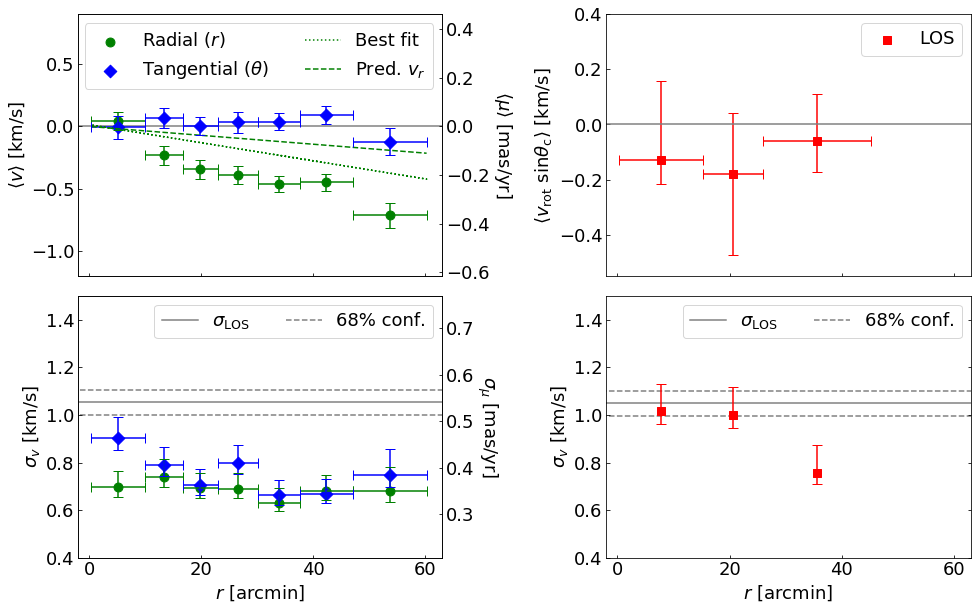

In [1871]:
offset = 0.
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(hspace=0.075,wspace=0.45)
ax[0,0].scatter(centers-offset,medsr_mcmc,color='green',label=r'Radial ($r$)',s=sz)
ax[0,0].errorbar(centers-offset,medsr_mcmc,xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(rerr_lo_mcmc,rerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--',label='')
ax[0,0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=1)

ax[0,0].plot(pred_rtTbl['r'],pf[0]*pred_rtTbl['r']+pf[1],color='green',linestyle='--',label=r'Pred. $v_{r}$')
#ax[0,0].plot(centers,np.polyfit(centers,medsr_mcmc,deg=1)[0]*centers + np.polyfit(centers,medsr_mcmc,deg=1)[1],color='green',linestyle='dotted',label='Best fit')
ax[0,0].plot(rr,pf_data[0]*rr+pf_data[1],color='green',linestyle='dotted',label='Best fit')

ax[0,0].scatter(centers2+offset,medst_mcmc,color='blue',label=r'Tangential ($\theta$)',marker='D',s=sz)
ax[0,0].errorbar(centers2+offset,medst_mcmc,xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

#ax[0,0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--',label=r'Pred. $v_{r}$')


handles, lbls = ax[0,0].get_legend_handles_labels()

ax[0,0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0,1].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)
#####ax[0,1].scatter(centerslos+0*offset,vrot_mcmc,color='red',label='',marker='s',s=sz,zorder=1)
#####ax[0,1].errorbar(centerslos+0*offset,vrot_mcmc,yerr=(vrot_err_lo_mcmc,vrot_err_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)
#ax[0,1].scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',s=1)

ax[0,1].scatter(centerslos,unumpy.nominal_values(vrot_sin_theta),color='red',label='LOS',marker='s',s=sz,zorder=1)
ax[0,1].errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),xerr=(centerslos-edgeslos[:-1],edgeslos[1:]-centerslos),yerr=(unumpy.std_devs(vrot_sin_theta_lo),unumpy.std_devs(vrot_sin_theta_hi)),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0,0].legend((p0,p1),fontsize=16,loc=2)


ax[1,0].scatter(centerssr-offset,sigr_mcmc,color='green',label='',s=sz)
ax[1,0].errorbar(centerssr-offset,sigr_mcmc,xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(srerr_lo_mcmc,srerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)

ax[1,0].scatter(centersst+offset,sigt_mcmc,color='blue',label='',s=sz,marker='D')
ax[1,0].errorbar(centersst+offset,sigt_mcmc,xerr=(centers-edges[:-1],edges[1:]-centers),yerr=(sterr_lo_mcmc,sterr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[1,1].scatter(centerslos+0*offset,siglos_mcmc,color='red',label='',s=sz,marker='s',zorder=1)
ax[1,1].errorbar(centerslos+0*offset,siglos_mcmc,yerr=(slerr_lo_mcmc,slerr_hi_mcmc),linestyle='none',color='red',label='',zorder=1,capsize=cpsz)

ax[1,0].plot([-3,70],[1.053,1.053],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,0].plot([-3,70],[1.053 - 0.052,1.053 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,0].plot([-3,70],[1.053 + 0.052,1.053 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0,1].plot([-3,70],[0.088,0.088],color='gray',linestyle='-',label=r'$v_{\rm rot}$')
#ax[0,1].plot([-3,70],[0.088+0.089,0.088+0.089],color='gray',linestyle='--',label='68% conf.')
#ax[0,1].plot([-3,70],[0.088-0.062,0.088-0.062],color='gray',linestyle='--')
#ax[0,1].plot([-3,70],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)],color='gray',linestyle='--',label=r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $')
ax[0,1].plot([-3,70],[0,0],color='gray')


ax[1,1].plot([-3,70],[1.048,1.048],color='gray',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1,1].plot([-3,70],[1.048 - 0.052,1.048 - 0.052],color='gray',linestyle='--',zorder=0,label='68% conf.')
ax[1,1].plot([-3,70],[1.048 + 0.052,1.048 + 0.052],color='gray',linestyle='--',zorder=0)

#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

ax[1,0].legend(fontsize=18,ncol=2)
ax[0,1].legend(fontsize=18,ncol=2)
ax[1,1].legend(fontsize=18,ncol=2)


ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
#ax[0,1].set_yticklabels([])
#ax[1,1].set_yticklabels([])


ax[0,0].set_xlim(-2,63)
ax[1,0].set_xlim(-2,63)
ax[0,1].set_xlim(-2,63)
ax[1,1].set_xlim(-2,63)

ax[0,0].set_ylim(-1.2,0.9)
###ax[0,1].set_ylim(-0.05,0.5)
ax[0,1].set_ylim(-0.55,0.4)


ax00 = plt.twinx(ax[0,0])
ax00.set_ylim(-1.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 0.9*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)


ax11 = plt.twinx(ax[1,0])
ax11.set_ylim(0.4*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 1.5*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)

ax[1,0].set_xlabel('$r$ [arcmin]')
ax[1,1].set_xlabel('$r$ [arcmin]')

ax[0,0].set_ylabel(r'$\langle v \rangle $ [km/s]')
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax[1,0].set_ylabel(r'$\sigma_{v} $ [km/s]')

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1,0].set_ylim(0.4,1.5)
ax[1,1].set_ylim(0.4,1.5)

ax[0,0].tick_params(axis='x',direction='in')
ax[0,1].tick_params(axis='x',direction='in')
ax[1,0].tick_params(axis='x',direction='in')
ax[1,1].tick_params(axis='x',direction='in')

ax[0,0].tick_params(axis='y',direction='in',right=False)
ax00.tick_params(axis='y',direction='in',right=True)
ax00.set_ylabel(r'$\langle \mu \rangle$ [mas/yr]',rotation=-90,labelpad=25)
ax[0,1].tick_params(axis='y',direction='in',right=False,left=True)
ax[1,0].tick_params(axis='y',direction='in',right=False)
ax[1,1].tick_params(axis='y',direction='in',right=True,left=True)
ax11.set_ylabel(r'$\sigma_{\mu}$ [mas/yr]',rotation=-90,labelpad=25)
ax11.tick_params(axis='y',direction='in',right=True)

#ax22 = plt.twinx(ax[0,1])
#ax22.scatter(centerslos,theta_mcmc,color='gold',marker='^')

ax[0,1].set_ylabel(r'$\langle v_{\rm rot}\ \sin \theta_{\rm c} \rangle $ [km/s]',labelpad=5)
ax[1,1].set_ylabel(r'$\sigma_{v} $ [km/s]')


#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_4boxes_mcmc_vsintheta.pdf',bbox_inches='tight')


In [ ]:
Table(data=[centers,])

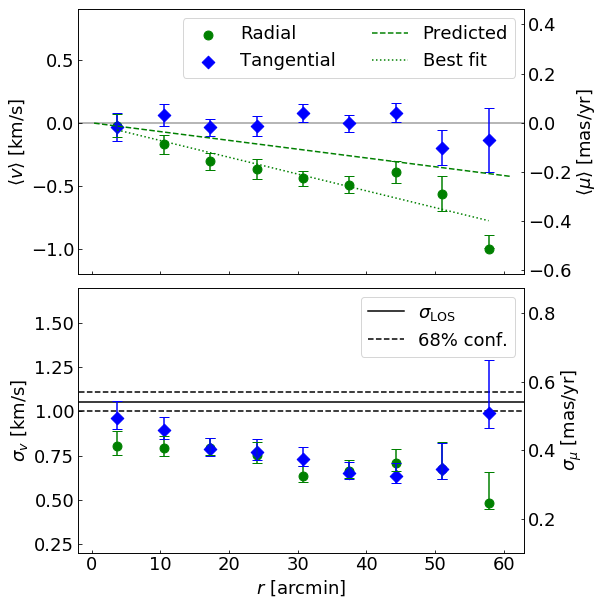

In [3578]:
offset = 0 #0.075
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.05)
ax[0].scatter(centers-offset,medsr_mcmc,color='green',label='Radial',s=sz)
ax[0].errorbar(centers-offset,medsr_mcmc,yerr=(rerr_lo_mcmc,rerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--',label='')
ax[0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)

ax[0].scatter(centers+offset,medst_mcmc,color='blue',label='Tangential',marker='D',s=sz)
ax[0].errorbar(centers+offset,medst_mcmc,yerr=(terr_lo_mcmc,terr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)
#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')



#ax[0,1].scatter(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',s=1)

#twinax = plt.twinx(ax[0])


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[0].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[1],color='green',linestyle='dotted',label='Best fit')
ax[0].plot(centers,np.polyfit(centers,medsr_mcmc,deg=1)[0]*centers + np.polyfit(centers,medsr_mcmc,deg=1)[1],color='green',linestyle='dotted',label='Best fit')

ax[0].plot(pred_rtTbl['r'],pred_rtTbl['pred_vr'],color='green',linestyle='--',label='Predicted')

handles, lbls = ax[0].get_legend_handles_labels()

ax[0].legend((handles[-2],handles[-1],handles[1],handles[0]),(lbls[-2],lbls[-1],lbls[1],lbls[0]),fontsize=18,ncol=2)
#ax[0,0].legend((p0,p1),fontsize=16,loc=2)


ax[1].scatter(centers-offset,sigr_mcmc,color='green',label='',s=sz)
ax[1].errorbar(centers-offset,sigr_mcmc,yerr=(srerr_lo_mcmc,srerr_hi_mcmc),linestyle='none',color='green',label='',capsize=cpsz)

ax[1].scatter(centers+offset,sigt_mcmc,color='blue',label='',s=sz,marker='D')
ax[1].errorbar(centers+offset,sigt_mcmc,yerr=(sterr_lo_mcmc,sterr_hi_mcmc),linestyle='none',color='blue',label='',capsize=cpsz)

ax[1].plot([-3,70],[1.053,1.053],color='black',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1].plot([-3,70],[1.053 - 0.050,1.053 - 0.050],color='black',linestyle='--',zorder=0,label='68% conf.')
ax[1].plot([-3,70],[1.053 + 0.054,1.053 + 0.054],color='black',linestyle='--',zorder=0)


#ax[0].plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1],color='blue',linestyle='--',label='')
#ax[1].plot(rtTbl['r'],np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[0]*rtTbl['r'] + np.polyfit(rtTbl['r'],rtTbl['vt'],deg=1)[1],color='blue',linestyle='--',label='')

#ax[1,0].legend(fontsize=16)
#ax[0].legend(fontsize=16)
ax[1].legend(fontsize=18)


ax[0].set_xticklabels([])
#ax[0,1].set_xticklabels([])
#ax[0,1].set_yticklabels([])
#ax[1,1].set_yticklabels([])


ax[0].set_xlim(-2,63)
ax[1].set_xlim(-2,63)
#ax[0,1].set_xlim(-2,63)
#ax[1,1].set_xlim(-2,63)

#ax[0].set_ylim(-2.1,2.1)
ax[0].set_ylim(-1.2,.9)

#ax[1].set_ylim(-0.5,0.5)

ax00 = plt.twinx(ax[0])
ax00.set_ylim(-1.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 0.9*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)


ax11 = plt.twinx(ax[1])
ax11.set_ylim(0.2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 1.7*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)

ax[1].set_xlabel('$r$ [arcmin]')
#ax[1,1].set_xlabel('$r$ [arcmin]')

ax[0].set_ylabel(r'$\langle v \rangle $ [km/s]')
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax[1].set_ylabel(r'$\sigma_{v} $ [km/s]')

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1].set_ylim(0.2,1.7)
#ax[1,1].set_ylim(0,2.1)

ax[0].tick_params(axis='x',direction='in')
ax[1].tick_params(axis='x',direction='in')
#ax[1,0].tick_params(axis='x',direction='in')
#ax[1,1].tick_params(axis='x',direction='in')

ax[0].tick_params(axis='y',direction='in',right=False)
ax00.tick_params(axis='y',direction='in',right=True)
ax00.set_ylabel(r'$\langle \mu \rangle$ [mas/yr]')
#ax[0].tick_params(axis='y',direction='in',right=True,left=True)
ax[1].tick_params(axis='y',direction='in',right=False)
#ax[1,1].tick_params(axis='y',direction='in',right=True,left=True)
ax11.set_ylabel(r'$\sigma_{\mu}$ [mas/yr]')
ax11.tick_params(axis='y',direction='in',right=True)




#fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_4boxes_predicted.pdf',bbox_inches='tight')
fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_2boxes_planeofsky.pdf',bbox_inches='tight')



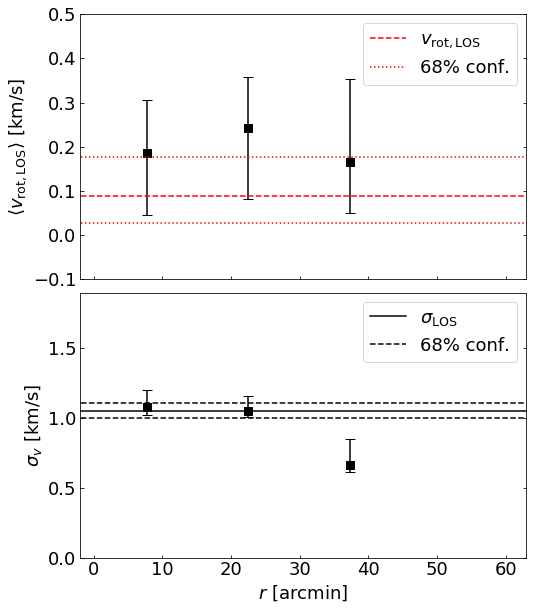

In [3579]:
offset = 0.75
sz=80
cpsz = 5

plt.rcParams['font.size']=18
#plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.05)
#ax[0].plot([-3,70],[0,0],color='gray',zorder=0,alpha=0.75)
###ax[0,1].scatter(centerslos+0*offset,vlos,color='black',label='LOS',marker='s',s=sz,zorder=1)
###ax[0,1].errorbar(centerslos+0*offset,vlos,yerr=slos,linestyle='none',color='black',label='',zorder=1,capsize=cpsz)
ax[0].scatter(centerslos, vrot_mcmc, color='black', label='', marker='s', s=sz,zorder=1)
ax[0].errorbar(centerslos,vrot_mcmc,yerr=(vrot_err_lo_mcmc, vrot_err_hi_mcmc),color='black',label='',zorder=1,capsize=cpsz,linestyle='none')
ax[0].plot([-3,70],[0.089,0.089],color='red',linestyle='--',label=r'$v_{\rm rot, LOS}$')
ax[0].plot([-3,70],[0.089+0.088,0.089+0.088],color='red',linestyle='dotted',label='68% conf.')
ax[0].plot([-3,70],[0.089-0.062,0.089-0.062],color='red',linestyle='dotted')


#ax[1].scatter(centerslos+0*offset,slos,color='black',label='',s=sz,marker='s',zorder=0)
#ax[1].errorbar(centerslos+0*offset,slos,yerr=sloserr,linestyle='none',color='black',label='',zorder=0,capsize=cpsz)

ax[1].scatter(centerslos,siglos_mcmc,color='black',label='',s=sz,marker='s',zorder=0)
ax[1].errorbar(centerslos,siglos_mcmc,yerr=(slerr_lo_mcmc,slerr_hi_mcmc),linestyle='none',color='black',label='',zorder=0,capsize=cpsz)

ax[1].plot([-3,70],[1.053,1.053],color='black',label=r'$\sigma_{\rm LOS}$',zorder=0)
ax[1].plot([-3,70],[1.053 - 0.050,1.053 - 0.050],color='black',linestyle='--',zorder=0,label='68% conf.')
ax[1].plot([-3,70],[1.053 + 0.054,1.053 + 0.054],color='black',linestyle='--',zorder=0)

ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)


ax[0].set_xlim(-2,63)
ax[1].set_xlim(-2,63)
#ax[0,1].set_xlim(-2,63)
#ax[1,1].set_xlim(-2,63)
ax[0].set_xticklabels([])

ax[0].set_ylim(-0.1,0.5)
ax[1].set_ylim(-0.5,0.5)

#ax00 = plt.twinx(ax[0,1])
#ax00.set_ylim(-2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 2*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)


#ax11 = plt.twinx(ax[1,1])
#ax11.set_ylim(0*1e3*206265*np.pi*1e7 / cdist / 3.086e+13, 2.1*1e3*206265*np.pi*1e7 / cdist / 3.086e+13)

ax[1].set_xlabel('$r$ [arcmin]')
#ax[1,1].set_xlabel('$r$ [arcmin]')

ax[0].set_ylabel(r'$\langle v_{\rm rot, LOS} \rangle $ [km/s]')
#ax[1,0].set_ylabel(r'$\sigma_{\mu} $ [km/s]')
ax[1].set_ylabel(r'$\sigma_{v} $ [km/s]')

#ax[1].set_ylabel(r'$\langle \sigma_{\mu} \rangle $ [km/s]')
ax[1].set_ylim(0,1.9)
#ax[1,1].set_ylim(0,2.1)

ax[0].tick_params(axis='x',direction='in')
ax[1].tick_params(axis='y',direction='in',right=True)
#ax[1,0].tick_params(axis='x',direction='in')
ax[1].tick_params(axis='x',direction='in')

ax[0].tick_params(axis='y',direction='in',right=True)

fig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/cluster_rot_2boxes_lineofsight.pdf',bbox_inches='tight')



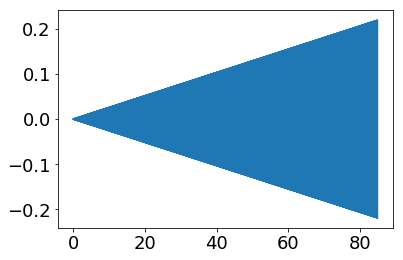

In [2540]:
plt.plot(pred_losTbl['r'],pred_losTbl['pred_vperp'])

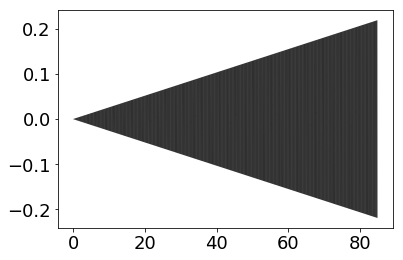

In [2544]:
plt.plot(pred_losTbl['r'],pred_losTbl['pred_vperp'],color='black',label='Predicted',linewidth=.1)


In [2181]:
handles

In [525]:
u_cdist

array(408.8999938964844+/-17.0, dtype=object)

In [2056]:
pred_rtTbl

<Table length=794>
         r                 pred_vr                  vt          
      float64              float64               float64        
------------------- --------------------- ----------------------
 0.3642673097700059  -0.01462271854535981  -0.004422603793781536
0.38962262994581826 -0.013769651147190263 -0.0019174925957168797
 1.0807344835236836 -0.043443664400561494  -0.012702958432973522
 1.3131634591768013  -0.05182890347675133  -0.015055422693187239
 1.4249527237400919  -0.09783115992842045   0.015491609215121216
  1.621232141470493  -0.06294420920335247   -0.01678024934044278
 1.6972769156626626  -0.09018631937421212    0.02829943564188665
  2.034815270656599  -0.07160210592646049 -0.0048447109746895065
  2.077510517885468  -0.07920318727907391  -0.019209175448445595
  2.304653982370778  -0.11872349867264703   -0.03842606977271712
                ...                   ...                    ...
  56.99297219735232   -2.1599878056849784     0.4840313154123838
 58.837996138017125   -2.9117972441655606    -0.9316342859799109
  59.14838951802378    -3.293955366260912    -0.8836430914520146
  59.33888187876564    -4.002422717023177    0.03345903445053762
 60.117626471150054    -3.754692938708614     0.5812031400678908
  60.39633446256752    -4.334481549011173    -0.1824974222212821
  60.44249214821853   -2.2918809646418943     0.5717168218985953
 60.460842088458314     -3.24377374627521    -0.9514895645959733
  60.74268853351287    -3.227681530574185    -0.9815842133154287
  61.18936508852272    -3.576853755404515    -0.9160394778012371

In [2025]:
np.polyfit(rtTbl['r'],rtTbl['vr'],deg=1)[0]

-0.01222494520178923

In [1874]:
Table(data=[mems['source_id'],rr.data,unumpy.nominal_values(u_vr).data,unumpy.std_devs(u_vr).data,unumpy.nominal_values(u_vt).data,unumpy.std_devs(u_vt)],names=['source_id','r_arcmin','v_r_kms','e_vr','v_t_kms','e_vt'])#.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperdata/rotfig/radial_tangential_vels.txt',format='ascii')



<Table length=794>
     source_id           r_arcmin      ...         e_vt        
       int64             float64       ...       float64       
------------------- ------------------ ... --------------------
5289889946066884480  39.27234371199014 ...  0.15601440850892528
5289891423535761920 44.046416254044516 ...  0.13110787141713004
5289894515912156544  38.50994597208075 ...  0.48776120474262674
5289873315953700608  50.06992494989875 ... 0.058606439908171715
5289872972356315520 50.466434411518804 ...  0.07599415970961769
5289930181318610432  56.74901661108766 ...  0.13961480403847712
5289891114297950336  35.90062852230441 ...  0.11489036401737099
5289885616739974016  45.07255255058814 ...   0.2741370554625948
5289886407013890688  43.61202857656857 ...   0.2871431104528913
5289888399878613376  44.04566575070517 ...  0.10248166022735378
                ...                ... ...                  ...
5291041031662188288  47.38842078803999 ...  0.14246013747467667
5291032132489758208 37.142050595054656 ...  0.08786378622242322
5291032888404680576  36.95722081305759 ...  0.15373570411395798
5291034194074141568   41.2041627420777 ...  0.08405498344183833
5291040103949259264    45.990547969573 ...  0.08416369416435523
5291028043680884096  33.04459497243422 ...   0.2504626232198829
5291052610893963264  47.63992345200364 ...  0.19107338805551627
5291028009321137664 32.559343909075935 ...  0.08486808256442838
5291035912061108992  38.64894907436234 ... 0.052338620523079415
5291032613526130048 35.817025124705694 ...  0.10330705429264904

In [1873]:
Table(data=[SSMgrv['source_id'],rr_rv,unumpy.nominal_values(u_vperp),unumpy.std_devs(u_vperp)],names=['source_id','r_arcmin','v_los_kms','e_v_los'])#.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperdata/rotfig/los_vels.txt',format='ascii')



<Table length=273>
     source_id           r_arcmin           v_los_kms            e_v_los      
       int64             float64             float64             float64      
------------------- ------------------ ------------------- -------------------
5290899881856756224  44.75926824591954  1.4399999999999977  0.2611814520898276
5290898816704856320 44.227433787905134   1.129999999999999  0.2611814520898276
5290912113923645952  43.70741202744589  1.2199999999999989  0.2611814520898276
5290706196007797760  43.22933795345165  0.8508220502999997 0.11451811893781333
5290898988503578112 40.959145372407335 -0.8200000000000003  0.3109915608432983
5290913900630098304  40.07644540369133 -0.5899999999999999  0.2611814520898276
5290701935405663744  40.79976025045965  0.7182308038000009  1.5827072038309622
5290894727896572160  37.68289792459483 -0.5600000000000023 0.28109740467629885
5290897541096022400  37.31024545908487 0.16999999999999815 0.28109740467629885
5290682693952246656  44.53300897107969  2.0579193453999984  0.4087710677802957
                ...                ...                 ...                 ...
5290755193001408128 25.512472964438796 -0.3200000000000003  0.2611814520898276
5290803051816290176 34.716229819421564  -1.120000000000001   6.250049259879137
5290758663334893440 26.089925734165707  1.3299999999999983  0.2611814520898276
5290774743692111232 30.058382796043787 -0.9100000000000001 0.46066880827309215
5290761098575269632  28.49726778713276 -0.5600000000000023 0.28109740467629885
5290760690559288064 30.244791909028468                0.75 0.28109740467629885
5290760342661729280 30.926558376593213   0.129999999999999 0.28109740467629885
5290784257039669632 33.802295011127555  -0.620000000000001 0.29105970335268144
5290784226980246912  36.39446489543875  0.4800000000000004 0.29105970335268144
5290028725050999296  37.98576053822886 -0.5700000000000003 0.28109740467629885

##### PLOT MULTIPLE AXES

In [201]:
np.std(vperp), np.std(SSMgrv['pRV'])

(1.1692007439917933, 0.6183334826648177)

In [202]:
np.mean(SSMgrv['pRV'])

0.41451172551221704

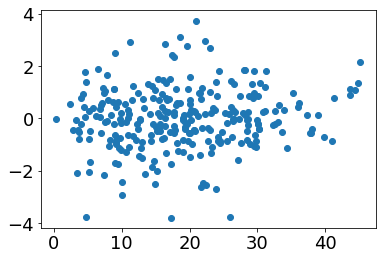

In [203]:
plt.scatter(rr_rv,vperp)

In [204]:
np.std(SSMgrv['RV'])

1.170438100180685

(array([ 3.,  7., 10., 40., 73., 75., 45., 10.,  9.,  1.]),
 array([19.91 , 20.673, 21.436, 22.199, 22.962, 23.725, 24.488, 25.251,
        26.014, 26.777, 27.54 ]),
 <a list of 10 Patch objects>)

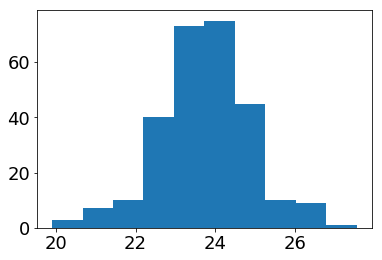

In [205]:
plt.hist(SSMgrv['RV'])

(array([ 3.,  7., 10., 40., 73., 75., 45., 10.,  9.,  1.]),
 array([-3.89 , -3.127, -2.364, -1.601, -0.838, -0.075,  0.688,  1.451,
         2.214,  2.977,  3.74 ]),
 <a list of 10 Patch objects>)

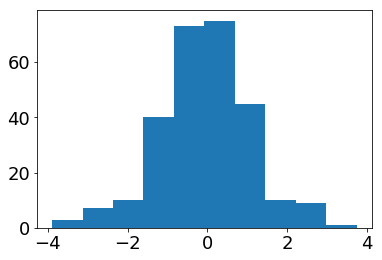

In [1724]:
plt.hist(vperp)

In [1722]:
np.std(np.abs(vperp))

0.7595690555598373

Text(0,0.5,'v_r [km/s]')

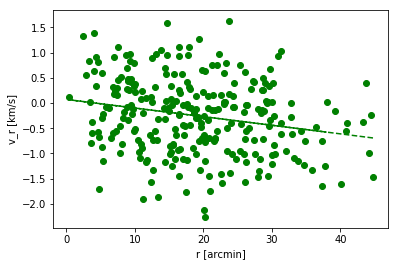

In [1390]:
plt.scatter(rr,unumpy.nominal_values(u_vr),color='green')
plt.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vr),deg=1)[1],color='green',linestyle='--')
plt.xlabel('r [arcmin]')
plt.ylabel('v_r [km/s]')

Text(0,0.5,'v_r [km/s]')

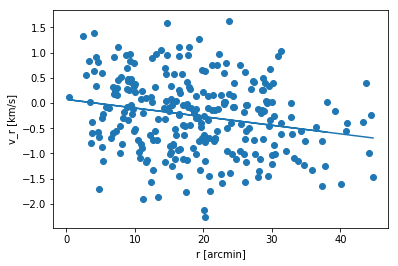

In [1316]:
plt.scatter(rr,vvrr)
plt.plot(rr,np.polyfit(rr,vvrr,deg=1)[0]*rr + np.polyfit(rr,vvrr,deg=1)[1])
plt.xlabel('r [arcmin]')
plt.ylabel('v_r [km/s]')

In [1228]:
np.mean(vvrr)

-0.2543463905514599

In [1229]:
np.mean(SSMgrv['pRV']/SSMgrv['RV'])

0.017457736190077382

In [1230]:
np.mean(np.std(SSMgrv['RV'])/SSMgrv['RV'])

0.04940326990027625

In [1250]:
#sqrt(sig^2 + err^2) = spread
#sig^2 = spread^2 - err^2

In [1252]:
np.std(vperp)

1.170438100180685

In [1253]:
np.mean(SSMgrv['pRV'])

0.41451172551221704

In [1256]:
np.sqrt(np.std(vperp)**2 - np.mean(SSMgrv['pRV'])**2)

1.0945799997110561

In [1257]:
#sigma_los = 1.1 km./s

In [1292]:
np.mean(vperp)

-0.05001965499633775

In [1294]:
np.mean(vvtt)

-0.014313243028336782

(array([22., 18., 22., 19., 25., 20., 34., 31., 41., 41.]),
 array([ 0.        ,  8.9974782 , 17.99495641, 26.99243461, 35.98991282,
        44.98739102, 53.98486923, 62.98234743, 71.97982564, 80.97730384,
        89.97478205]),
 <a list of 10 Patch objects>)

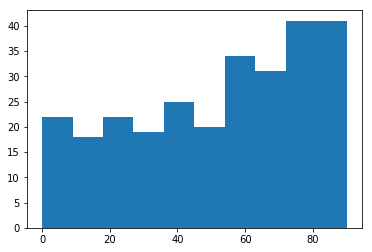

In [1304]:
plt.hist(np.abs((np.arctan(vperp/vvtt)) * 180/np.pi))

In [1306]:
np.mean(np.abs((np.arctan(vperp/vvtt)) * 180/np.pi))

51.81568459691188

In [1307]:
np.std(np.abs((np.arctan(vperp/vvtt)) * 180/np.pi))

26.40465791599453

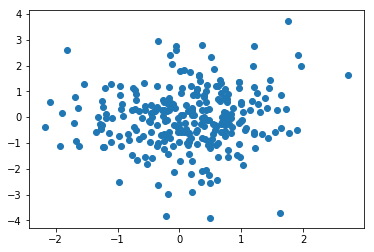

In [1300]:
plt.scatter(vx,vperp)

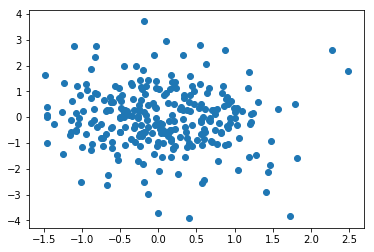

In [1276]:
plt.scatter(vy,vperp)

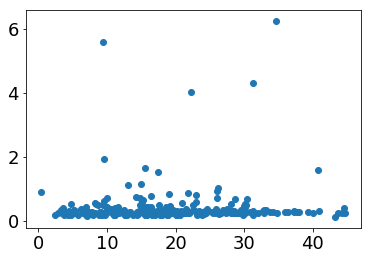

In [1726]:
plt.scatter(rr_rv,SSMgrv['pRV'])

(array([ 10.,  39.,  56., 101., 173., 180., 133.,  72.,  27.,   3.]),
 array([-2.53319854, -2.01073566, -1.48827278, -0.9658099 , -0.44334701,
         0.07911587,  0.60157875,  1.12404163,  1.64650452,  2.1689674 ,
         2.69143028]),
 <a list of 10 Patch objects>)

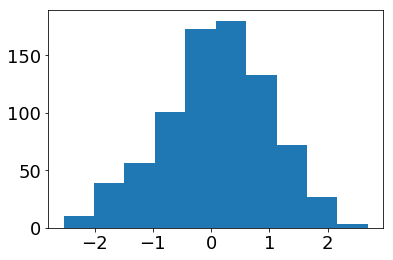

In [206]:
plt.hist(vx)

(array([  4.,   2.,  34., 134., 279., 205., 103.,  24.,   5.,   4.]),
 array([-2.9178039 , -2.31816634, -1.71852878, -1.11889121, -0.51925365,
         0.08038391,  0.68002147,  1.27965903,  1.8792966 ,  2.47893416,
         3.07857172]),
 <a list of 10 Patch objects>)

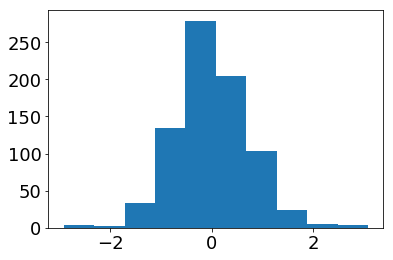

In [207]:
plt.hist(vy)

(array([ 3.,  7., 12., 40., 70., 73., 46., 12.,  8.,  2.]),
 array([-3.78833368, -3.035828  , -2.28332231, -1.53081662, -0.77831093,
        -0.02580524,  0.72670044,  1.47920613,  2.23171182,  2.98421751,
         3.7367232 ]),
 <a list of 10 Patch objects>)

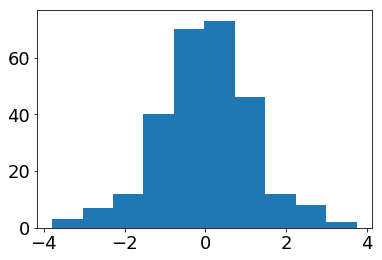

In [208]:
plt.hist(vperp)

In [1231]:
np.mean(vvrr)

-0.2543463905514599

In [1243]:
np.std(vvrr)

0.7429053429898443

In [1245]:
np.std(vvrr)/np.sqrt(len(vvrr))

0.044962676774421395

In [1232]:
np.polyfit(rr,vvrr,deg=1)[0]

-0.01708686834651063

In [1380]:
np.std(unumpy.nominal_values(u_vt)), np.median(unumpy.std_devs(u_vt))

(0.7899231900046518, 0.11820791547177487)

Text(0,0.5,'v_t [km/s]')

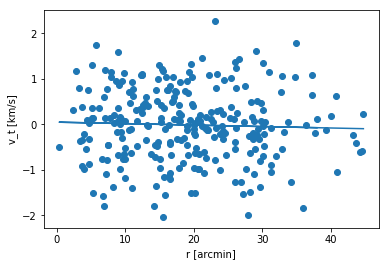

In [1382]:
plt.scatter(rr,unumpy.nominal_values(u_vt))
plt.plot(rr,np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[0]*rr + np.polyfit(rr,unumpy.nominal_values(u_vt),deg=1)[1])
plt.xlabel('r [arcmin]')
plt.ylabel('v_t [km/s]')

Text(0,0.5,'v_t [km/s]')

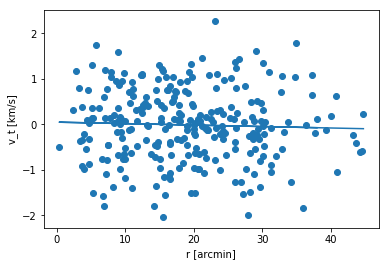

In [1233]:
plt.scatter(rr,vvtt)
plt.plot(rr,np.polyfit(rr,vvtt,deg=1)[0]*rr + np.polyfit(rr,vvtt,deg=1)[1])
plt.xlabel('r [arcmin]')
plt.ylabel('v_t [km/s]')

In [1234]:
polarTbl = Table(data=[rr,tt,vvrr,vvtt],names=['r','theta','vr','vt'])

In [1235]:
polarTbl.sort('r')

In [1236]:
np.mean(polarTbl['vt'])

-0.014313243028336772

In [1241]:
np.std(polarTbl['vt'])/np.sqrt(len(polarTbl))

0.04780832632843851

In [1237]:
np.polyfit(rr,vvtt,deg=1)[0]

-0.003211662540047091

In [1238]:
np.polyfit(rr/60*(np.pi/180),vvtt/(cdist*3.086e+13),deg=1)[0]

-8.749651659124226e-16

In [1239]:
#np.polyfit(rr,vvtt,deg=1)[0]/np.std(vperp)
np.abs(np.mean(vvtt)/np.std(vperp))

0.012228961981096817

In [1259]:
np.abs(np.mean(polarTbl['vt']) / np.sqrt(np.std(vperp)**2 - np.mean(SSMgrv['pRV'])**2))

0.013076470456353248

In [1267]:
np.sqrt(np.mean((SSMgrv['RV'] - np.mean(SSMgrv['RV']))**2))

1.170438100180685

Text(0,0.5,'v_los [km/s]')

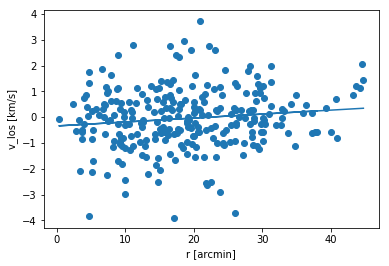

In [1247]:
plt.scatter(rr,vperp)
plt.plot(rr,np.polyfit(rr,vperp,deg=1)[0]*rr + np.polyfit(rr,vperp,deg=1)[1])
plt.xlabel('r [arcmin]')
plt.ylabel('v_los [km/s]')

In [1249]:
np.mean(vperp)

-0.05001965499633775

In [1248]:
np.polyfit(rr/60*(np.pi/180),vperp/(cdist*3.086e+13),deg=1)[0]

4.174963063880706e-15

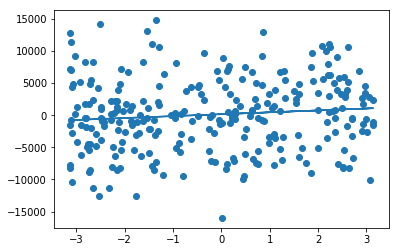

In [961]:
plt.scatter(tt,vvtt/np.median(vvtt))
plt.plot(tt,np.polyfit(tt,vvtt/np.median(vvtt),deg=1)[0]*tt + np.polyfit(tt,vvtt/np.median(vvtt),deg=1)[1])

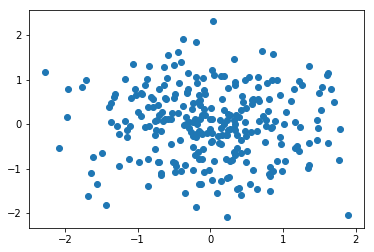

In [670]:
plt.scatter(vvrr/np.median(np.sqrt(vvrr**2+vvtt**2)),vvtt/np.median(np.sqrt(vvrr**2+vvtt**2)))

In [962]:
#SPHERICAL POLAR:
r = np.sqrt(x**2+y**2+z**2)
theta = np.arccos(z/r)
phi = np.arctan(y/x)


In [963]:
xyz_vecs = np.array([vx,vy,vz]).transpose()

In [964]:
transform=np.array([[np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)],
         [np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)],
         [-np.sin(phi), np.cos(phi), 0]])

In [965]:
rtp_vec = []
vr = []
vt = []
vp = []
for i in range(len(r)):
    xyz_vec = np.array([vx[i],vy[i],vz[i]]).transpose()
    
    x_vec = vx[i]
    y_vec = vy[i]
    z_vec = vz[i]
    
    vr += [np.sin(theta[i])*np.cos(phi[i])*x_vec + np.sin(theta[i])*np.sin(phi[i])*y_vec + np.cos(theta[i])*z_vec]
    vt += [np.cos(theta[i])*np.cos(phi[i])*x_vec + np.cos(theta[i])*np.sin(phi[i])*y_vec + -np.sin(theta[i])*z_vec]
    vp += [-np.sin(phi[i])*x_vec + np.cos(phi[i])*y_vec + 0*z_vec]

    
    transform=np.array([[np.sin(theta[i])*np.cos(phi[i]), np.sin(theta[i])*np.sin(phi[i]), np.cos(theta[i])],
         [np.cos(theta[i])*np.cos(phi[i]), np.cos(theta[i])*np.sin(phi[i]), -np.sin(theta[i])],
         [-np.sin(phi[i]), np.cos(phi[i]), 0]])
    matmul = np.matmul(transform,xyz_vec)
    rtp_vec += [matmul]
rtp_vec = np.array(rtp_vec)
vr = np.array(vr)
vt = np.array(vt)
vp = np.array(vp)


In [966]:
matmul

array([-0.51072016,  0.25339326,  0.11521462])

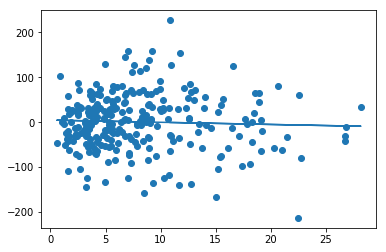

In [967]:
plt.scatter(r,vr/np.median(vr))
plt.plot(r,np.polyfit(r,vr/np.median(vr),deg=1)[0]*r + np.polyfit(r,vr/np.median(vr),deg=1)[1])

In [968]:
np.polyfit(r,vr,deg=1)[0]

-0.008637854581583938

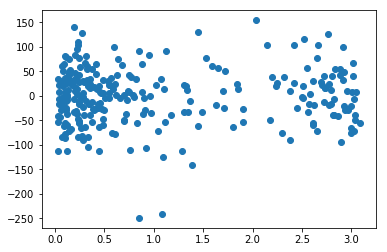

In [969]:
plt.scatter(theta,vt/np.median(vt))



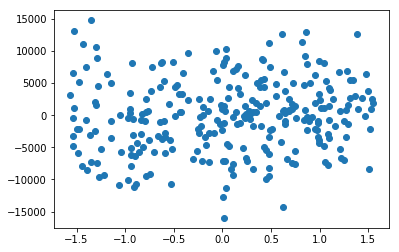

In [970]:
plt.scatter(phi,vp/np.median(vp))

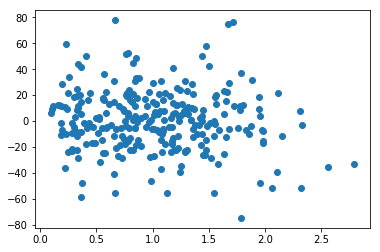

In [971]:
%matplotlib inline
plt.scatter(vtan/np.median(vtan),vperp/np.median(vperp))

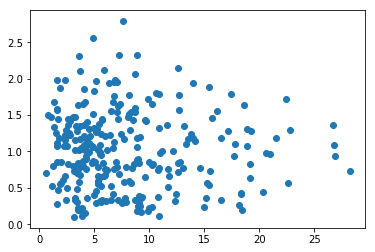

In [972]:
plt.scatter(rad_dist,vtan/np.median(vtan))

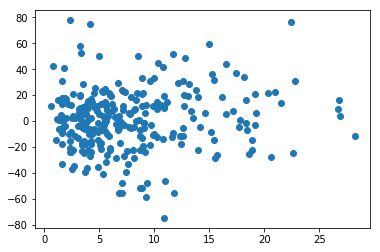

In [973]:
plt.scatter(rad_dist,vperp/np.median(vperp))

(-1, 1)

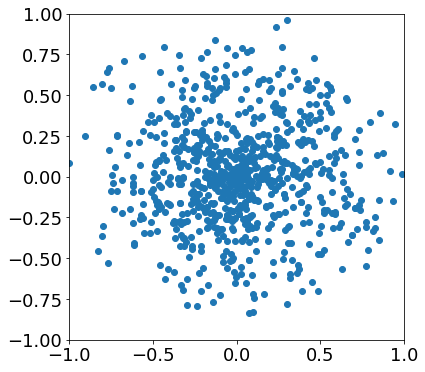

In [2652]:
plt.figure(figsize=(6,6))
plt.scatter(x/60,y/60)
#plt.scatter(mems['ra'],mems['dec'])
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.xlim(117,122)
#plt.ylim(-60.75-2.5,-60.75+2.5)

In [249]:
#eig = np.linalg.eig(np.cov((mems['ra']-cra,mems['dec']-cdec)))
eig = np.linalg.eig(np.cov((x/60 * (np.pi/180) ,y/60 * (np.pi/180))))

eig[0][0], eig[0][1] #lam1, lam2

(3.880189828395023e-05, 3.19798171333187e-05)

In [250]:
1-np.sqrt(eig[0][1]/eig[0][0]) #ellipticity

0.0921554273442956

In [251]:
v1 = eig[1][:,0]
v2 = eig[1][:,1] 
v1,v2

(array([0.99994487, 0.0105003 ]), array([-0.0105003 ,  0.99994487]))

In [252]:
np.matmul(np.cov((x/60 * (np.pi/180) ,y/60 * (np.pi/180))), v2) #A v1

array([-3.35797718e-07,  3.19780541e-05])

In [253]:
eig[0][0]*v1 #lam1 v1

array([3.87997591e-05, 4.07431626e-07])

In [254]:
eig[0][1] * v2

array([-3.35797718e-07,  3.19780541e-05])

In [255]:
#np.arctan(eig[1][0][1]/eig[1][0][0])*180/np.pi
np.arctan2(v1[1],v1[0])*180/np.pi
#np.arctan(v1[1]/v1[0])#*180/np.pi #rad, theta_0

0.6016340084278256

In [256]:
eig[1][:,0], eig[1][:,1] #v1, v2

(array([0.99994487, 0.0105003 ]), array([-0.0105003 ,  0.99994487]))

In [257]:
v1

array([0.99994487, 0.0105003 ])

(array([18., 20., 28., 19., 19., 27., 32., 27., 27., 17.]),
 array([0.02423732, 0.64962658, 1.27501584, 1.90040511, 2.52579437,
        3.15118363, 3.7765729 , 4.40196216, 5.02735142, 5.65274069,
        6.27812995]),
 <a list of 10 Patch objects>)

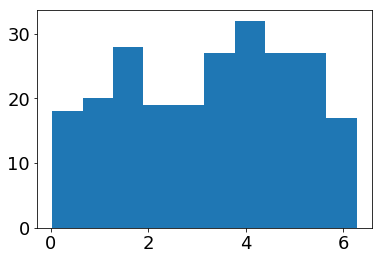

In [258]:
plt.hist(tt_rv) #theta_i

In [1429]:
trial_varr = np.arange(-100,100,0.01)

trial_v0 = np.arange(-1000,1000,0.01)
trial_vrot = np.arange(-1000,1000,0.01)
trial_siglos = np.arange(-100,100,0.01)
trial_posang = np.arange(-100,100,0.01)

#trial_gauss1 = lambda


gauss_lklhd = norm.pdf(trial_varr,loc=23.8,scale=0.75)
gauss_approx = norm.pdf(trial_varr,loc=vperp[0],scale=e_vperp[0])
t_lklhd = t.pdf(trial_varr,loc=vperp[0],scale=e_vperp[0],df=6)

print(vperp[0],e_vperp[0])

1.3713167492056122 0.26925824035672524


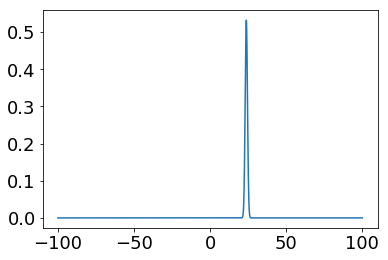

In [1430]:
plt.plot(trial_varr,gauss_lklhd)

In [1312]:
np.trapz(gauss_lklhd,trial_varr)

1.0000000000000002

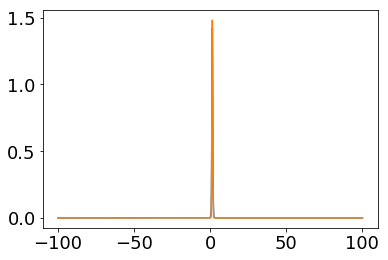

In [1313]:
plt.plot(trial_varr,t_lklhd)
plt.plot(trial_varr,gauss_approx)

In [1314]:
np.trapz(t_lklhd,trial_varr)

0.9999999999999745

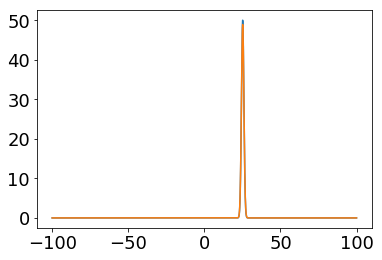

In [1319]:
plt.plot(trial_varr,np.convolve(gauss_lklhd,gauss_approx,mode='same'))
plt.plot(trial_varr,np.convolve(gauss_lklhd,t_lklhd,mode='same'))




In [1308]:
np.convolve(gauss_lklhd,t_lklhd,mode='same').shape

(10000,)

In [1304]:
np.sum(np.log(t.pdf(1,loc=vperp,scale=e_vperp,df=6)))

-1064.5322155547074

In [1335]:
gauss_lklhd_all = norm.pdf(trial_varr,loc=23.8,scale=0.75)
#gauss_approx = norm.pdf(trial_varr,loc=vperp[0],scale=e_vperp[0])
t_lklhd_all = t.pdf(trial_varr,loc=vperp[1],scale=e_vperp[1],df=6)

conv = np.convolve(gauss_lklhd_all,t_lklhd_all,mode='same')

(15, 35)

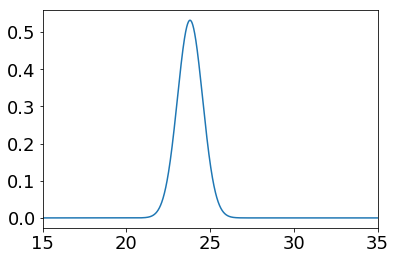

In [1336]:
plt.plot(trial_varr,gauss_lklhd_all)
plt.xlim(15,35)

(0, 2)

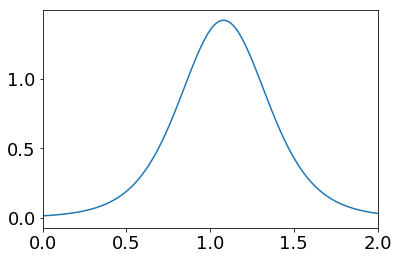

In [1339]:
plt.plot(trial_varr,t_lklhd_all)
plt.xlim(0,2)

In [1340]:
vperp[1]

1.0804398616565731

(15, 35)

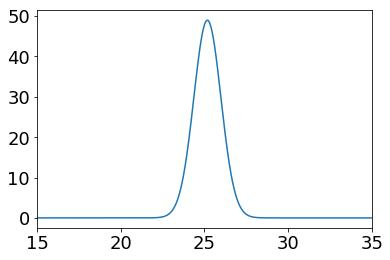

In [1328]:
plt.plot(trial_varr,conv)
plt.xlim(15,35)

(array([ 3.,  7., 12., 41., 69., 73., 46., 12.,  8.,  2.]),
 array([19.96201679, 20.71457146, 21.46712613, 22.21968079, 22.97223546,
        23.72479013, 24.4773448 , 25.22989947, 25.98245414, 26.7350088 ,
        27.48756347]),
 <a list of 10 Patch objects>)

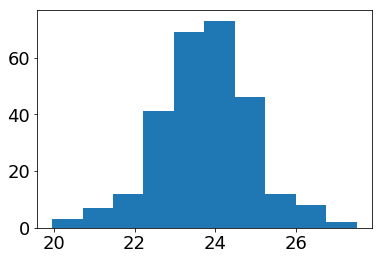

In [1350]:
plt.hist(vperp_plus)

In [1465]:
from scipy.ndimage import convolve1d


vc = 23.8 + 0.01 * np.sin(posangs[0] - 0)
siglos=1
gauss1 = norm.pdf(trial_varr,loc=0,scale=siglos)
gauss2 = norm.pdf(trial_varr,loc=0,scale=e_vperp[0])
t1 = t.pdf(trial_varr,loc=0,scale=e_vperp[0],df=6)
#conv = convolve1d(gauss1,gauss2)
conv = np.convolve(gauss1,t1,mode='same')
conv /= np.trapz(conv,trial_varr)


In [1459]:
t.pdf(trial_varr,loc=0,scale=e_vperp,df=6)

ValueError: operands could not be broadcast together with shapes (20000,) (273,) 

(-5, 5)

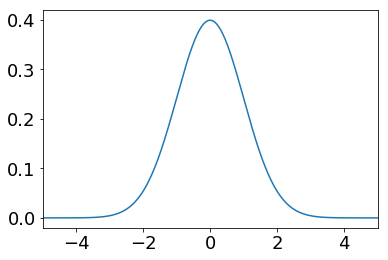

In [1449]:

plt.plot(trial_varr,gauss1)
plt.xlim(-5,5)

(-5, 5)

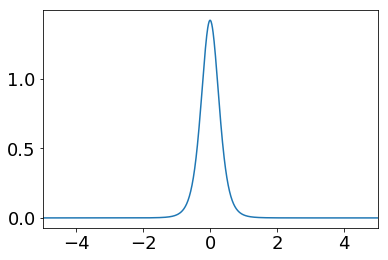

In [1448]:
plt.plot(trial_varr,t1)
plt.xlim(-5,5)

(-5, 5)

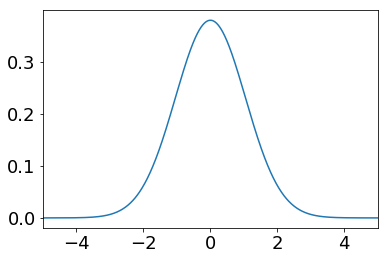

In [1467]:
plt.plot(trial_varr,conv)
#plt.plot(trial_varr,gauss1)
#plt.plot(trial_varr,t1)

plt.xlim(-5,5)

In [1472]:
np.interp(1,trial_varr,conv)


0.24328390468399894

In [1486]:
loglikes = np.zeros(len(vperp))
trial_varr = np.arange(-10,10,0.01)
for i in range(len(vperp)):
    vc = -1#v0 + vrot * np.sin(posangs[i] - posang_c)
    gauss1 = norm.pdf(trial_varr,loc=0,scale=siglos)
    gauss2 = norm.pdf(trial_varr,loc=0,scale=e_vperp[i])
    #t1 = t.pdf(trial_varr,loc=0,scale=e_vperp[i],df=6)
    conv = np.convolve(gauss1,t1,mode='same')
    conv /= np.trapz(conv,trial_varr)
    eval_conv = np.interp(vperp[i]-vc,trial_varr,conv)
    loglikes[i] = np.log(eval_conv)
np.sum(loglikes)

-549.9847762308749

In [1498]:
norm2 = norm(loc=0,scale=e_vperp)


In [1409]:
from scipy.signal import fftconvolve

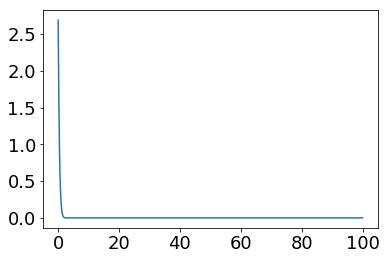

In [1410]:
plt.plot(trial_varr,fftconvolve(gauss1,gauss2,mode='same'))

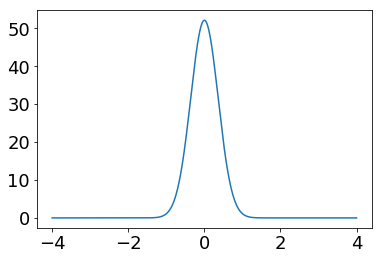

In [1414]:
plt.plot(xp,np.convolve(gauss1,gauss2,mode='same'))

In [113]:
import emcee
import corner
from scipy.optimize import minimize
#t.logpdf(1,loc=vperp[0],scale=e_vperp[0],df=6)
def log_likelihood(theta, vperp, e_vperp, posangs):
    posang_c, vrot, v0, siglos = theta
    vc = v0 + vrot * np.sin(posangs - posang_c)
    #vc = v0 + vrot * np.sin((posangs - posang_c)*np.pi/180)
    A = np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2))
    B = (vperp - vc)**2 / (2*(siglos**2 + e_vperp**2))
    #return #-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp - vc)**2 / (2*siglos**2 + e_vperp**2)))
    return -1 * np.sum(A + B)

#def log_likelihood(theta, vperp, e_vperp, posangs):
#    posang_c, vrot, v0, siglos = theta
#    loglikes = np.zeros(len(vperp))
#    trial_varr = np.arange(-10,10,0.01)
#    for i in range(len(vperp)):
#        vc = v0 + vrot * np.sin(posangs[i] - posang_c)
#        gauss1 = norm.pdf(trial_varr,loc=0,scale=siglos)
        #gauss2 = norm.pdf(trial_varr,loc=0,scale=e_vperp[i])
#        t1 = t.pdf(trial_varr,loc=0,scale=e_vperp[i],df=6)
        #conv = np.convolve(gauss1,gauss2,mode='same')
#        conv = np.convolve(gauss1,t1,mode='same')
#        conv /= np.trapz(conv,trial_varr)
#        eval_conv = np.interp(vperp[i]-vc,trial_varr,conv)
#        loglikes[i] = np.log(eval_conv)
#    return np.sum(loglikes)

    #A = np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2))
    #B = (vperp - vc)**2 / (2*(siglos**2 + e_vperp**2))
    #return #-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp - vc)**2 / (2*siglos**2 + e_vperp**2)))
    #return -1 * np.sum(A + B)

#def log_likelihood(theta, vperp, e_vperp, posangs):
#    posang_c, vrot, v0, siglos = theta
#    vc = v0 + vrot * np.sin(posangs - posang_c)
    
#    gauss_lklhd = norm.pdf(vc,loc=v0,scale=siglos)
#    t_lklhd = t.pdf(vc,loc=vperp,scale=e_vperp,df=6)
#    conv_lklhd = np.convolve(gauss_lklhd,t_lklhd,mode='same')
    #vc = v0 + vrot * np.sin((posangs - posang_c)*np.pi/180)
#    A = np.log(np.sqrt(2*np.pi*siglos**2))
#    B = (vperp - vc)**2 / (siglos**2)
#    C = t.logpdf(vc,loc=vperp,scale=e_vperp,df=6)
    #C = t.logpdf(vc,loc=vperp,scale=np.sqrt(siglos**2+e_vperp**2),df=6)
    #return np.sum(C)
 #   return np.sum(np.log(conv_lklhd))

    #return #-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp - vc)**2 / (2*siglos**2 + e_vperp**2)))
#    return -0.5 * np.sum(A + B) + np.sum(C)
    
def log_prior(theta):
    posang_c, vrot, v0, siglos = theta
    #if -np.pi <= posang_c <= np.pi and 0 <= vrot <= 1. and 20 <= v0 <= 30 and 0 <= siglos <= 5:
    #if 0 <= posang_c < 2*np.pi and 0 <= vrot <= 3. and 15 <= v0 <= 35 and 0 <= siglos <= 5:
    if 6.27675914-np.pi <= posang_c < 6.27675914+np.pi and 0 <= vrot <= 3. and 15 <= v0 <= 35 and 0 <= siglos <= 5:
    
    #if 0 <= vrot <= 3. and 15 <= v0 <= 35 and 0 <= siglos <= 5:
        lp = 0
    else:
        lp = -np.inf

        #return 0.0
        #lp = 0
    
    #GAUSS PRIOR ON THETA
    #mn= 6.3
    #sgma = 1.3
    #lp -= 0.5*((posang_c - mn)/sgma)**2
    
    #if 0 <= posang_c < np.pi and -3 <= vrot <= 3. and 15 <= v0 <= 35 and 0 < siglos <= 5:
    #if -180 <= posang_c <= 180 and 0. <= vrot <= 1. and 20 <= v0 <= 30 and 0 <= siglos <= 5:
    #return -np.inf
    return lp


def log_probability(theta, vperp, e_vperp, posangs):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, vperp, e_vperp, posangs)
###################################################################
def log_likelihood_r(theta, vrad, e_vrad):
    v0_r, sigr = theta
    vc = v0_r #+ vrot * np.sin(posangs - posang_c)
    #vc = v0 + vrot * np.sin((posangs - posang_c)*np.pi/180)
    A = np.log(2*np.pi*np.sqrt(sigr**2 + e_vrad**2))
    B = (vrad - vc)**2 / (2*(sigr**2 + e_vrad**2))
    #return #-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp - vc)**2 / (2*siglos**2 + e_vperp**2)))
    return -1 * np.sum(A + B)
    
def log_prior_r(theta):
    v0_r, sigr = theta
    if -5 <= v0_r <= 5 and 0 <= sigr <= 5:
    #if -180 <= posang_c <= 180 and 0. <= vrot <= 1. and 20 <= v0 <= 30 and 0 <= siglos <= 5:
        return 0.0
    return -np.inf

def log_probability_r(theta, vrad, e_vrad):
    lp = log_prior_r(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_r(theta, vrad, e_vrad)

def log_likelihood_t(theta, vtan, e_vtan):
    v0_t, sigt = theta
    vc = v0_t #+ vrot * np.sin(posangs - posang_c)
    #vc = v0 + vrot * np.sin((posangs - posang_c)*np.pi/180)
    A = np.log(2*np.pi*np.sqrt(sigt**2 + e_vtan**2))
    B = (vtan - vc)**2 / (2*(sigt**2 + e_vtan**2))
    #return #-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp - vc)**2 / (2*siglos**2 + e_vperp**2)))
    return -1 * np.sum(A + B)
    
def log_prior_t(theta):
    v0_t, sigt = theta
    if -5 <= v0_t <= 5 and 0 <= sigt <= 5:
    #if -180 <= posang_c <= 180 and 0. <= vrot <= 1. and 20 <= v0 <= 30 and 0 <= siglos <= 5:
        return 0.0
    return -np.inf

def log_probability_t(theta, vtan, e_vtan):
    lp = log_prior_t(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_r(theta, vtan, e_vtan)

posang_c_true = 4.483 #-0.016342781150228823 #-0.9363723854140685
#vrot_true = 0.05
vrot_true=0
v0_true = 23.75
#siglos_true = 1.1
siglos_true = 0.8

sigr_true = 0.8
sigt_true = 0.8
vr_true = -0.345
vt_true = 0

vperp_plus = unumpy.nominal_values(u_vperp) + 23.75
e_vperp = unumpy.std_devs(u_vperp)
posangs = tt_rv #+np.pi#$tt_rv#*180/np.pi

vrad_plus = unumpy.nominal_values(u_vr)#+23.8
vtan_plus = unumpy.nominal_values(u_vt)
e_vrad = unumpy.std_devs(u_vr)
e_vtan = unumpy.std_devs(u_vt)
#posangs = 2*np.pi - tt_rv#*180/np.pi

vrad_plus = unumpy.nominal_values(u_vr_mu) *(4.74*cdist/1e3)
vtan_plus = unumpy.nominal_values(u_vt_mu)  *4.74*cdist/1e3
e_vrad = unumpy.std_devs(u_vr_mu) *4.74*cdist/1e3
e_vtan = unumpy.std_devs(u_vr_mu) *4.74*cdist/1e3

In [1233]:
np.sum(t.logpdf(vc,loc=vperp,scale=e_vperp,df=6))

-1063.9203337568024

In [114]:
e_vrad/vrad_plus

<Column name='dec' dtype='float64' length=535>
  0.18876557353228837
   0.3436194355713343
 -0.20430267903166913
   -0.562239032578109
 -0.22491820896241574
  0.14689215182790738
 -0.09527999925255362
  -0.1472030513559493
   2.2660459902649395
 -0.17103824320012354
  -0.5854586635010054
-0.055726040939367436
                  ...
    5.029295859931706
    4.509894908028231
  -0.1690903798596076
      -2.485345371641
  -0.6994994986648577
  -0.5400907154228138
  -0.3317163382896105
  -0.7688046668192918
  -0.8143738329913026
   1.0115622000552542
  -0.3039587253227471
   -2.828114932553125

In [243]:
unumpy.std_devs(u_vr_mu)/unumpy.nominal_values(u_vr_mu)

<Column name='dec' dtype='float64' length=535>
  0.1887655735322884
 0.34361943557133434
-0.20430267903166913
  -0.562239032578109
-0.22491820896241574
 0.14689215182790738
-0.09527999925255361
-0.14720305135594927
  2.2660459902649395
-0.17103824320012356
 -0.5854586635010054
-0.05572604093936744
                 ...
   5.029295859931706
   4.509894908028232
 -0.1690903798596076
     -2.485345371641
 -0.6994994986648577
 -0.5400907154228138
-0.33171633828961045
 -0.7688046668192919
 -0.8143738329913026
  1.0115622000552542
-0.30395872532274704
 -2.8281149325531256

In [244]:
#vperp = vperp - 23.8

(array([ 7.,  3., 12., 40., 53., 54., 36., 15.,  7.,  7.]),
 array([20.82463641, 21.41395904, 22.00328167, 22.59260431, 23.18192694,
        23.77124957, 24.3605722 , 24.94989483, 25.53921747, 26.1285401 ,
        26.71786273]),
 <a list of 10 Patch objects>)

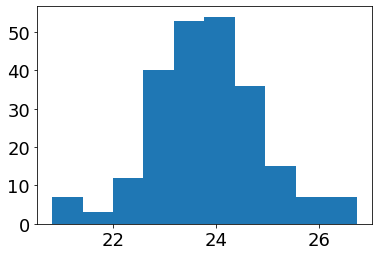

In [115]:
plt.hist(vperp_plus)

In [246]:
np.std(vperp_plus)

1.064053694117861

In [247]:
np.mean(e_vperp)

0.41683335145527606

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
0
1
2
3
4
5
6
7
8


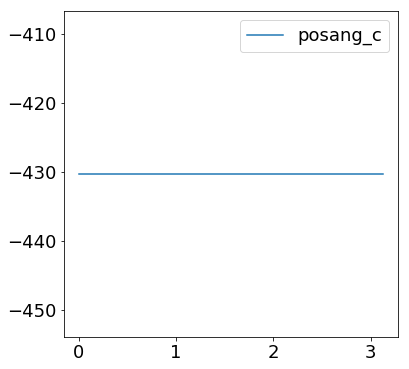

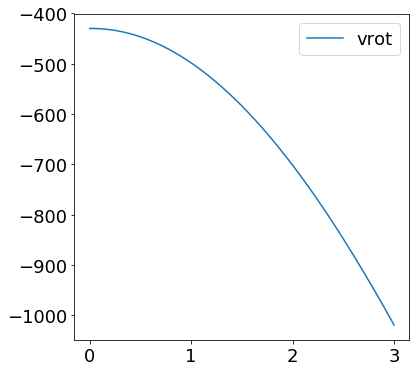

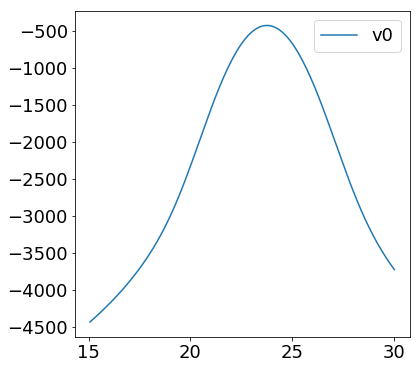

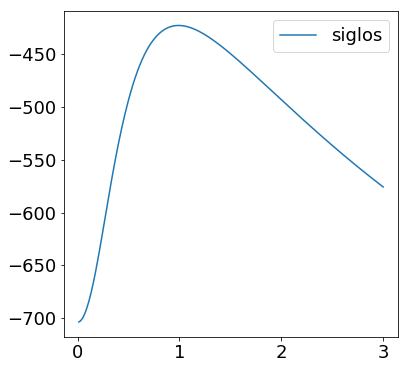

In [1520]:
#posang_c_arr = np.linspace(-180,180,273)
posang_c_arr = np.linspace(0,np.pi,273)
vrot_arr = np.linspace(0,3,273)
v0_arr = np.linspace(2,30,273)
siglos_arr = np.linspace(0,3,273)

plt.figure(figsize=(6,6))
lglk1 = []
for i in range(len(vperp)):
    print(i)
    lglk1 += [log_probability((posang_c_arr[i],vrot_true,v0_true,siglos_true),vperp_plus,e_vperp,posangs)]
plt.plot(posang_c_arr,lglk1,label='posang_c')
plt.legend()

plt.figure(figsize=(6,6))
lglk2 = []
for i in range(len(vperp)):
    print(i)
    lglk2 += [log_probability((posang_c_true,vrot_arr[i],v0_true,siglos_true),vperp_plus,e_vperp,posangs)]
plt.plot(vrot_arr,lglk2,label='vrot')
plt.legend()

plt.figure(figsize=(6,6))
lglk3 = []
for i in range(len(vperp)):
    print(i)
    lglk3 += [log_probability((posang_c_true,vrot_true,v0_arr[i],siglos_true),vperp_plus,e_vperp,posangs)]
plt.plot(v0_arr,lglk3,label='v0')
plt.legend()

plt.figure(figsize=(6,6))
lglk4 = []
for i in range(len(vperp)):
    print(i)
    lglk4 += [log_probability((posang_c_true,vrot_true,v0_true,siglos_arr[i]),vperp_plus,e_vperp,posangs)]
plt.plot(siglos_arr,lglk4,label='siglos')
plt.legend()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  9., 11., 13., 13.,  9.,  7.,
         1.,  5.]),
 array([19.9653695 , 20.36235968, 20.75934986, 21.15634004, 21.55333021,
        21.95032039, 22.34731057, 22.74430075, 23.14129093, 23.5382811 ,
        23.93527128, 24.33226146, 24.72925164, 25.12624181, 25.52323199,
        25.92022217]),
 <a list of 15 Patch objects>)

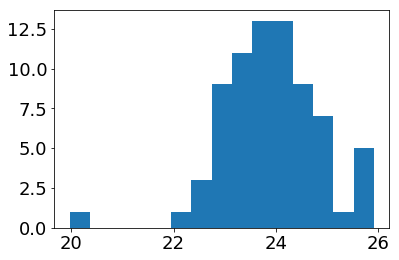

In [1588]:
plt.hist(vperp_plus[los_indx3],bins=15)

(array([ 3.,  1.,  6.,  6., 13., 34., 44., 56., 42., 34., 16.,  8.,  4.,
         5.,  1.]),
 array([19.96201679, 20.4637199 , 20.96542301, 21.46712613, 21.96882924,
        22.47053235, 22.97223546, 23.47393857, 23.97564169, 24.4773448 ,
        24.97904791, 25.48075102, 25.98245414, 26.48415725, 26.98586036,
        27.48756347]),
 <a list of 15 Patch objects>)

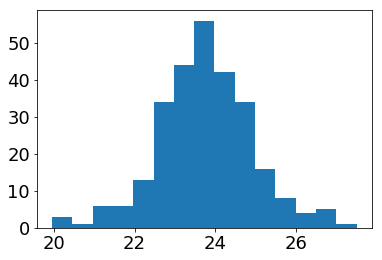

In [1587]:
plt.hist(vperp_plus,bins=15)

In [3158]:
vc = 23.75 + 2 * np.sin(posangs - 0.01)
#print(vc)
-np.sum(np.log(2*np.pi*np.sqrt(siglos**2 + e_vperp**2)) - ((vperp_plus - vc)**2 / (2*(siglos**2 + e_vperp**2))))

-243.32041331247285

NameError: name 'vc' is not defined

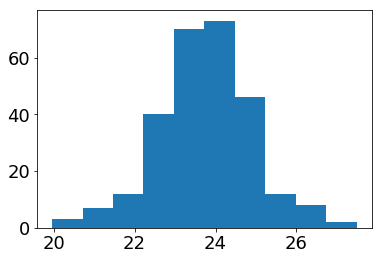

In [222]:
plt.hist(vperp_plus)
plt.hist(vc)

(array([ 8., 11., 30., 46., 60., 45., 38., 24.,  6.,  5.]),
 array([-4.50122616, -3.54977482, -2.59832347, -1.64687213, -0.69542079,
         0.25603055,  1.20748189,  2.15893324,  3.11038458,  4.06183592,
         5.01328726]),
 <a list of 10 Patch objects>)

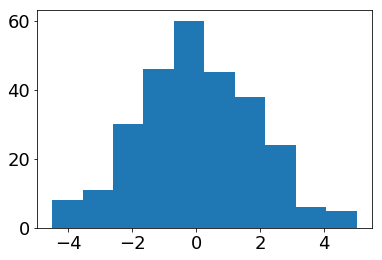

In [3312]:
plt.hist(vperp_plus-vc)

In [3248]:
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([posang_c_true, vrot_true, v0_true, siglos_true]) #+ 0.0000001 * np.random.randn(4)
soln = minimize(nll, initial, args=(vperp_plus, e_vperp, posangs),bounds=((-np.pi, np.pi),(0,1),(0,50),(.5,2)))
#soln = minimize(nll, initial, args=(vperp, e_vperp, posangs),bounds=((-180, 180),(0,1),(0,50),(.5,2)))
posang_c_ml, vrot_ml, v0_ml, siglos_ml = soln.x

In [3313]:
like = []
for i in range(10):
    #like += [log_likelihood((posang_c_true,vrot_true,v0_true,siglos_true*i/4),vperp, e_vperp, posangs)]
    #print(siglos_true*i/4,like[i])
    
    like += [log_likelihood((posang_c_true,(vrot_true+3)*i/4,v0_true,siglos_true),vperp_plus, e_vperp, posangs)]
    print(v0_true*i/4,like[i])
print()
print(np.argmin(like))

0.0 -676.77919158437
5.95 -702.0187865103053
11.9 -779.9948249367872
17.85 -910.7073068638156
23.8 -1094.1562322913906
29.75 -1330.3416012195123
35.7 -1619.26341364818
41.65 -1960.9216695773948
47.6 -2355.3163690071565
53.550000000000004 -2802.4475119374647

9


In [3708]:
posang_c_ml*180/np.pi, vrot_ml, v0_ml, siglos_ml

(-88.69603809482676, 0.1015535770488954, 23.7549516877657, 1.042513199444835)

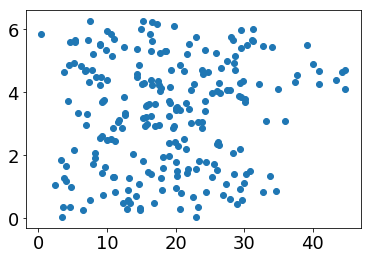

In [260]:
plt.scatter(rr_rv,tt_rv)

In [116]:
startvals = np.array([posang_c_true,vrot_true,v0_true,siglos_true])
startvals_r = np.array([vr_true,sigr_true])
startvals_t = np.array([vt_true,sigt_true])

startvals

array([ 4.483,  0.   , 23.75 ,  0.8  ])

In [117]:
labels_r = ["v0_r","sig_r"]
labels_t = ["v0_t","sig_t"]

In [225]:
#plt.hist(vperp - (v0_true + vrot_true * np.sin((posangs - posang_c_true)*(np.pi/180))))

In [226]:
startvals[0]*180/np.pi

360.0

In [118]:
vrad_plus

<Column name='dec' dtype='float64' length=535>
  0.7758485074290521
 0.36676901532080824
 -0.6893895507984504
 -0.2197785490858162
  -0.424714738976739
  1.3788097355430347
  -1.323495952581219
 -0.7672525953132587
 0.03813417541569185
 -0.7959236279288271
 -0.1353007849367523
 -1.4148061624092723
                 ...
 0.07246674697340655
 0.11463706261496924
 -1.7619617234534213
-0.14623047676796316
 -0.6861885401818326
 -0.9006705848952271
 -1.2577062386444349
 -0.5335765650813536
  -0.522076262765824
 0.38824222042464496
 -1.3693049972500617
-0.12711484113137955

In [135]:
pos_r = startvals_r + 1e-4 * np.random.randn(100, 2)
nwalkers, ndim = pos_r.shape

bnz = len(centers)

medsr_mcmc = np.zeros(bnz)
rerr_lo_mcmc = np.zeros(bnz)
rerr_hi_mcmc = np.zeros(bnz)

sigr_mcmc = np.zeros(bnz)
srerr_lo_mcmc = np.zeros(bnz)
srerr_hi_mcmc = np.zeros(bnz)

for i in range(bnz):
    rindx = (rr > edges[i]) & (rr < edges[i+1])
    
    sampler_r = emcee.EnsembleSampler(nwalkers, ndim, log_probability_r, args=(vrad_plus[rindx],e_vrad[rindx]))
    sampler_r.run_mcmc(pos_r, 5000, progress=True);
    
    maxprob_indx = np.argmax(sampler_r.get_log_prob(discard=500, thin=15, flat=True))
    flat_samples_r = sampler_r.get_chain(discard=500, thin=15, flat=True)

   #medsr_mcmc[i] = flat_samples_r[maxprob_indx,0]
    medsr_mcmc[i] = np.percentile(flat_samples_r[:,0],50)

    rerr_lo_mcmc[i] = medsr_mcmc[i] - np.percentile(flat_samples_r[:,0], 16)
    rerr_hi_mcmc[i] = np.percentile(flat_samples_r[:,0], 84) - medsr_mcmc[i]


    sigr_mcmc[i] = flat_samples_r[maxprob_indx,1]
    srerr_lo_mcmc[i] = sigr_mcmc[i] - np.percentile(flat_samples_r[:,1], 16)
    srerr_hi_mcmc[i] = np.percentile(flat_samples_r[:,1], 84) - sigr_mcmc[i]


100%|██████████| 5000/5000 [02:06<00:00, 39.59it/s]


<ErrorbarContainer object of 3 artists>

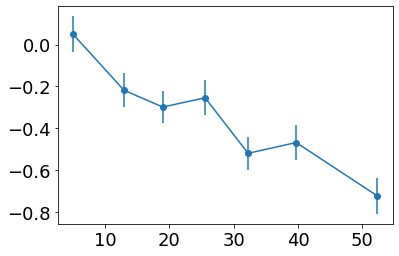

In [137]:
plt.scatter(centers,medsr_mcmc)
plt.errorbar(centers,medsr_mcmc,yerr=[rerr_lo_mcmc,rerr_hi_mcmc])

<Container object of 3 artists>

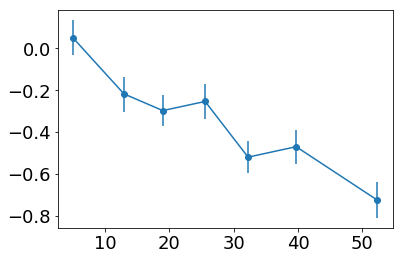

In [345]:
plt.scatter(centers,medsr_mcmc)
plt.errorbar(centers,medsr_mcmc,yerr=[rerr_lo_mcmc,rerr_hi_mcmc])

<ErrorbarContainer object of 3 artists>

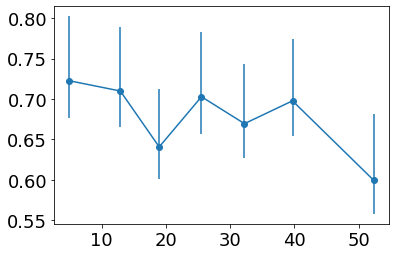

In [138]:
plt.scatter(centers,sigr_mcmc)
plt.errorbar(centers,sigr_mcmc,yerr=[srerr_lo_mcmc,srerr_hi_mcmc])

<Container object of 3 artists>

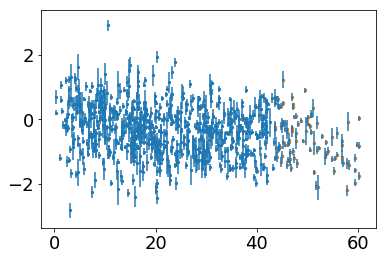

In [447]:
plt.scatter(rr,vrad_plus,s=5)
plt.scatter(rr[rindx],vrad_plus[rindx],s=5)
plt.errorbar(rr,vrad_plus,yerr=e_vrad,linestyle='none')

In [452]:
np.abs(rerr_lo_mcmc/medsr_mcmc)

array([1.10606891, 0.52987979, 0.39926713, 0.23995375, 0.16092075,
       0.15321583, 0.14703554, 0.12011321])

In [1162]:
medsr_mcmc

array([ 0.04489183, -0.23286939, -0.34457974, -0.38669941, -0.45950159,
       -0.44720646, -0.7120909 ])

In [136]:
bnz = len(centers)

pos_t = startvals_t + 1e-4 * np.random.randn(100, 2)
nwalkers, ndim = pos_t.shape

medst_mcmc = np.zeros(bnz)
terr_lo_mcmc = np.zeros(bnz)
terr_hi_mcmc = np.zeros(bnz)

sigt_mcmc = np.zeros(bnz)
sterr_lo_mcmc = np.zeros(bnz)
sterr_hi_mcmc = np.zeros(bnz)

for i in range(bnz):
    rindx = (rr > edges[i]) & (rr < edges[i+1])
    
    sampler_t = emcee.EnsembleSampler(nwalkers, ndim, log_probability_t, args=(vtan_plus[rindx],e_vtan[rindx]))
    sampler_t.run_mcmc(pos_t, 5000, progress=True);
    
    maxprob_indx = np.argmax(sampler_t.get_log_prob(discard=500, thin=15, flat=True))
    flat_samples_t = sampler_t.get_chain(discard=500, thin=15, flat=True)

    #medst_mcmc[i] = flat_samples_t[maxprob_indx,0]
    medst_mcmc[i] = np.percentile(flat_samples_t[:,0],50)
    terr_lo_mcmc[i] = medst_mcmc[i] - np.percentile(flat_samples_t[:,0], 16)
    terr_hi_mcmc[i] = np.percentile(flat_samples_t[:,0], 84) - medst_mcmc[i]


    sigt_mcmc[i] = flat_samples_t[maxprob_indx,1]
    sterr_lo_mcmc[i] = sigt_mcmc[i] - np.percentile(flat_samples_t[:,1], 16)
    sterr_hi_mcmc[i] = np.percentile(flat_samples_t[:,1], 84) - sigt_mcmc[i]

100%|██████████| 5000/5000 [01:35<00:00, 52.42it/s]


<ErrorbarContainer object of 3 artists>

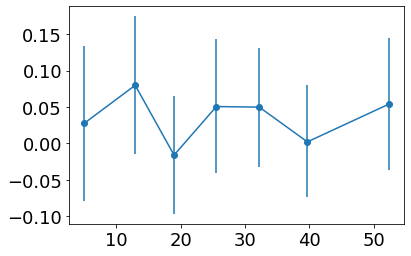

In [139]:
plt.scatter(centers,medst_mcmc)
plt.errorbar(centers,medst_mcmc,yerr=[terr_lo_mcmc,terr_hi_mcmc])

<ErrorbarContainer object of 3 artists>

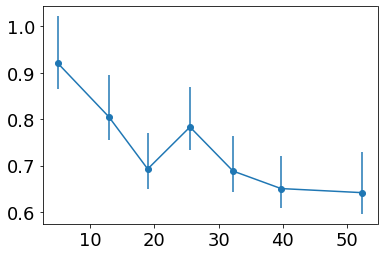

In [140]:
plt.scatter(centers,sigt_mcmc)
plt.errorbar(centers,sigt_mcmc,yerr=[sterr_lo_mcmc,sterr_hi_mcmc])

In [1851]:
bnz = len(centerslos)

pos_los = startvals + 1e-4 * np.random.randn(100, 4)
nwalkers, ndim = pos_los.shape

vrot_mcmc = np.zeros(losbnz)
vrot_err_lo_mcmc = np.zeros(losbnz)
vrot_err_hi_mcmc = np.zeros(losbnz)

siglos_mcmc = np.zeros(losbnz)
slerr_lo_mcmc = np.zeros(losbnz)
slerr_hi_mcmc = np.zeros(losbnz)

theta_mcmc = np.zeros(losbnz)
theta_err_lo_mcmc = np.zeros(losbnz)
theta_err_hi_mcmc = np.zeros(losbnz)

for i in range(losbnz):
    rindx = (rr_rv > edgeslos[i]) & (rr_rv < edgeslos[i+1])
    
    sampler_los = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus[rindx],e_vperp[rindx],posangs[rindx]))
    sampler_los.run_mcmc(pos_los, 5000, progress=True);
    
    maxprob_indx = np.argmax(sampler_los.get_log_prob(discard=500, thin=15, flat=True))
    flat_samples_los = sampler_los.get_chain(discard=500, thin=15, flat=True)

    theta_mcmc[i] = flat_samples_los[maxprob_indx,0]
    theta_err_lo_mcmc[i] = theta_mcmc[i] - np.percentile(flat_samples_los[:,0], 16)
    theta_err_hi_mcmc[i] = np.percentile(flat_samples_los[:,0], 84) - theta_mcmc[i]
    
    vrot_mcmc[i] = flat_samples_los[maxprob_indx,1]
    vrot_err_lo_mcmc[i] = vrot_mcmc[i] - np.percentile(flat_samples_los[:,1], 16)
    vrot_err_hi_mcmc[i] = np.percentile(flat_samples_los[:,1], 84) - vrot_mcmc[i]
    #vrot_err_lo_mcmc[i] = vrot_err_hi_mcmc[i]


    siglos_mcmc[i] = flat_samples_los[maxprob_indx,3]
    slerr_lo_mcmc[i] = siglos_mcmc[i] - np.percentile(flat_samples_los[:,3], 16)
    slerr_hi_mcmc[i] = np.percentile(flat_samples_los[:,3], 84) - siglos_mcmc[i]

100%|██████████| 5000/5000 [01:58<00:00, 42.08it/s]


<Container object of 3 artists>

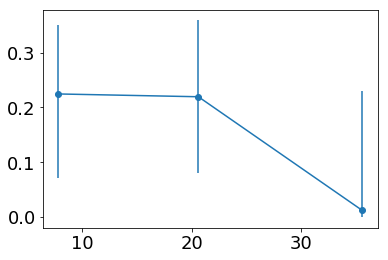

In [1854]:
plt.scatter(centerslos,vrot_mcmc)
#plt.errorbar(centerslos,vrot_mcmc,yerr=[vrot_err_lo_mcmc,vrot_err_hi_mcmc])
plt.errorbar(centerslos,vrot_mcmc,yerr=[[vrot_err_lo_mcmc[0],vrot_err_lo_mcmc[1],vrot_mcmc[-1]],vrot_err_hi_mcmc])

In [1723]:
np.percentile(flat_samples_los[:,1], 16)

0.03516453102651729

In [1724]:
vrot_err_lo_mcmc

array([ 0.10206313,  0.16290857, -0.00232674])

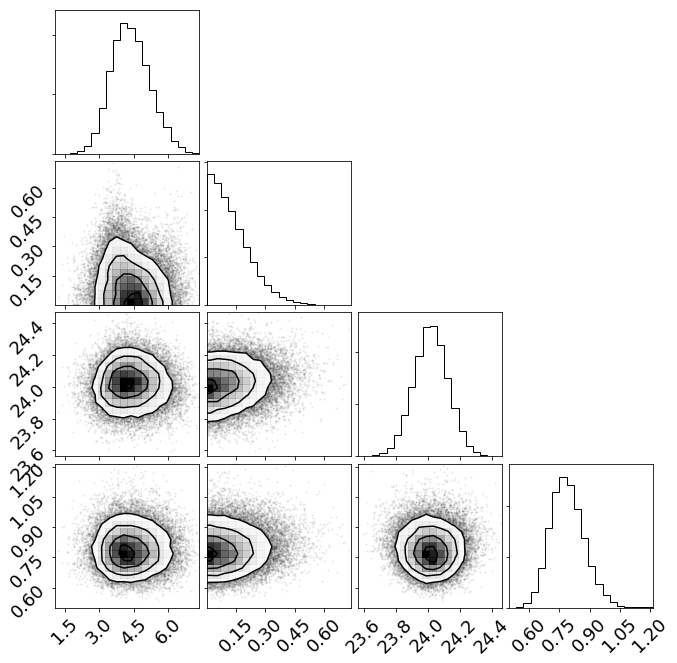

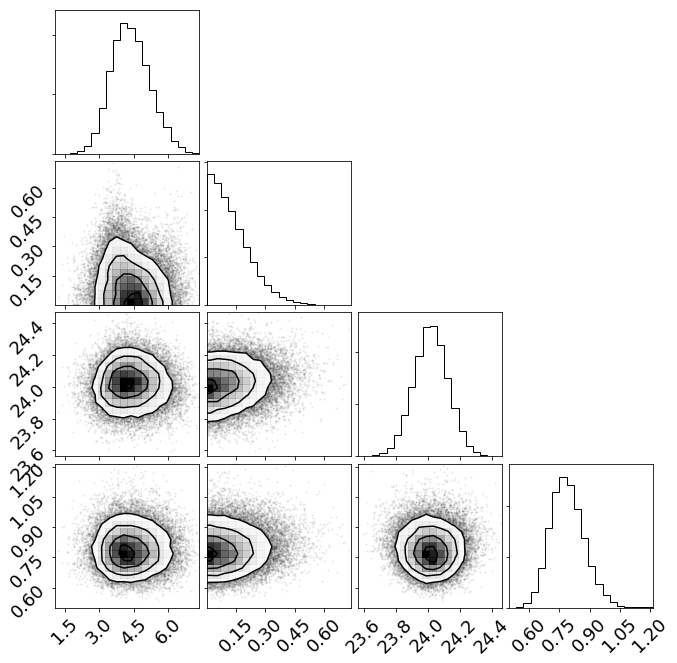

In [1855]:
corner.corner(flat_samples_los)

<Container object of 3 artists>

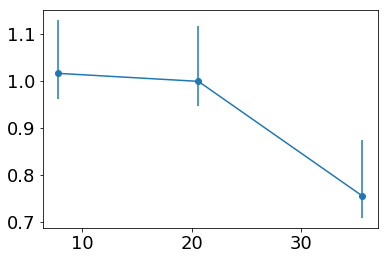

In [1856]:
plt.scatter(centerslos,siglos_mcmc)
plt.errorbar(centerslos,siglos_mcmc,yerr=[slerr_lo_mcmc,slerr_hi_mcmc])

<Container object of 3 artists>

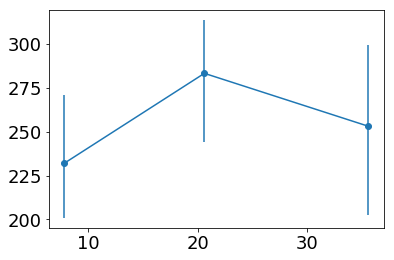

In [1857]:
plt.scatter(centerslos,theta_mcmc*180/np.pi)
plt.errorbar(centerslos,theta_mcmc*180/np.pi,yerr=[theta_err_lo_mcmc*180/np.pi,theta_err_hi_mcmc*180/np.pi])

Text(0,0.5,'$v_{\\rm rot} \\sin \\theta$')

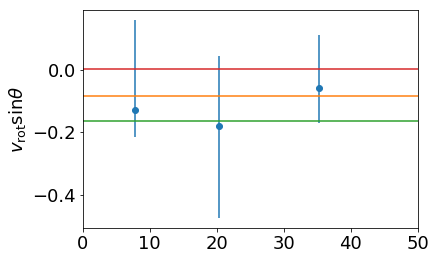

In [1613]:
u_vrot_mcmc = unumpy.uarray(vrot_mcmc,(vrot_err_lo_mcmc+vrot_err_hi_mcmc)/2)
u_theta_mcmc = unumpy.uarray(theta_mcmc,(theta_err_lo_mcmc+theta_err_hi_mcmc)/2)

u_vrot_mcmc_hi = unumpy.uarray(vrot_mcmc,vrot_err_hi_mcmc)
u_vrot_mcmc_lo = unumpy.uarray(vrot_mcmc,vrot_err_lo_mcmc)

u_theta_mcmc_hi = unumpy.uarray(theta_mcmc,theta_err_hi_mcmc)
u_theta_mcmc_lo = unumpy.uarray(theta_mcmc,theta_err_lo_mcmc)

vrot_sin_theta = u_vrot_mcmc * unumpy.sin(u_theta_mcmc)

vrot_sin_theta_hi = u_vrot_mcmc_hi * unumpy.sin(u_theta_mcmc_hi)
vrot_sin_theta_lo = u_vrot_mcmc_lo * unumpy.sin(u_theta_mcmc_lo)

vrt_sin_thta = vrt*unumpy.sin(thta)

vrt_sin_thta_hi = vrt_hi*unumpy.sin(thta_hi)
vrt_sin_thta_lo = vrt_lo*unumpy.sin(thta_lo)

#plt.scatter(centerslos,unumpy.nominal_values(vrot_sin_theta))
#plt.errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),yerr=unumpy.std_devs(vrot_sin_theta),linestyle='none')
#plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)])
#plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta)-unumpy.std_devs(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)-unumpy.std_devs(vrt_sin_thta)])
#plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta)+unumpy.std_devs(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)+unumpy.std_devs(vrt_sin_thta)])
#plt.xlim(0,50)

plt.scatter(centerslos,unumpy.nominal_values(vrot_sin_theta))
plt.errorbar(centerslos,unumpy.nominal_values(vrot_sin_theta),yerr=(unumpy.std_devs(vrot_sin_theta_lo),unumpy.std_devs(vrot_sin_theta_hi)),linestyle='none')

plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta),unumpy.nominal_values(vrt_sin_thta)])
plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta)-unumpy.std_devs(vrt_sin_thta_lo),unumpy.nominal_values(vrt_sin_thta)-unumpy.std_devs(vrt_sin_thta_lo)])
plt.plot([-1,51],[unumpy.nominal_values(vrt_sin_thta)+unumpy.std_devs(vrt_sin_thta_hi),unumpy.nominal_values(vrt_sin_thta)+unumpy.std_devs(vrt_sin_thta_hi)])
plt.xlim(0,50)

plt.ylabel(r'$v_{\rm rot} \sin \theta$')



In [3743]:
theta_mcmc

array([3.94881807, 5.46204786, 2.59895311])

In [3725]:
#np.arctan2()

In [3724]:
vrt_sin_thta_lo

-0.084315666442927+/-0.07868730733931842

In [3695]:
vrt

array(0.089+/-0.075, dtype=object)

In [119]:
pos_r = startvals_r + 1e-4 * np.random.randn(100, 2)
nwalkers, ndim = pos_r.shape

sampler_r = emcee.EnsembleSampler(nwalkers, ndim, log_probability_r, args=(vrad_plus,e_vrad))
sampler_r.run_mcmc(pos_r, 5000, progress=True);

100%|██████████| 5000/5000 [01:54<00:00, 43.55it/s]


In [125]:
ndim

4

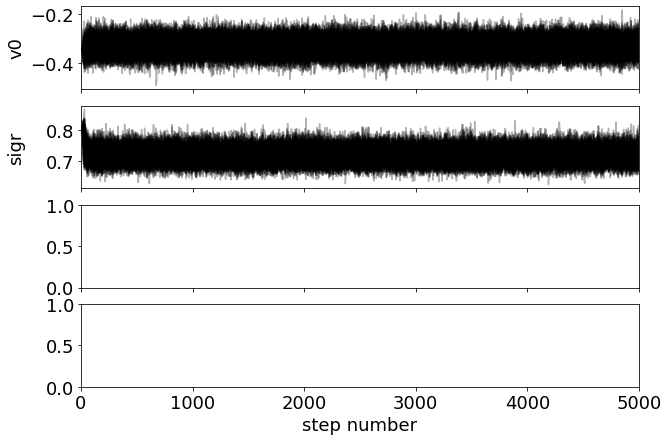

In [126]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler_r.get_chain()
labels = ["v0","sigr"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

<IPython.core.display.Math object>

<IPython.core.display.Math object>

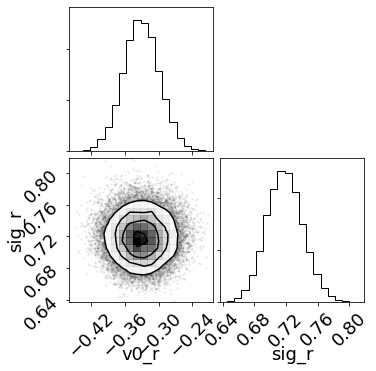

In [128]:
flat_samples_r = sampler_r.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(
    flat_samples_r, labels=labels_r)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);
for i in range(2):
    mcmc = np.percentile(flat_samples_r[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels_r[i])
    #print(txt)
    display(Math(txt))

In [3539]:
mcmc[1]

0.7906477627070679

(array([18., 20., 28., 19., 19., 27., 32., 27., 27., 17.]),
 array([0.02423732, 0.64962658, 1.27501584, 1.90040511, 2.52579437,
        3.15118363, 3.7765729 , 4.40196216, 5.02735142, 5.65274069,
        6.27812995]),
 <a list of 10 Patch objects>)

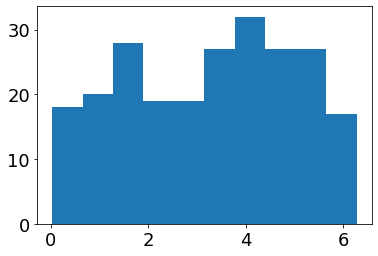

In [129]:
plt.hist(tt_rv)

In [120]:
pos_t = startvals_t + 1e-4 * np.random.randn(100, 2)
nwalkers, ndim = pos_t.shape

sampler_t = emcee.EnsembleSampler(nwalkers, ndim, log_probability_t, args=(vtan_plus,e_vtan))
sampler_t.run_mcmc(pos_t, 5000, progress=True);

100%|██████████| 5000/5000 [01:47<00:00, 46.59it/s]


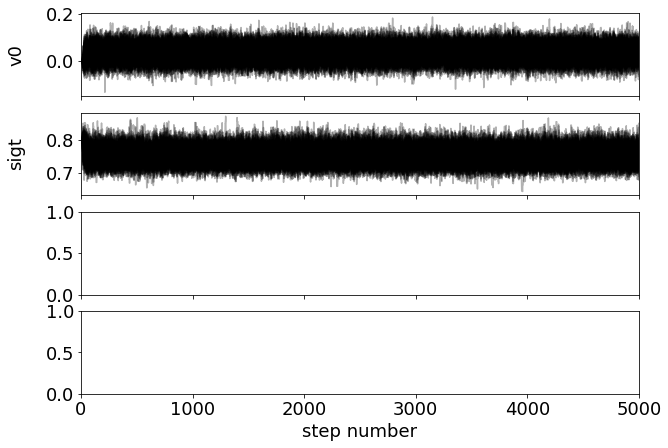

In [130]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler_t.get_chain()
labels = ["v0","sigt"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

<IPython.core.display.Math object>

<IPython.core.display.Math object>

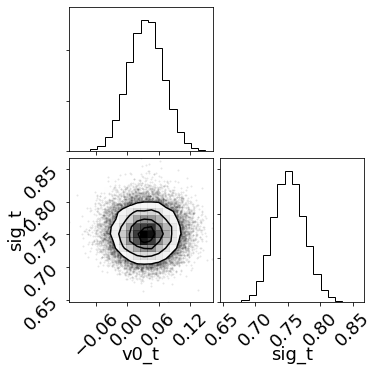

In [131]:
flat_samples_t = sampler_t.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(
    flat_samples_t, labels=labels_t)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);
for i in range(2):
    mcmc = np.percentile(flat_samples_t[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels_t[i])
    #print(txt)
    display(Math(txt))

In [121]:
for i in range(len(e_vperp)):
    if SSMgrv['Survey'][i] == 'GES':
        e_vperp[i] *= 1.09

In [122]:
pos = startvals + 1e-4 * np.random.randn(100, 4)
nwalkers, ndim = pos.shape

In [123]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus, e_vperp, posangs))
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus, e_vperp, posangs))

sampler.run_mcmc(pos, 5000, progress=True);

  0%|          | 0/5000 [00:00<?, ?it/s]/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [01:52<00:00, 44.56it/s]


In [309]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus[los_indx1], e_vperp[los_indx1], posangs[los_indx1]))
sampler1.run_mcmc(pos, 5000, progress=True);


100%|██████████| 5000/5000 [02:05<00:00, 39.87it/s]


In [310]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus[los_indx2], e_vperp[los_indx2], posangs[los_indx2]))
sampler2.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [01:56<00:00, 42.74it/s]


In [311]:
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(vperp_plus[los_indx3], e_vperp[los_indx3], posangs[los_indx3]))
sampler3.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [01:56<00:00, 42.98it/s]


(-17, 17)

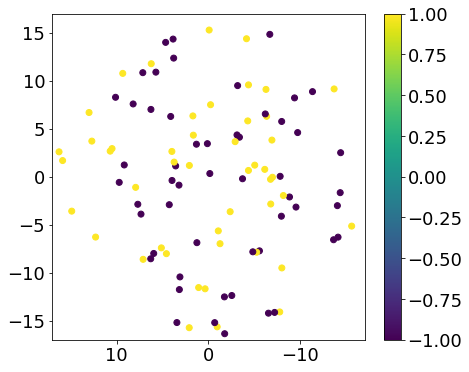

In [329]:
plt.figure(figsize=(7,6))
plt.scatter(x_rv[los_indx1],y_rv[los_indx1],c=np.sign(vperp_plus[los_indx1]-23.75))
plt.colorbar()
plt.xlim(17,-17)
plt.ylim(-17,17)

In [267]:
labels = ["posang_c", "vrot", "v0","siglos"]


In [304]:
sampler.flatchain[np.argmax(sampler.flatlnprobability)]

array([ 6.31936645,  0.09947904, 23.80441756,  0.93043022])

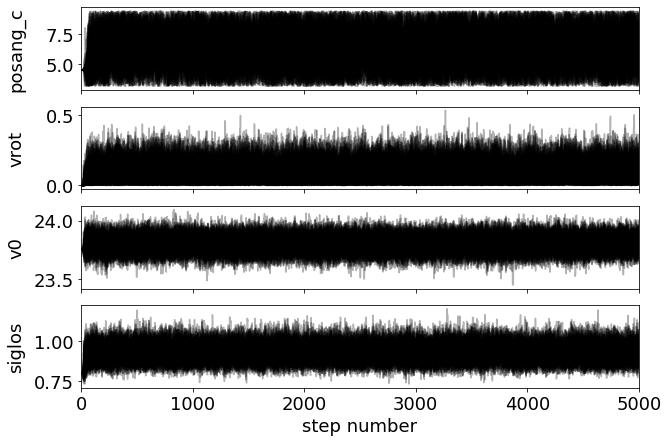

In [132]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

labels = ["posang_c", "vrot", "v0","siglos"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

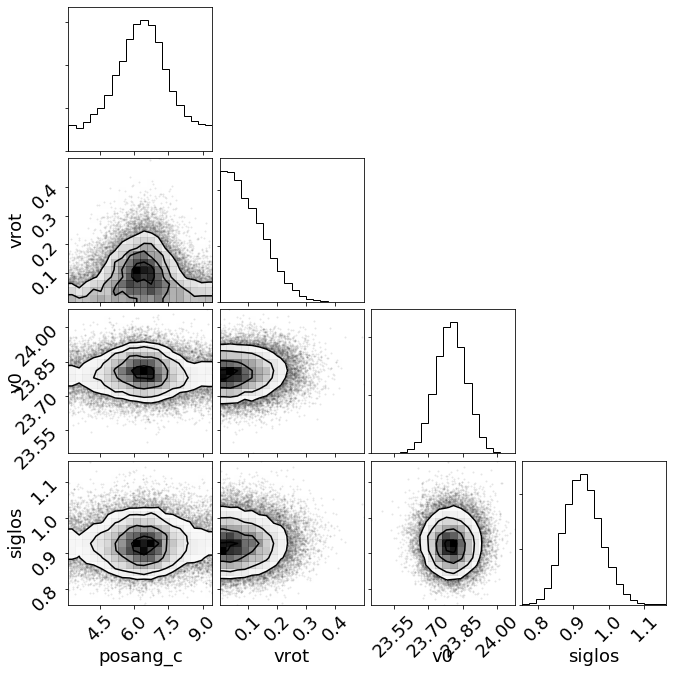

In [133]:
#flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
logprob = sampler.get_log_prob(discard=500, thin=15, flat=True)


fig = corner.corner(
    flat_samples, labels=labels)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);

In [142]:
#from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #print(txt)
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1681]:
#plt.hist(np.concatenate((flat_samples[:,0],flat_samples[:,0]+2*np.pi)))

In [271]:
np.median(e_vperp)

0.29430000000000006

In [3670]:

vrot_los = [0.150,0.215, 0.171]
vrot_los_loerr = [0.105, 0.133, 0.120]
vrot_los_hierr = [0.157, 0.141, 0.183]

sig_los = [1.108, 1.077, 0.728]
sig_los_loerr = [0.085, 0.071, 0.105]
sig_los_hierr = [0.096, 0.079, 0.127]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

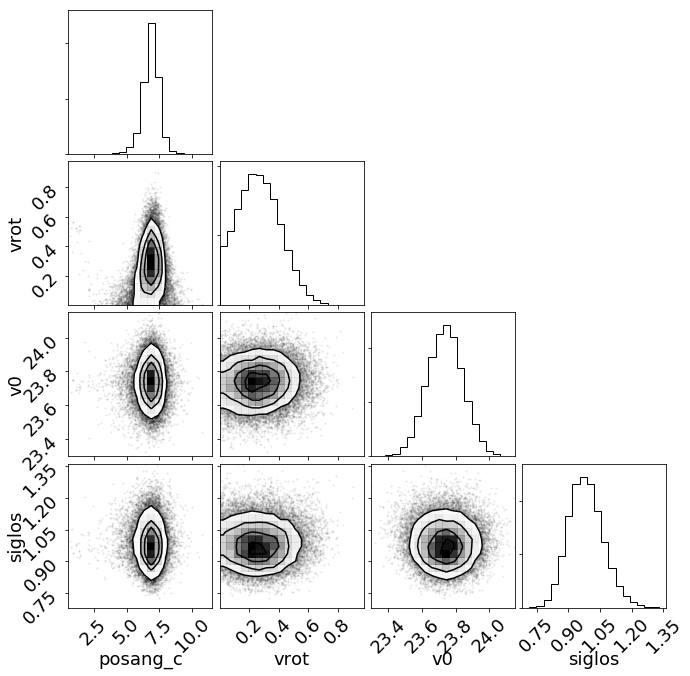

In [312]:
flat_samples1 = sampler1.get_chain(discard=500, thin=15, flat=True)
fig = corner.corner(
    flat_samples1, labels=labels)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);
for i in range(ndim):
    mcmc = np.percentile(flat_samples1[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #print(txt)
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

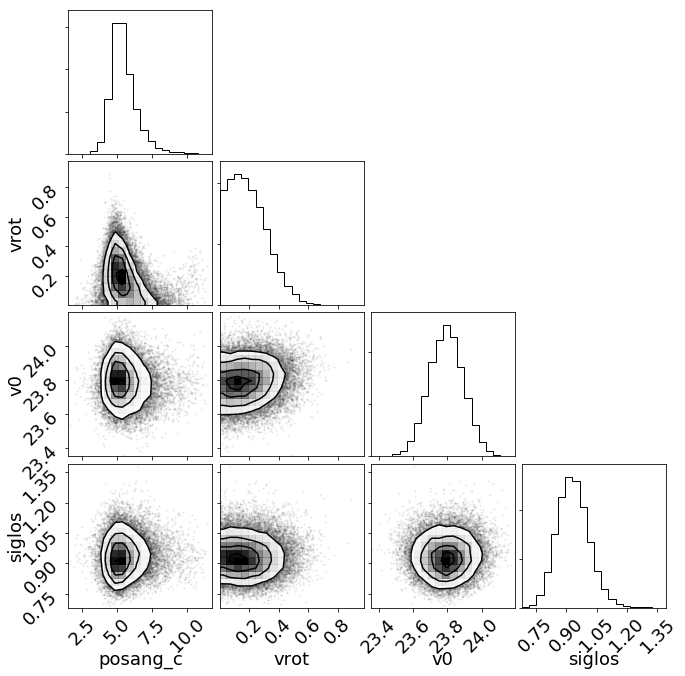

In [313]:
flat_samples2 = sampler2.get_chain(discard=500, thin=15, flat=True)
fig = corner.corner(
    flat_samples2, labels=labels)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);
for i in range(ndim):
    mcmc = np.percentile(flat_samples2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #print(txt)
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

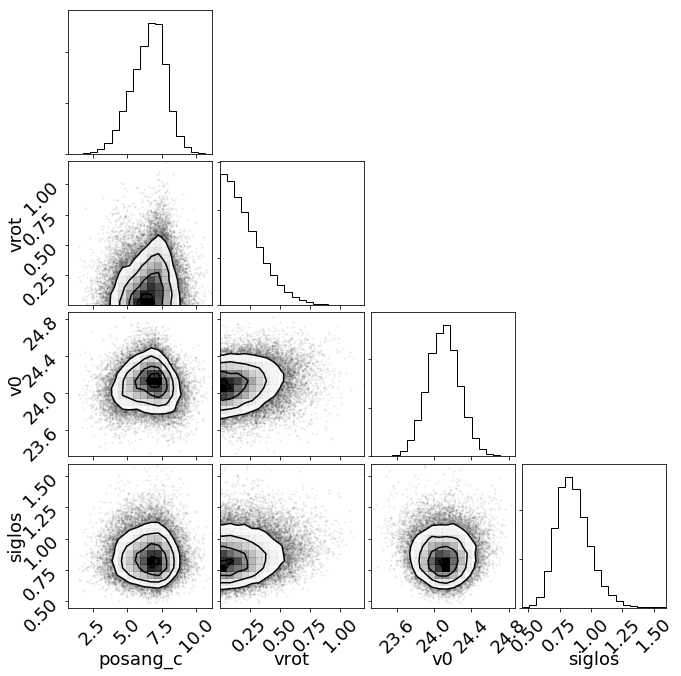

In [314]:
flat_samples3 = sampler3.get_chain(discard=500, thin=15, flat=True)
fig = corner.corner(
    flat_samples3, labels=labels)#, truths=[posang_c_true, vrot_true, v0_true, siglos_true]
#);
for i in range(ndim):
    mcmc = np.percentile(flat_samples3[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #print(txt)
    display(Math(txt))

In [1713]:
np.argmax(sampler3.flatlnprobability)

168390

In [1716]:
sampler3.flatchain[np.argmax(sampler3.flatlnprobability)]

array([ 4.70880712,  0.04025752, 23.95247365,  0.78374151])

In [3732]:
pos[0][0]*180/np.pi, 4.422*180/np.pi

(359.05885144824356, 253.36193700685)

In [734]:
thta_hi = unumpy.uarray(4.430,1.059)
thta_lo = unumpy.uarray(4.430,2.048)
vrt_hi = unumpy.uarray(0.089,0.087)
vrt_lo = unumpy.uarray(0.089,0.062)

vrt = 0.089
thta = 4.430

In [3719]:
np.percentile(flat_samples[:,1],50)

0.08840443847882029

In [3265]:
maxprob_indx = np.argmax(sampler.get_log_prob(discard=100, thin=15, flat=True))
maxprob_indx

10383

In [3189]:
flat_samples.shape

(32600, 4)

In [3215]:
np.median(flat_samples[:,1])

0.08847577873536663

In [3266]:
flat_samples[maxprob_indx,:]

array([-1.50128674,  0.09873457, 23.75995974,  1.04086744])

In [3267]:
flat_samples[maxprob_indx,0]-np.percentile(flat_samples[:,0],16), flat_samples[maxprob_indx,0], np.percentile(flat_samples[:,0],84)-flat_samples[maxprob_indx,0]



(0.7643012187359353, -1.5012867350376635, 2.091046417754768)

In [3268]:
flat_samples[maxprob_indx,1]-np.percentile(flat_samples[:,1],16), flat_samples[maxprob_indx,1], np.percentile(flat_samples[:,1],84)-flat_samples[maxprob_indx,1]

(0.07135493857907099, 0.09873457309555933, 0.07829983619927935)

In [3269]:
flat_samples[maxprob_indx,2]-np.percentile(flat_samples[:,2],16), flat_samples[maxprob_indx,2], np.percentile(flat_samples[:,2],84)-flat_samples[maxprob_indx,2]


(0.07821998634147675, 23.75995974049553, 0.05849834416676458)

In [3270]:
flat_samples[maxprob_indx,3]-np.percentile(flat_samples[:,3],16), flat_samples[maxprob_indx,3], np.percentile(flat_samples[:,3],84)-flat_samples[maxprob_indx,3]


(0.038016741813669874, 1.0408674396870359, 0.06567492159658372)

In [791]:
hdulist=fits.open('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/J_A+A_586_A52_table1.dat.fits')

In [795]:
jefftbl = Table(hdulist[1].data)
jefftbl

<Table length=2755>
Cluster      Object       Icmag    Jmag  ... logTeff  Nsp    pRV    pvsini
  str7       str16       float64 float64 ... float64 int32 float64 float64
------- ---------------- ------- ------- ... ------- ----- ------- -------
NGC2264 06392396+0942016     0.0   10.84 ...   3.666     2    0.29    2.66
NGC2264 06392497+0933151     0.0   13.84 ...   3.552     2    0.54    0.66
NGC2264 06392506+0942515     0.0   13.21 ...    3.56     2    0.36    1.43
NGC2264 06392535+0943147     0.0   12.05 ...   3.712     2    0.36    4.31
NGC2264 06392550+0931394     0.0   13.77 ...   3.544     2    0.29    0.23
NGC2264 06392623+0947066     0.0   14.68 ...   3.794     2     0.5    2.89
NGC2264 06392625+0941108     0.0   12.71 ...   3.546     2     0.3    0.16
NGC2264 06392649+0943298     0.0   13.94 ...    3.77     2    0.63    0.09
NGC2264 06392692+0941220     0.0   13.36 ...   3.712     2    0.36    5.24
NGC2264 06392758+0951008     0.0   11.67 ...   3.726     2    0.27    2.27
    ...              ...     ...     ... ...     ...   ...     ...     ...
NGC2516 08023533-6040197     0.0    14.1 ...    3.61     2    0.29    4.08
NGC2516 08023898-6057231     0.0   14.77 ...   3.556     2    0.41    0.27
NGC2516 08024318-6053051     0.0    14.6 ...   3.549     2    0.54    0.11
NGC2516 08024838-6047096     0.0   14.77 ...   3.562     2    0.33    4.08
NGC2516 08024877-6052010     0.0   14.69 ...   3.595     2    0.33    4.66
NGC2516 08025517-6039245     0.0   13.87 ...   3.624     2    0.29    2.89
NGC2516 08031131-6038165     0.0   14.22 ...   3.559     2    0.79    0.18
NGC2516 08031783-6049582     0.0   14.12 ...   3.616     2    0.28    2.38
NGC2516 08033219-6044262     0.0   15.15 ...   3.559     2    0.59    0.32
NGC2516 08034358-6051252     0.0   14.47 ...   3.559     2    0.54    0.32

In [831]:
source_ids = np.zeros(len(jefftbl[ngc2516indx]),dtype=int)
for i in range(len(jefftbl[ngc2516indx])):
#for i in range(0,10):
        print(i)
        #twomassnames[i] = '2MASS J'+namestbl[i]
        tgt = jefftbl[ngc2516indx]['Object'][i]
        sra = tgt[:8]
        sdec = tgt[8:]
        ra = sra[:2]+':'+sra[2:4]+':'+sra[4:6]+'.'+sra[6:]+' '
        dec = sdec[:3]+':'+sdec[3:5]+':'+sdec[5:7]+'.'+sdec[7:]
        coord = ra + dec
        SC = SkyCoord(coord,unit=(u.hourangle,u.deg))

        qry = Gaia.query_object_async(SC,radius=.001*u.deg)
        if len(qry) != 0:
            sourceid = qry[0]['source_id']
            source_ids[i] =sourceid 
        else:
            source_ids[i] = 0
            
source_ids = np.array(source_ids)

0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils.tap.core]
17
INFO: Query finished. [astroquery.utils.tap.core]
18
INFO: Query finished. [astroquery.utils.tap.core]
19


INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astroquery.utils.tap.core]
171
INFO: Query finished. [astroquery.utils.tap.core]
172
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astroquery.utils.tap.core]
323
INFO: Query finished. [astroquery.utils.tap.core]
324
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astroquery.utils.tap.core]
474
INFO: Query finished. [astroquery.utils.tap.core]
475
INFO: Query finished. [astroquery.utils.tap.core]
476
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
611
INFO: Query finished. [astroquery.utils.tap.core]
612
INFO: Query finished. [astroquery.utils.tap.core]
613
INFO: Query finished. [astroquery.utils.tap.core]
614
INFO: Query finished. [astroquery.utils.tap.core]
615
INFO: Query finished. [astroquery.utils.tap.core]
616
INFO: Query finished. [astroquery.utils.tap.core]
617
INFO: Query finished. [astroquery.utils.tap.core]
618
INFO: Query finished. [astroquery.utils.tap.core]
619
INFO: Query finished. [astroquery.utils.tap.core]
620
INFO: Query finished. [astroquery.utils.tap.core]
621
INFO: Query finished. [astroquery.utils.tap.core]
622
INFO: Query finished. [astroquery.utils.tap.core]
623
INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astroquery.utils.tap.core]
626
INFO: Query finished. [astroquery.utils.tap.core]
627
INFO: Query finished. [astroquery.utils.tap.core]
628
INFO: Query finished. [astro

In [839]:
sidcol = Column(source_ids,'source_id')

In [840]:
jefftbl_2516 = jefftbl[ngc2516indx]
jefftbl_2516.add_column(sidcol)

In [842]:
joinjefftbl = join(mems,jefftbl_2516,keys='source_id')

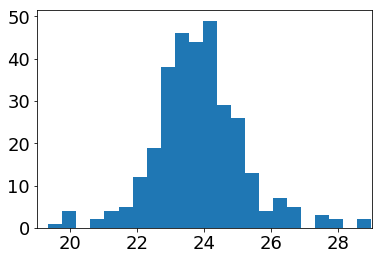

In [852]:
plt.hist(joinjefftbl['RV'],bins=150)
plt.xlim(19,29)
plt.show()

In [885]:
goodindx = (joinjefftbl['RV'] > 20.2) & (joinjefftbl['RV'] < 27.2)

#goodindx = (joinjefftbl['RV'] > 22) & (joinjefftbl['RV'] < 26)

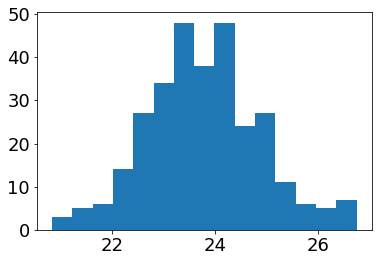

In [891]:
plt.hist(joinjefftbl[goodindx]['RV'],bins=15)
plt.show()

In [875]:
np.std(joinjefftbl[goodindx]['RV'])

1.0996245577968329

In [862]:
np.median(joinjefftbl[goodindx]['pRV'])



0.27

In [1593]:
ngc2516indx=jefftbl['Cluster']=='NGC2516'
full_goodindx = (jefftbl[ngc2516indx]['RV'] > 20) & (jefftbl[ngc2516indx]['RV'] < 27)

In [1594]:
np.std(jefftbl_2516[full_goodindx]['RV'])

1.1976597082851506

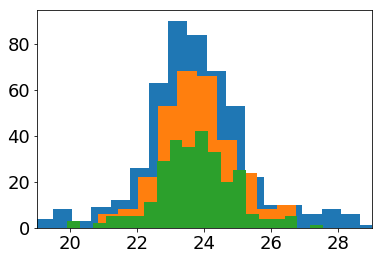

In [1595]:
plt.hist(jefftbl[ngc2516indx]['RV'],bins=500)
plt.hist(joinjefftbl[goodindx]['RV'],bins=10)
plt.hist(SSMgrv['RV'],bins=20)
plt.xlim(19,29)
plt.show()

(array([ 10.,  11.,  29.,  79., 101.,  98.,  64.,  33.,  14.,  12.]),
 array([20.37 , 21.031, 21.692, 22.353, 23.014, 23.675, 24.336, 24.997,
        25.658, 26.319, 26.98 ]),
 <a list of 10 Patch objects>)

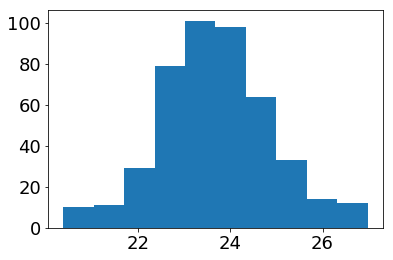

In [1596]:
plt.hist(jefftbl_2516[full_goodindx]['RV'])

(10, 40)

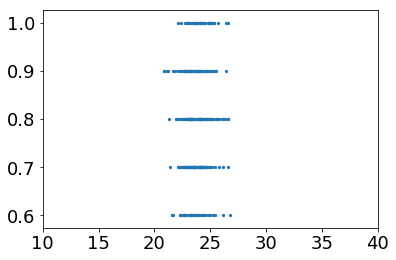

In [884]:
plt.scatter(joinjefftbl[goodindx]['RV'],joinjefftbl[goodindx]['proba'],s=5)
plt.xlim(10,40)

In [1186]:
from scipy.stats import norm,uniform,t
#lu = t.pdf(varr*siniarr[i],loc=meanu,scale=sigu,df=2)
t.pdf()

In [1193]:
t.logpdf(1.7,loc=vperp[0],scale=e_vperp[0],df=6)

-0.42471604220636006

In [807]:
np.std(jefftbl[ngc2516indx]['RV'])

22.335519822090216

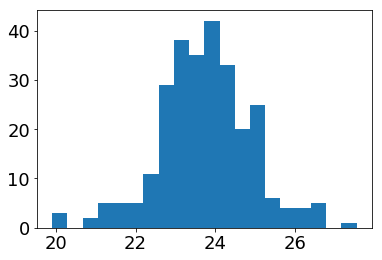

In [811]:
plt.hist(SSMgrv['RV'],bins=20)
plt.show()

(array([41., 30., 55., 42., 48., 28., 20.,  4.,  3.,  2.]),
 array([0.09904381, 0.36025812, 0.62147243, 0.88268674, 1.14390105,
        1.40511536, 1.66632967, 1.92754398, 2.18875829, 2.4499726 ,
        2.71118691]),
 <a list of 10 Patch objects>)

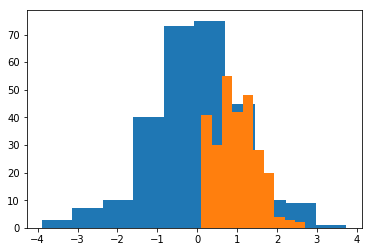

In [977]:
plt.hist(vperp_plus)
plt.hist(vtan)

(array([11., 33., 42., 61., 51., 39., 24.,  8.,  2.,  2.]),
 array([-1.51775444, -1.11675262, -0.7157508 , -0.31474899,  0.08625283,
         0.48725465,  0.88825646,  1.28925828,  1.6902601 ,  2.09126192,
         2.49226373]),
 <a list of 10 Patch objects>)

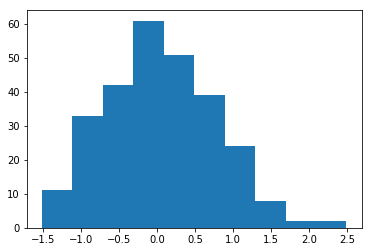

In [978]:
plt.hist(vdec)

(array([ 6., 11., 24., 40., 66., 66., 37., 16.,  6.,  1.]),
 array([-2.21830516, -1.72589407, -1.23348299, -0.7410719 , -0.24866082,
         0.24375027,  0.73616135,  1.22857244,  1.72098352,  2.21339461,
         2.70580569]),
 <a list of 10 Patch objects>)

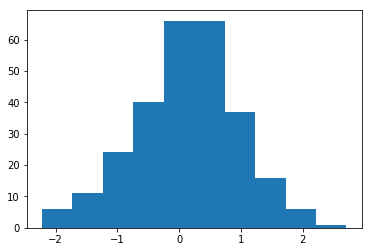

In [979]:
plt.hist(vra)

In [18]:
cpmra/1e3/206265



-2.3018932659241733e-08

In [38]:
np.median(((SSMgrv['pmdec']-cpmdec))/(1e3*206265)*(1e3/SSMgrv['parallax']))

4.250956242104129e-09

In [37]:
np.median(((SSMgrv['pmra']-cpmra))/(1e3*206265)*(1e3/SSMgrv['parallax']))

1.880365724307911e-07

In [44]:
np.median((SSMgrv['RV']-23.8)*3.24078e-14*np.pi*1e7)

-5.0906053199504376e-08

In [95]:
ids = finalresults['source_id']
ids = joined_finalresultstbl['source_id']

In [102]:
amp = []
for i in range(len(ids)):
    print(i)
    #file = '/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/*'+np.str(ids[i])+'*'
    file = '/Users/bhealy/Documents/PhD_Thesis/NGC_2516/cdips_lcgen/Figs/Light_Curves/*'+np.str(ids[i])+'*'

    tbl = ascii.read(glob.glob(file)[0])
    lc = lk.lightcurve.LightCurve(tbl['time'],tbl['flux'])
    pdg = lc.to_periodogram()
    indx = (pdg.period.value > joined_finalresultstbl[i]['period']-joined_finalresultstbl[i]['e_period']*5) & (pdg.period.value < joined_finalresultstbl[i]['period']+joined_finalresultstbl[i]['e_period']*5)
    amp += [pdg[indx].max_power]
amp = np.array(amp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [114]:
pf=np.polyfit(joined_finalresultstbl['bayes_sini'],amp,1)

pf=np.polyfit(sini_amp.remove_outliers(3).time,sini_amp.remove_outliers(3).flux,1)

In [104]:
newbayes_sini = np.arange(-.1,1.2,0.01)


In [110]:
sini_amp = lk.LightCurve(time=joined_finalresultstbl['bayes_sini'],flux=amp)

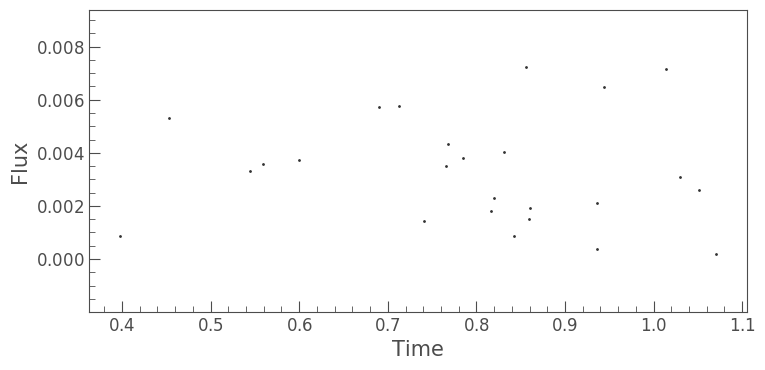

In [116]:
sini_amp.remove_outliers(2).scatter()

Text(0,0.5,'Modulation amplitude')

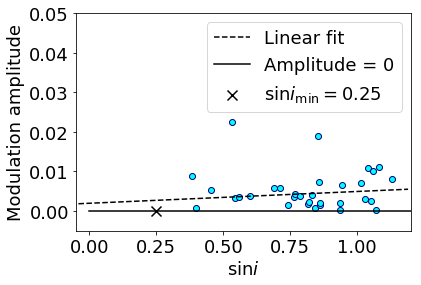

In [115]:
ampfig = plt.figure(figsize=(6,4))
plt.scatter(joined_finalresultstbl['bayes_sini'],amp,color='cyan',edgecolor='navy')
plt.plot(newbayes_sini,pf[0]*newbayes_sini+pf[1],color='black',linestyle='--',label='Linear fit')
plt.plot([0,1.2],[0.0000,0.0000],color='black',label='Amplitude = 0')
plt.xlim(-0.05,1.2)
plt.ylim(-0.005,0.05)
plt.scatter(0.25,0.,marker='x',color='black',s=100,label=r'$\sin i_{\rm min} = 0.25$')
plt.legend()
plt.xlabel('$\sin i$')
plt.ylabel('Modulation amplitude')
#ampfig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/amplitudefig_cdips.pdf',bbox_inches='tight')

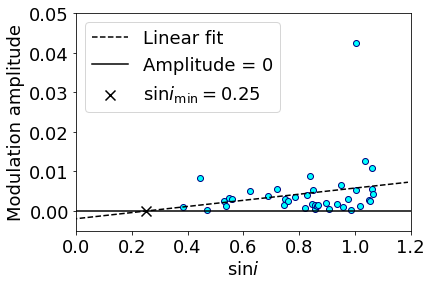

In [235]:
ampfig = plt.figure(figsize=(6,4))
plt.scatter(finalresults['bayes_sini'],amp,color='cyan',edgecolor='navy')
plt.plot(newbayes_sini,pf[0]*newbayes_sini+pf[1],color='black',linestyle='--',label='Linear fit')
plt.plot([0,1.2],[0.0000,0.0000],color='black',label='Amplitude = 0')
plt.xlim(0,1.2)
plt.ylim(-0.005,0.05)
plt.scatter(0.25,0.,marker='x',color='black',s=100,label=r'$\sin i_{\rm min} = 0.25$')
plt.legend()
plt.xlabel('$\sin i$')
plt.ylabel('Modulation amplitude')
#ampfig.savefig('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperfigs/amplitudefig.pdf',bbox_inches='tight')

In [265]:
amptbl=Table(data=[finalresults['bayes_sini'],amp],names=['sini','amplitude'])

In [266]:
amptbl.write('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/paperdata/fig5/fig5_sini_amplitudes.txt',format='ascii')




In [213]:
np.min(amp)

0.00033614735338086804

In [ ]:
plt.hist()

In [204]:
np.median(finalresults['vsini']/finalresults['bayes_sini'])

24.304524033930257

In [207]:
#np.median(2*np.pi*finalresults['exofast_r']*7e5/(finalresults['period']*86400))

In [198]:
finalresults[30]

<Row index=30>
     source_id       AV_SFD AV_SandF Cluster E_B_V_SFD E_B_V_SandF   Hmag   Icmag    Jmag    Kmag    Nsp        Object         RV     S/N   Survey  al_fe  alpha_fe         b           ba_fe    bp_rp     c_fe   ca_fe  chi2_cannon classification cluster   co_fe   cr_fe   cu_fe  cutout_size         dec         dec_parallax_corr dec_pmdec_corr dec_pmra_corr dej2000 e_al_fe e_alpha_fe e_ba_fe  e_c_fe e_ca_fe e_co_fe e_cr_fe e_cu_fe e_eu_fe  e_fe_h  e_hmag  e_jmag  e_k_fe  e_kmag e_la_fe e_li_fe  e_logg e_mg_fe e_mn_fe e_na_fe e_ni_fe  e_o_fe e_rv_nogr_obst e_rv_obst e_rv_synt e_sc_fe e_si_fe       e_teff       e_ti_fe  e_v_fe  e_vmic e_vsini  e_y_fe e_zn_fe  errmsg  eu_fe    fe_h  field_id flag_al_fe flag_ba_fe flag_c_fe flag_ca_fe flag_cannon flag_co_fe flag_cr_fe flag_cu_fe flag_eu_fe flag_k_fe flag_la_fe flag_li_fe flag_mg_fe flag_mn_fe flag_na_fe flag_ni_fe flag_o_fe flag_sc_fe flag_si_fe flag_ti_fe flag_v_fe flag_y_fe flag_zn_fe       gaia_r         hmag    jmag    k_fe    kmag          l           la_fe   li_fe  logTeff   logg  max_E_B_V_SFD max_E_B_V_SandF mean_E_B_V_SFD mean_E_B_V_SandF  mg_fe  min_E_B_V_SFD min_E_B_V_SandF  mn_fe   na_fe  ndfclass  ni_fe    o_fe    pRV        parallax          parallax_err        parallax_error    parallax_pmdec_corr parallax_pmra_corr       period             period_unc      phot_g_mean_mag phot_g_n_obs       pmdec            pmdec_error             pmra             pmra_error     pmra_pmdec_corr       proba        pvsini         ra         ra_dec_corr ra_parallax_corr ra_pmdec_corr ra_pmra_corr raj2000 rv_nogr_obst rv_obst rv_synt  sc_fe   si_fe   snr_c1  snr_c2  snr_c3  snr_c4 sobject_id sp_label_distance star_id stdev_E_B_V_SFD stdev_E_B_V_SandF        teff        ti_fe    v_fe  vmag_jk   vmic   vsini    y_fe   zn_fe  astrometric_gof_al astrometric_chi2_al astrometric_excess_noise astrometric_excess_noise_sig exofast_r r_hi_err       r_lo_err       exofast_teff teff_hi_err teff_lo_err   lum         lumhierr             lumloerr              sini            sini_fracerr        bayes_sini      bayes_sini_lo_err  bayes_sini_hi_err 
       int64        float64 float64    str7   float64    float64   float64 float64 float64 float64 float64      str16       float64 float64  str5  float64 float64       float64       float64  float64  float64 float64   float64        str1        str8   float64 float64 float64   float64         float64            float64         float64        float64    float64 float64  float64   float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64 float64    float64      float64   float64  float64 float64      float64       float64 float64 float64 float64 float64 float64 float64 float64 float64 float64   float64    float64    float64   float64     float64    float64    float64    float64    float64    float64   float64    float64    float64    float64    float64    float64    float64   float64    float64    float64    float64   float64   float64        float64       float64 float64 float64 float64      float64       float64 float64 float64 float64    float64        float64        float64         float64      float64    float64        float64     float64 float64   str8   float64 float64 float64      float64             float64              float64              float64            float64            float64              float64            float64        int64          float64             float64             float64             float64           float64          float64      float64      float64         float64       float64         float64      float64    float64   float64    float64 float64 float64 float64 float64 float64 float64 float64  float64        float64       str16      float64          float64           float64      float64 float64 float64 float64 float64 float64 float64      float64             float64               float64                    float64       

(0.2, 0.3)

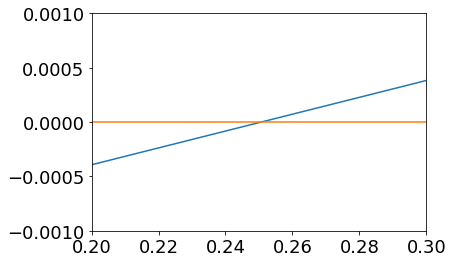

In [170]:
plt.scatter(finalresults['bayes_sini'],amp)
plt.plot(newbayes_sini,pf[0]*newbayes_sini+pf[1])
plt.plot([0,1.2],[0,0])
plt.ylim(-0.005,0.02)
plt.ylim(-.001,.001)
plt.xlim(0.2,.3)

In [141]:
tbl1 = ascii.read('/Users/bhealy/Documents/PhD_Thesis/NGC_2516/table1_bprp.dat')
ids=tbl1['sourceid']


In [142]:
amp = [] 
for i in range(len(ids)):
    print(i)
    file = '/Users/bhealy/Documents/PhD_Thesis/NGC_2516/Figs/Light_Curves/*'+np.str(ids[i])+'*'
    tbl = ascii.read(glob.glob(file)[0])
    lc = lk.lightcurve.LightCurve(tbl['time'],tbl['flux'])
    pdg = lc.to_periodogram()
    indx = (pdg.period.value > tbl1[i]['period']-tbl1[i]['e_period']*5) & (pdg.period.value < tbl1[i]['period']+tbl1[i]['e_period']*5)
    amp += [pdg[indx].max_power]
amp = np.array(amp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


(array([87., 55., 39., 27., 19.,  9.,  6.,  4.,  4.,  3.,  2.,  2.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.00013038, 0.00154492, 0.00295946, 0.00437401, 0.00578855,
        0.00720309, 0.00861764, 0.01003218, 0.01144672, 0.01286127,
        0.01427581, 0.01569036, 0.0171049 , 0.01851944, 0.01993399,
        0.02134853, 0.02276307, 0.02417762, 0.02559216, 0.0270067 ,
        0.02842125, 0.02983579, 0.03125033, 0.03266488, 0.03407942,
        0.03549397, 0.03690851, 0.03832305, 0.0397376 , 0.04115214,
        0.04256668]),
 <a list of 30 Patch objects>)

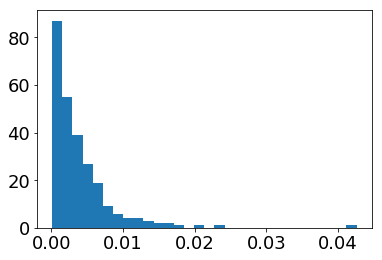

In [143]:
plt.hist(amp,bins=30)

In [144]:
np.median(amp)*100,np.std(amp)*100

(0.2568915153002464, 0.4475607849312781)

In [145]:
np.min(amp)

0.00013037572509884404

(-0.01, 0.05)

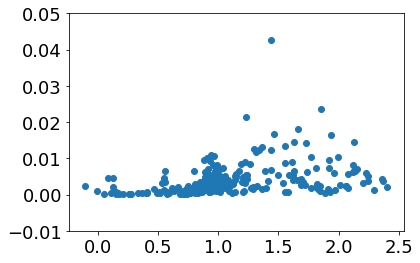

In [147]:
plt.scatter(tbl1['bp_rp'],amp)
plt.ylim(-0.01,0.05)

In [62]:
tbl

<Table length=11352>
       time               flux               flux_err      
     float64            float64              float64       
------------------ ------------------ ---------------------
1410.9265316150418 1.0248065148542223  0.002346612901722351
1410.9473652461065  1.022514538911644 0.0023519158514628976
1411.0098661381649 1.0145915685127973 0.0023661518480710083
  1411.03069976903 1.0097105718001849 0.0023762110367584175
 1411.072367032041  1.013444828207158  0.002366131239253585
1411.0932006645103  1.009597425187856  0.002377665724879525
1411.1140342978244 1.0084041100678423  0.002377749732439205
1411.1348679321209 1.0099176583922311  0.002375109469266537
1411.1557015675212 1.0089185621876007 0.0023775022567123077
1411.1765352041318  1.009794268335712  0.002375919043910336
               ...                ...                   ...
1623.5738993525747 0.9956884602842823  0.004770826536868221
1623.5947322043257 0.9842543152635799  0.004839405752231154
1623.6155650571604 0.9853341143868342  0.004825224724321803
1623.6363979111482 0.9868901605083036  0.004824107016170313
1623.6572307663391  0.999744877881072  0.004771298178058205
1623.6780636227604  1.003093475968197  0.004734544194099407
1623.6988964804175 1.0065387600752658  0.004725674377933242
 1623.719729339292 1.0018058166787582  0.004738245823786165
1623.7405621993448 0.9783292676165838   0.00485342693474543
1623.8238936498394 0.9902575149042508  0.004794476551713787

In [63]:
print(finalresults[i]['period'],finalresults[i]['period_unc'])

0.9791847333660825 0.0


(1495, 1500)

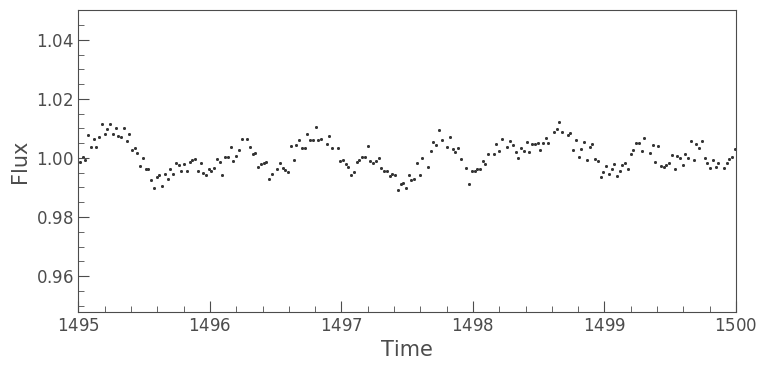

In [58]:
lc = lk.lightcurve.LightCurve(tbl['time'],tbl['flux'])
lc.scatter()
plt.xlim(1495,1500)

(1.2679147593161284, 2.06131605378824)

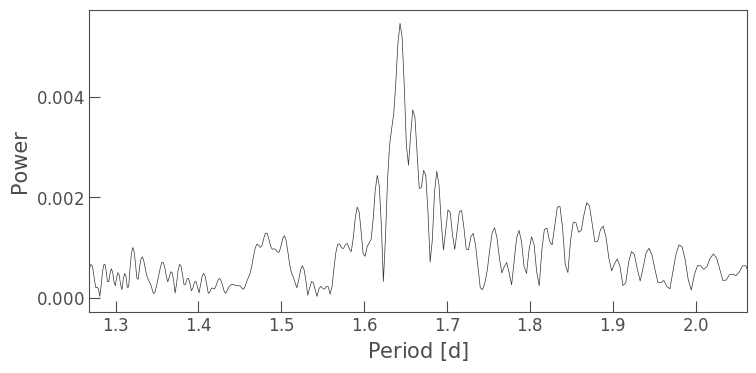

In [55]:
pdg = lc.to_periodogram()
pdg.plot(view='period')
plt.xlim(finalresults[i]['period']-finalresults[i]['period_unc']*5,finalresults[i]['period']+finalresults[i]['period_unc']*5)

In [54]:
indx = (pdg.period.value > finalresults[i]['period']-finalresults[i]['period_unc']*5) & (pdg.period.value < finalresults[i]['period']+finalresults[i]['period_unc']*5)
print(pdg[indx].max_power)



0.005457228543265737
